# Proyek Analisis Data: Air Quality
- **Nama:** Hanna Safira Choirunisa
- **Email:** hannaaasc@gmail.com
- **ID Dicoding:** MC008D5X2353

## Menentukan Pertanyaan Bisnis

- Apakah polutan yang ada di udara saling memengaruhi satu sama lain?
- Bagaimana pola kualitas udara di masing-masing station berkembang dari waktu ke waktu?
- Pada bulan apa kualitas udara menjadi lebih buruk daripada bulan-bulan lainnya? 
- Bagaimana persebaran rata-rata kualitas udara di berbagai station selama masa pengamatan?
- Station mana yang menunjukkan rata-rata kualitas udara terbaik dan terburuk pada setiap tahunnya?

## Import Semua Packages/Library yang Digunakan

In [396]:
# ketika di klik run all, terkadang blok kode ini tidak dieksekusi, sehingga harus dijalankan sendiri terlebih dahulu 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display

## Data Wrangling

### Gathering Data

In [397]:
aotizhongxin = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')
changping = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv')
dingling = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
dongsi = pd.read_csv('PRSA_Data_Dongsi_20130301-20170228.csv')
guanyuan = pd.read_csv('PRSA_Data_Guanyuan_20130301-20170228.csv')
gucheng = pd.read_csv('PRSA_Data_Gucheng_20130301-20170228.csv')
huairou = pd.read_csv('PRSA_Data_Huairou_20130301-20170228.csv')
nongzhanguan = pd.read_csv('PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shunyi = pd.read_csv('PRSA_Data_Shunyi_20130301-20170228.csv') 
tiantan = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv')
wanliu = pd.read_csv('PRSA_Data_Wanliu_20130301-20170228.csv')
wanshouxigong = pd.read_csv('PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [398]:
display(aotizhongxin.head(5))
display(changping.head(5))
display(dingling.head(5))
display(dongsi.head(5))
display(guanyuan.head(5))
display(gucheng.head(5))
display(huairou.head(5))
display(nongzhanguan.head(5))
display(shunyi.head(5))
display(tiantan.head(5))
display(wanliu.head(5))
display(wanshouxigong.head(5))

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station  
0  1020.8 -19.7   0.0    E   0.5  Changping  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  
4  1022.3 -19.4   0.0    N   2.1  Changping

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1023.0 -18.8   0.0  NNW   4.4  Guanyuan  
1  1023.2 -18.2   0.0    N   4.7  Guanyuan  
2  1023.5 -18.2   0.0  NNW   5.6  Guanyuan  
3  1024.5 -19.4   0.0   NW   3.1  Guanyuan  
4  1025.2 -19.5   0.0    N   2.0  Guanyuan

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  NaN  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  NaN  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  NaN  NaN  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  NaN    NaN   NaN  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  NaN  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1021.1 -18.6   0.0   NW   4.4  Gucheng  
1  1021.5 -19.0   0.0   NW   4.0  Gucheng  
2  1021.5 -19.8   0.0  WNW   4.6  Gucheng  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  NaN  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  NaN  NaN  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0    NaN   NaN  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  NaN  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1024.5 -21.4   0.0  NNW   5.7  Nongzhanguan  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  
2  1025.3 -24.6   0.0  NNW   5.3  Nongzhanguan  
3  1026.2 -25.5   0.0    N   4.9  Nongzhanguan  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  NaN  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0    NaN   NaN  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  NaN  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station  
0  1025.8 -20.5   0.0  NW   9.3  Shunyi  
1  1026.1 -21.3   0.0  NW   9.4  Shunyi  
2  1026.2 -23.0   0.0  NW   8.6  Shunyi  
3  1027.3 -23.3   0.0  NW   6.6  Shunyi  
4  1027.7 -22.9   0.0  NW   4.5  Shunyi

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station  
0  1024.5 -21.4   0.0  NNW   5.7  Tiantan  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  
2  1025.3 -24.6   0.0  NNW   5.3  Tiantan  
3  1026.2 -25.5   0.0    N   4.9  Tiantan  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  NaN  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0    NaN   NaN  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0   NaN  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  
2  1022.6 -19.7   0.0  WNW   4.7  Wanshouxigong  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong

**Insight** <br>

Dengan melihat 5 data pertama pertama, kita bisa melihat bahwa terdapat missing value pada baris-baris tertentu

### Assessing Data

#### Menilai tabel `aotizhongxin`

In [399]:
aotizhongxin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [400]:
aotizhongxin.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [401]:
print("Jumlah duplikasi: ", aotizhongxin.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [402]:
aotizhongxin.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34139.000000  34346.000000  34129.000000  34041.000000  33288.000000   
mean      82.773611    110.060391     17.375901     59.305833   1262.945145   
std       82.135694     95.223005     22.823017     37.116200   1221.436236   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     30.000000    500.000000   
50%       58.000000     87.000000      9.000000     53.000000    900.000000   
75%      114.000000    155.000000     21.000000     82.000000   1500.000000   
max      898.000000    984.000000    341.000000    290.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33345.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      56.353358     13.584607   1011.846920      3.123062      0.067421   
std       57.916327     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        8.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       42.000000     14.500000   1011.400000      3.800000      0.000000   
75%       82.000000     23.300000   1020.100000     15.600000      0.000000   
max      423.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

In [403]:
# Buat list yang berisikan kolom-kolom numerik
numerical_cols = [cname for cname in aotizhongxin.columns 
                  if aotizhongxin[cname].dtype in ['int64', 'float64'] 
                  and cname not in ['No', 'year', 'month', 'day', 'hour']]

print(numerical_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [404]:
# Fungsi untuk membuat boxplot beberapa kolom secara bersamaan
def plot(data, columns):
    num_plots = len(columns)

    fig, axes = plt.subplots(1, num_plots, figsize=(20, 5))

    for i, col in enumerate(columns):
        axes[i].boxplot(data[col].dropna())
        axes[i].set_title(f'Box Plot of {col}')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

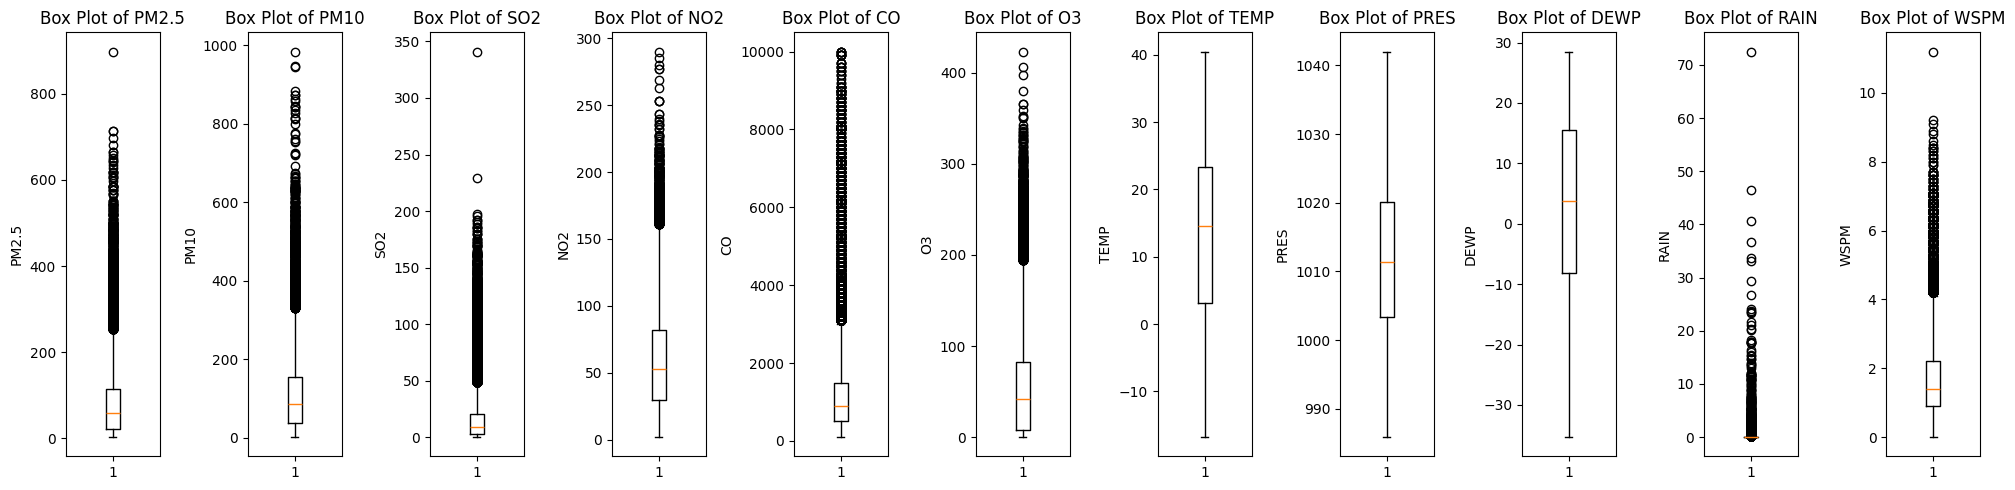

In [405]:
# boxplot kolom numerik tabel aotizhongxin
plot(aotizhongxin, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `changping`

In [406]:
changping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [407]:
changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [408]:
print("Jumlah duplikasi: ", changping.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [409]:
changping.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34290.000000  34482.000000  34436.000000  34397.000000  33543.000000   
mean      71.099743     94.657871     14.958906     44.182086   1152.301345   
std       72.326926     83.441738     20.975331     29.519796   1103.056282   
min        2.000000      2.000000      0.285600      1.847700    100.000000   
25%       18.000000     34.000000      2.000000     22.000000    500.000000   
50%       46.000000     72.000000      7.000000     36.000000    800.000000   
75%      100.000000    131.000000     18.000000     60.358200   1400.000000   
max      882.000000    999.000000    310.000000    226.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34460.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      57.940003     13.686111   1007.760278      1.505495      0.060366   
std       54.316674     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       15.636600      3.400000    999.300000    -10.200000      0.000000   
50%       46.000000     14.700000   1007.400000      1.800000      0.000000   
75%       80.000000     23.300000   1016.000000     14.200000      0.000000   
max      429.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

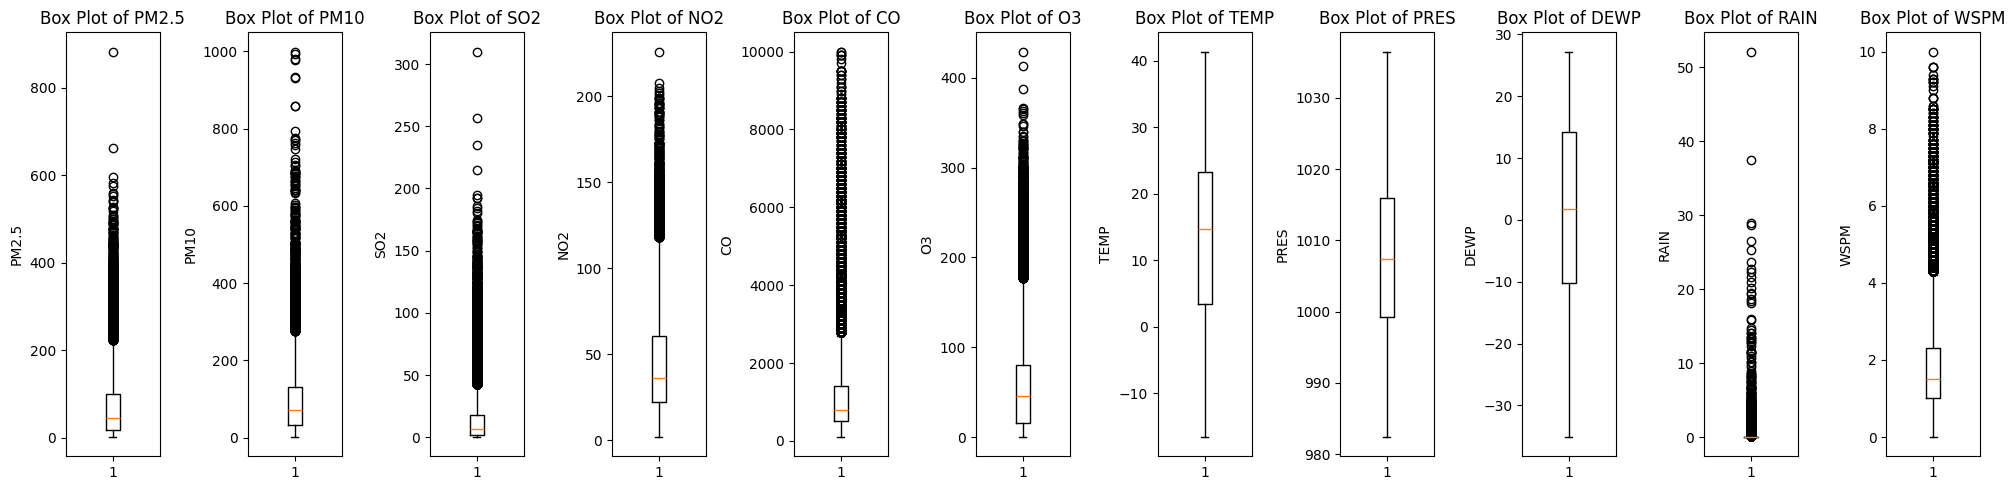

In [410]:
# boxplot kolom numerik tabel changping
plot(changping, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `dingling`

In [411]:
dingling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [412]:
dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [413]:
print("Jumlah duplikasi: ", dingling.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [414]:
dingling.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

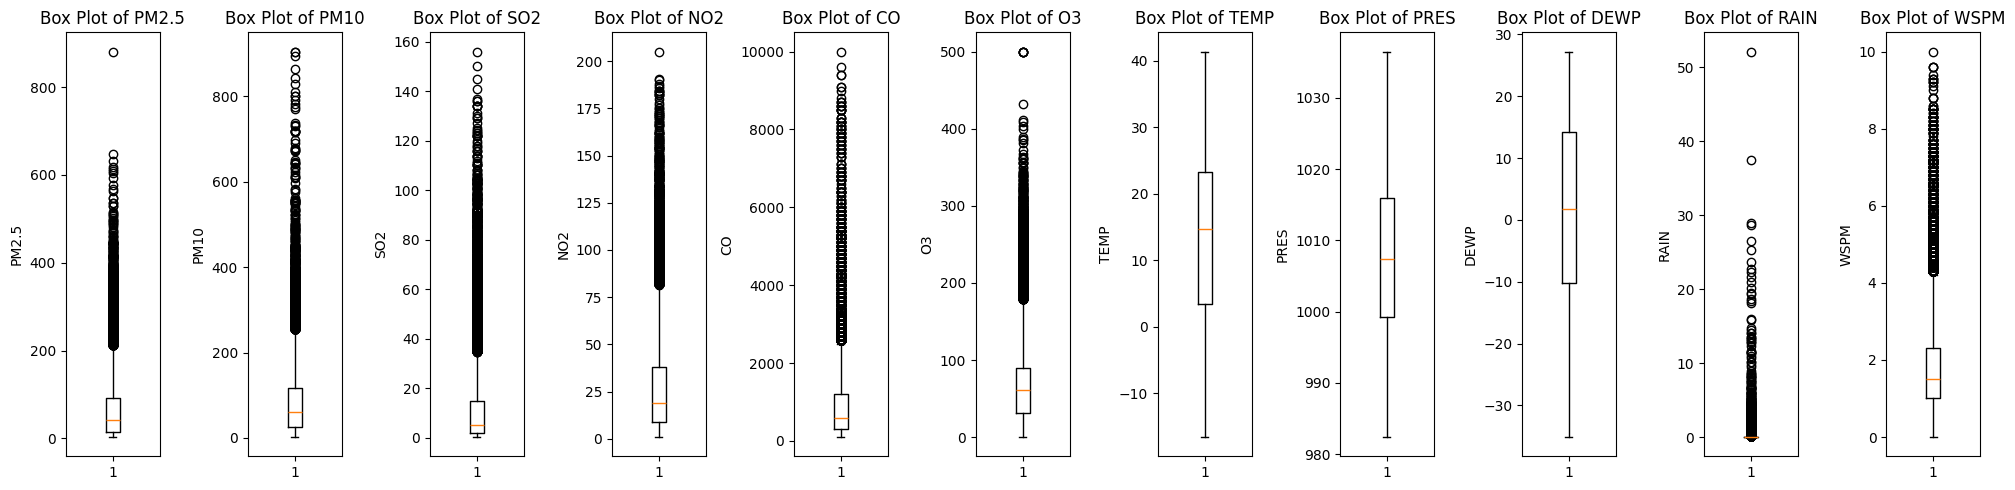

In [415]:
# boxplot kolom numerik tabel dingling
plot(dingling, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `dongsi`

In [416]:
dongsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [417]:
dongsi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [418]:
print("Jumlah duplikasi: ", dongsi.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [419]:
dongsi.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34314.000000  34511.000000  34401.000000  33463.000000  31867.000000   
mean      86.194297    110.336742     18.531107     53.699443   1330.069131   
std       86.575127     98.219860     22.905655     33.959230   1191.305887   
min        3.000000      2.000000      0.285600      2.000000    100.000000   
25%       22.000000     38.000000      4.000000     27.000000    600.000000   
50%       61.000000     86.000000     10.000000     47.000000   1000.000000   
75%      119.000000    151.000000     24.000000     73.000000   1700.000000   
max      737.000000    955.000000    300.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34400.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      57.210637     13.671490   1012.547419      2.447535      0.064020   
std       58.033275     11.458418     10.266059     13.810696      0.786282   
min        0.642600    -16.800000    987.100000    -35.300000      0.000000   
25%       12.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       44.125200     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max     1071.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

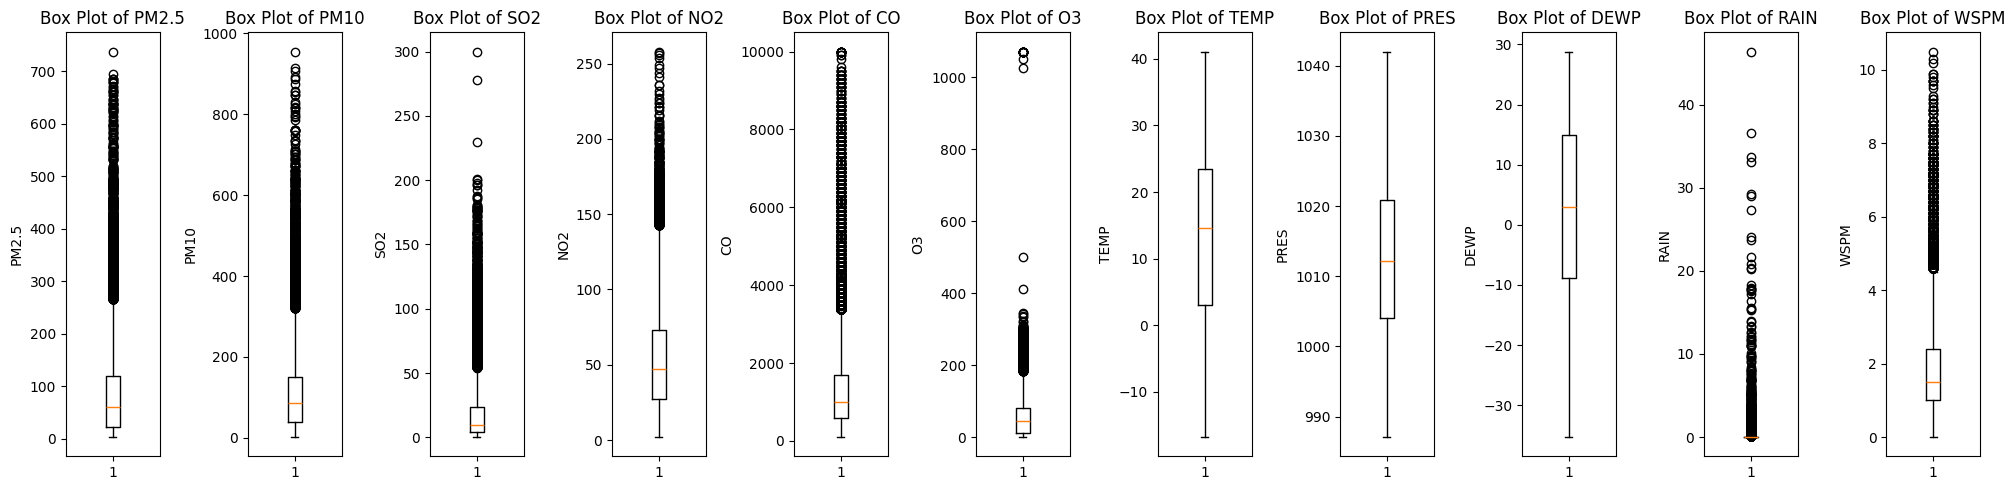

In [420]:
# boxplot kolom numerik tabel dongsi
plot(dongsi, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `guanyuan`

In [421]:
guanyuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [422]:
guanyuan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [423]:
print("Jumlah duplikasi: ", guanyuan.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [424]:
guanyuan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34448.000000  34635.000000  34590.000000  34405.000000  33311.000000   
mean      82.933372    109.023303     17.590941     57.901643   1271.294377   
std       80.933497     91.573709     23.600367     35.150857   1164.854945   
min        2.000000      2.000000      1.000000      2.000000    100.000000   
25%       23.000000     40.000000      3.000000     31.000000    500.000000   
50%       59.000000     89.000000      8.000000     51.000000    900.000000   
75%      115.000000    149.000000     22.000000     78.000000   1600.000000   
max      680.000000    999.000000    293.000000    270.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33891.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.795044     13.584607   1011.846920      3.123062      0.067421   
std       57.436983     11.399097     10.404047     13.688896      0.910056   
min        0.214200    -16.800000    985.900000    -35.300000      0.000000   
25%        7.000000      3.100000   1003.300000     -8.100000      0.000000   
50%       41.000000     14.500000   1011.400000      3.800000      0.000000   
75%       81.000000     23.300000   1020.100000     15.600000      0.000000   
max      415.000000     40.500000   1042.000000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.708496  
std        1.204071  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.200000  
max       11.200000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

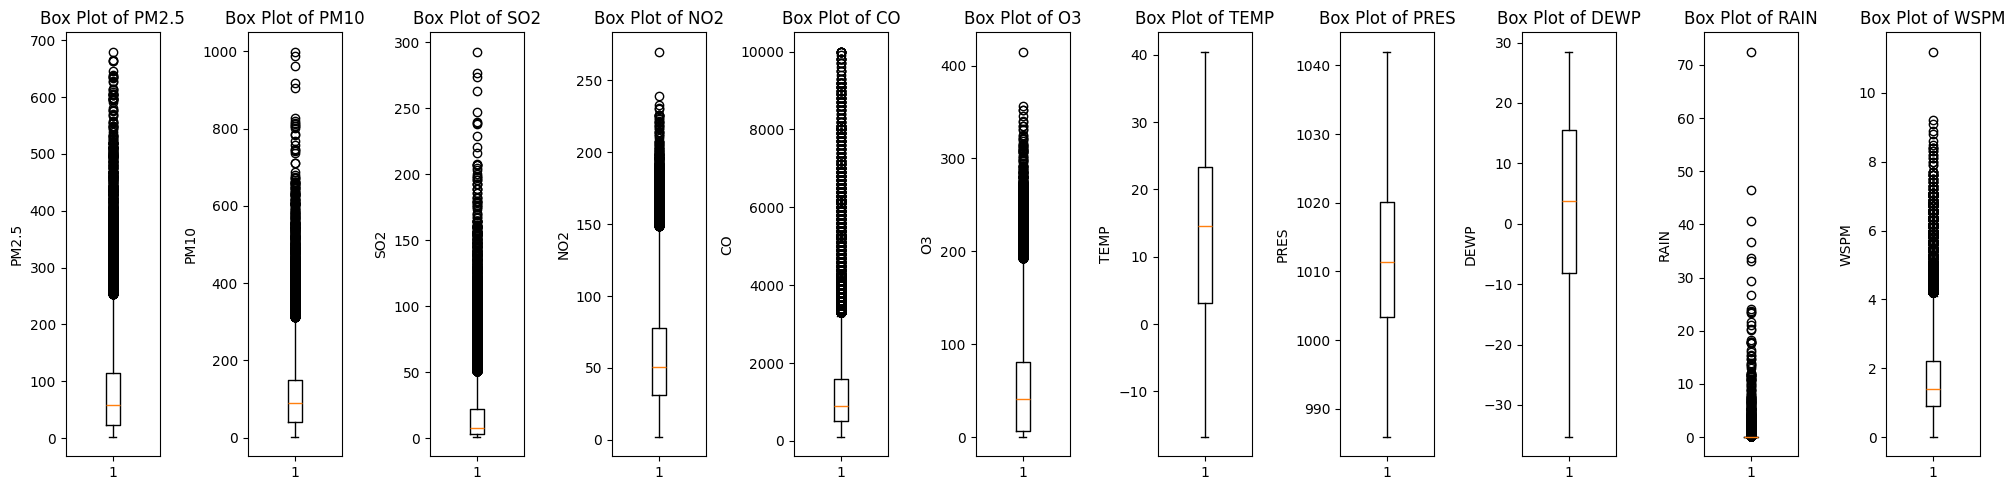

In [425]:
# boxplot kolom numerik tabel guanyuan
plot(guanyuan, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `gucheng`

In [426]:
gucheng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34418 non-null  float64
 6   PM10     34683 non-null  float64
 7   SO2      34557 non-null  float64
 8   NO2      34396 non-null  float64
 9   CO       33663 non-null  float64
 10  O3       34335 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35013 non-null  float64
 14  RAIN     35021 non-null  float64
 15  wd       34905 non-null  object 
 16  WSPM     35022 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [427]:
gucheng.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [428]:
print("Jumlah duplikasi: ", gucheng.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [429]:
gucheng.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34418.000000  34683.000000  34557.000000  34396.000000  33663.000000   
mean      83.852089    118.861978     15.366162     55.871075   1323.974423   
std       82.796445     96.742626     21.204526     36.473860   1208.957772   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       24.000000     45.000000      2.000000     26.000000    600.000000   
50%       60.000000     99.000000      7.000000     50.000000    900.000000   
75%      115.750000    167.000000     20.000000     79.000000   1600.000000   
max      770.000000    994.000000    500.000000    276.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34335.000000  35013.000000  35014.000000  35013.000000  35021.000000   
mean      57.694879     13.864524   1008.829592      2.610442      0.064453   
std       57.019587     11.292857     10.103256     13.782991      0.838654   
min        0.214200    -15.600000    984.000000    -34.600000      0.000000   
25%       10.000000      3.600000   1000.500000     -8.900000      0.000000   
50%       45.000000     14.800000   1008.500000      3.000000      0.000000   
75%       83.000000     23.500000   1017.000000     15.300000      0.000000   
max      450.000000     41.600000   1038.100000     27.400000     41.900000   

               WSPM  
count  35022.000000  
mean       1.343310  
std        1.151064  
min        0.000000  
25%        0.600000  
50%        1.000000  
75%        1.800000  
max       12.000000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

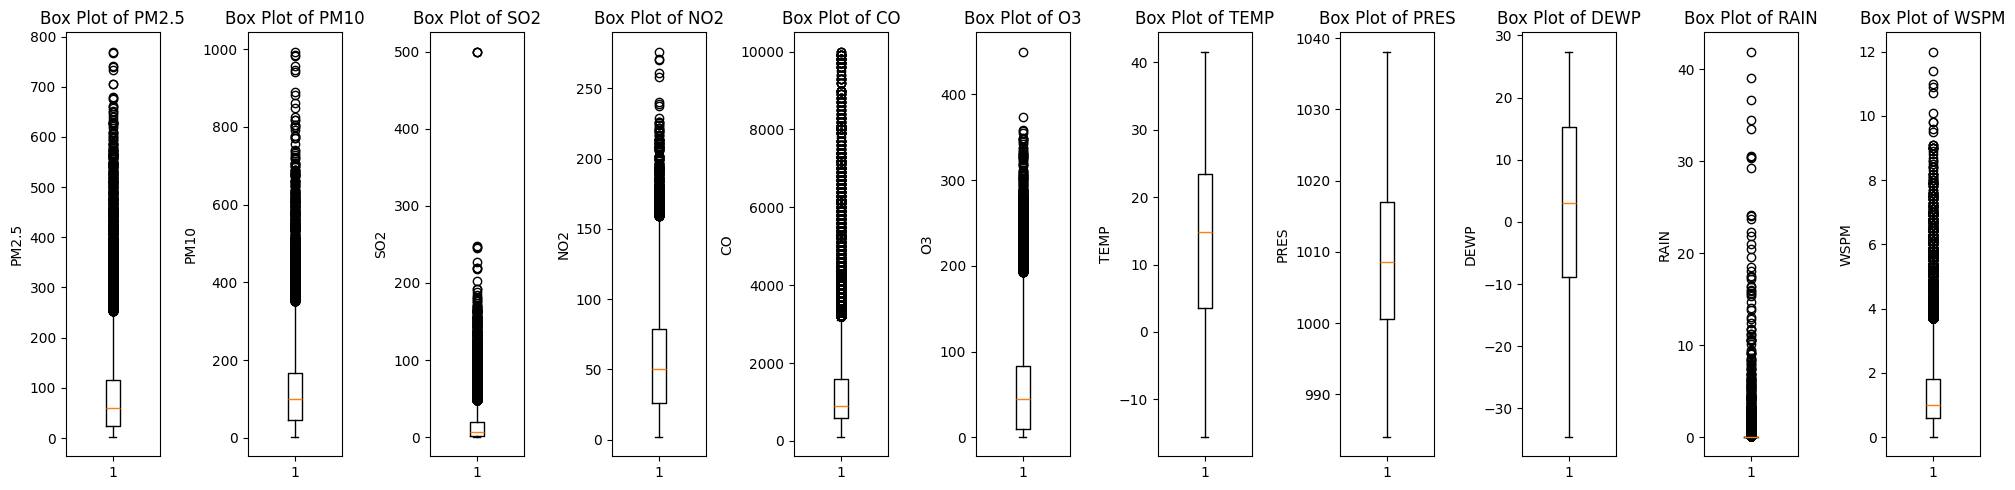

In [430]:
# boxplot kolom numerik tabel gucheng
plot(gucheng, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `huairou`

In [431]:
huairou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [432]:
huairou.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [433]:
print("Jumlah duplikasi: ", huairou.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [434]:
huairou.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34111.000000  34287.000000  34084.000000  33425.000000  33642.000000   
mean      69.626367     91.482690     12.121553     32.497250   1022.554545   
std       71.224916     83.289578     18.896912     26.489531    898.738241   
min        2.000000      2.000000      0.285600      1.026500    100.000000   
25%       17.000000     28.000000      2.000000     12.000000    400.000000   
50%       47.000000     69.000000      4.000000     25.000000    800.000000   
75%       98.000000    131.000000     14.000000     46.000000   1300.000000   
max      762.000000    993.000000    315.000000    231.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33913.000000  35013.000000  35011.000000  35011.000000  35009.000000   
mean      59.824713     12.445426   1007.598568      2.238619      0.067940   
std       54.605746     11.751103     10.022101     14.052541      0.849046   
min        0.214200    -19.900000    982.800000    -43.400000      0.000000   
25%       18.000000      2.100000    999.300000     -9.600000      0.000000   
50%       49.000000     13.600000   1007.300000      2.700000      0.000000   
75%       83.000000     22.300000   1015.500000     15.300000      0.000000   
max      444.000000     40.300000   1036.500000     29.100000     45.900000   

               WSPM  
count  35015.000000  
mean       1.652021  
std        1.199143  
min        0.000000  
25%        0.900000  
50%        1.300000  
75%        2.000000  
max       12.900000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

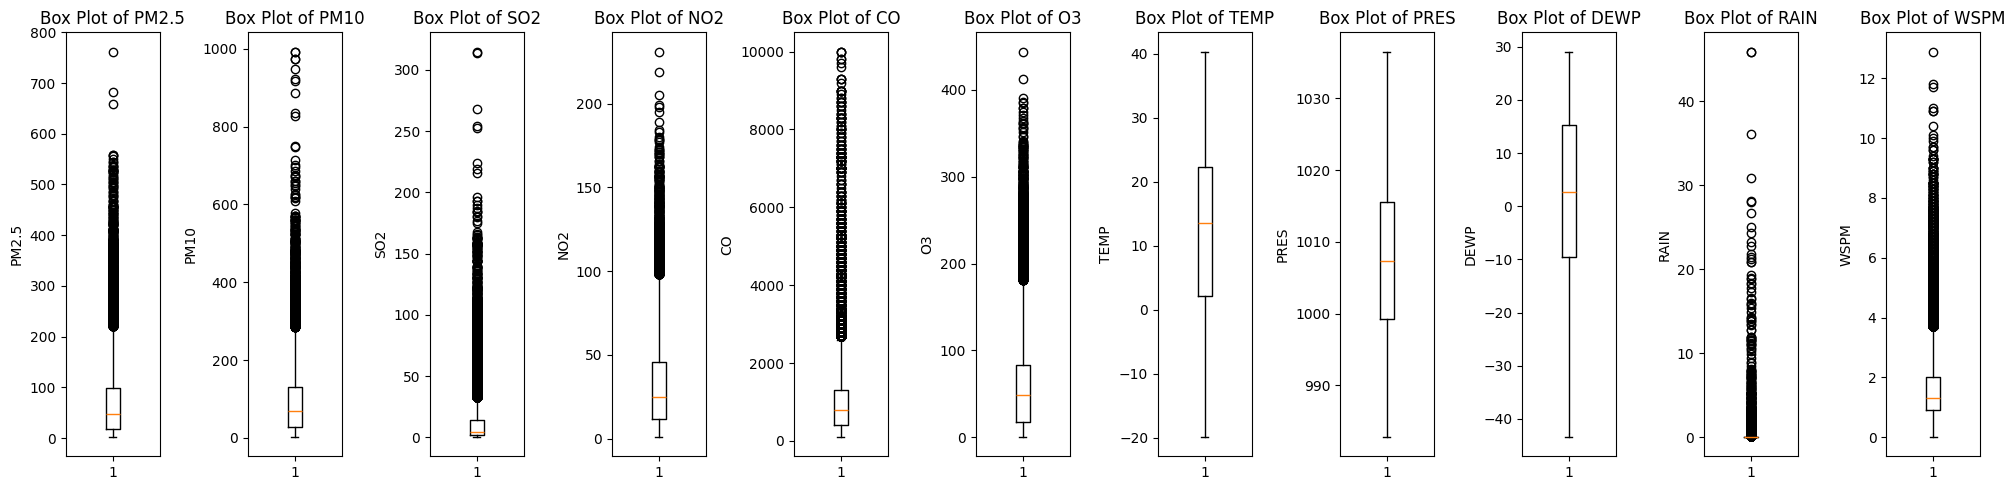

In [435]:
# boxplot kolom numerik tabel huairou
plot(huairou, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `nongzhanguan`

In [436]:
nongzhanguan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34436 non-null  float64
 6   PM10     34624 non-null  float64
 7   SO2      34618 non-null  float64
 8   NO2      34372 non-null  float64
 9   CO       33858 non-null  float64
 10  O3       34558 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [437]:
nongzhanguan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [438]:
print("Jumlah duplikasi: ", nongzhanguan.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [439]:
nongzhanguan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34436.000000  34624.000000  34618.000000  34372.000000  33858.000000   
mean      84.838483    108.991096     18.689242     58.097172   1324.350198   
std       86.225344     95.341177     24.280665     36.297740   1245.166124   
min        2.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     38.000000      3.000000     29.000000    500.000000   
50%       59.000000     85.000000      9.000000     51.000000    900.000000   
75%      116.000000    149.000000     23.000000     80.000000   1600.000000   
max      844.000000    995.000000    257.000000    273.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34558.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      58.534682     13.671490   1012.547419      2.447535      0.064020   
std       58.401448     11.458418     10.266059     13.810696      0.786282   
min        0.214200    -16.800000    987.100000    -35.300000      0.000000   
25%       10.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       45.000000     14.600000   1012.200000      3.000000      0.000000   
75%       84.000000     23.500000   1020.900000     15.000000      0.000000   
max      390.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

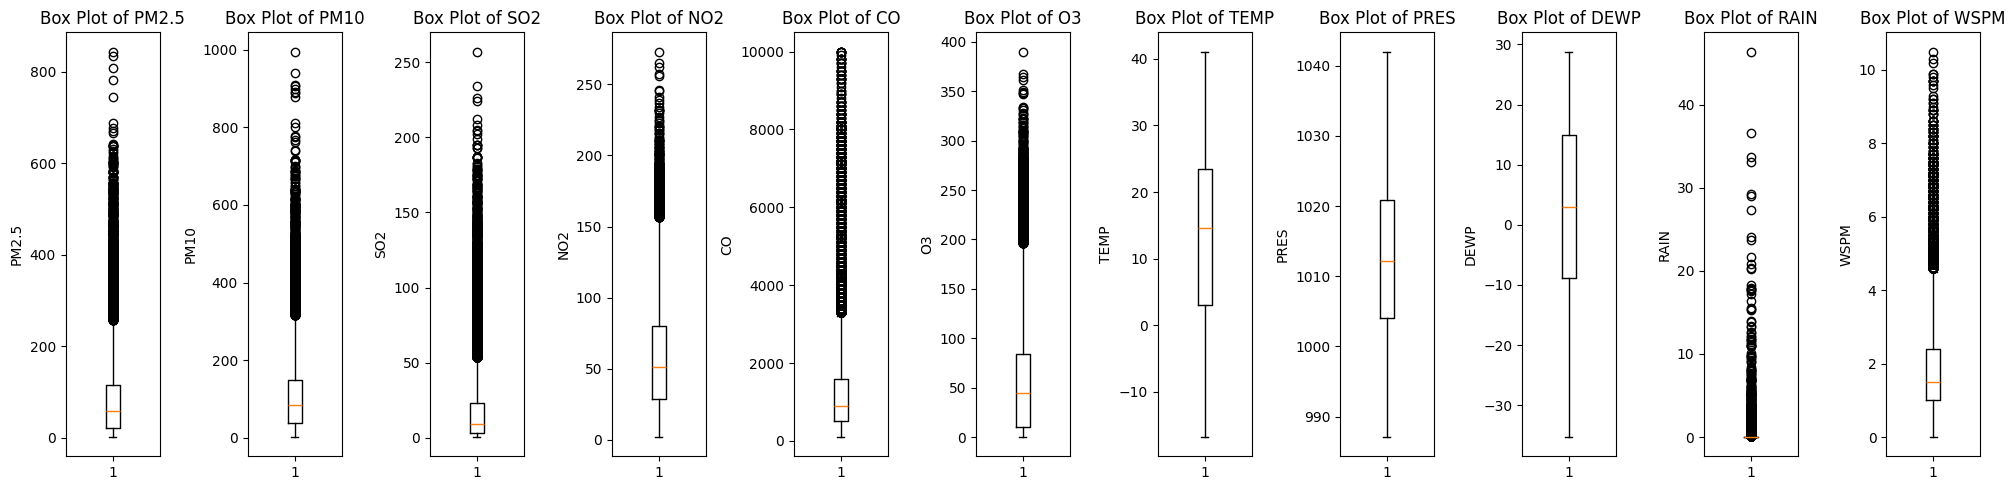

In [440]:
# boxplot kolom numerik tabel nongzhanguan
plot(nongzhanguan, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `shunyi`

In [441]:
shunyi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [442]:
shunyi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [443]:
print("Jumlah duplikasi: ", shunyi.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [444]:
shunyi.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34151.000000  34516.000000  33768.000000  33699.000000  32886.000000   
mean      79.491602     98.737026     13.572039     43.908865   1187.063979   
std       81.231739     89.143718     19.572068     30.996828   1156.374102   
min        2.000000      2.000000      0.285600      2.000000    100.000000   
25%       19.000000     31.000000      2.000000     19.000000    400.000000   
50%       55.000000     77.000000      5.000000     37.000000    800.000000   
75%      112.000000    138.000000     17.000000     62.000000   1500.000000   
max      941.000000    999.000000    239.000000    258.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33575.000000  35013.000000  35013.000000  35010.000000  35013.000000   
mean      55.201321     13.387969   1013.061938      2.465036      0.061094   
std       54.873726     11.483588     10.177339     13.726622      0.761668   
min        0.214200    -16.800000    988.000000    -36.000000      0.000000   
25%       10.000000      3.000000   1004.700000     -8.800000      0.000000   
50%       43.000000     14.400000   1012.700000      3.100000      0.000000   
75%       77.000000     23.200000   1021.000000     15.100000      0.000000   
max      351.716400     40.600000   1042.800000     27.500000     37.300000   

               WSPM  
count  35020.000000  
mean       1.807533  
std        1.287817  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       12.800000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

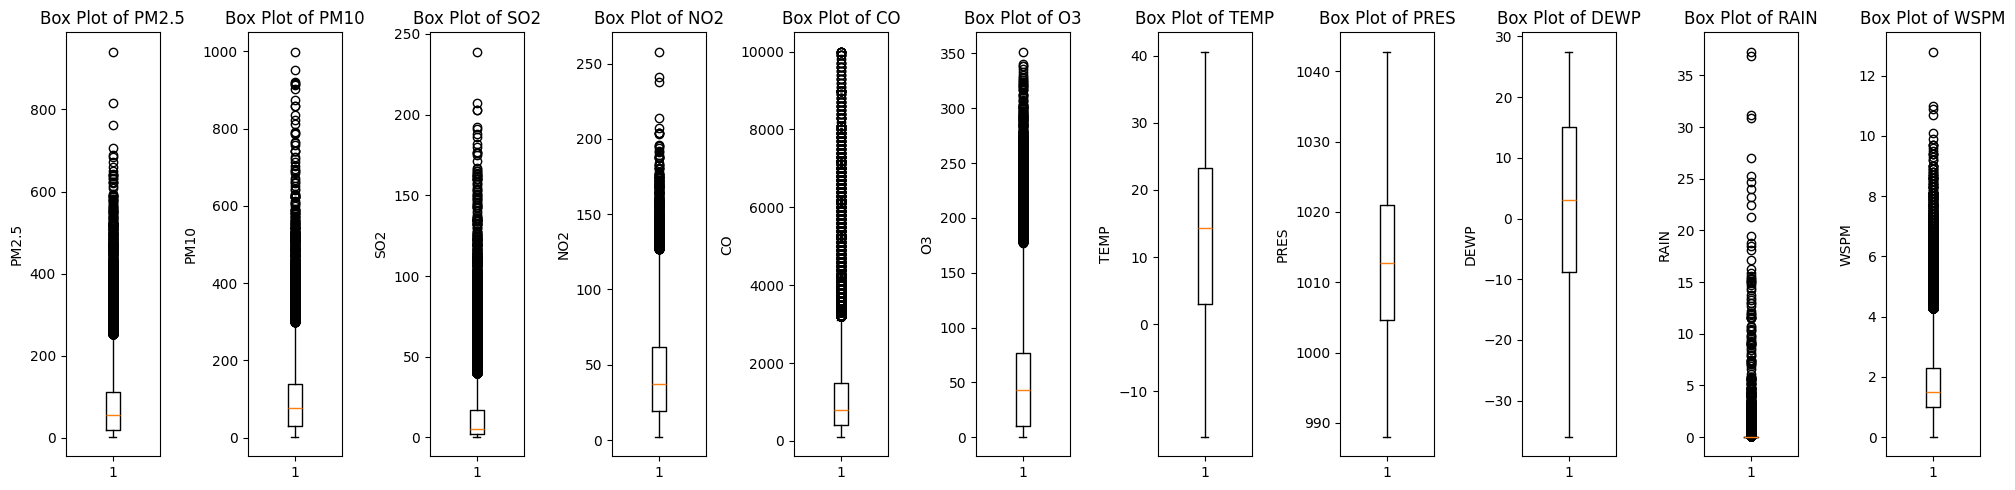

In [445]:
# boxplot kolom numerik tabel shunyi
plot(shunyi, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `tiantan`

In [446]:
tiantan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34387 non-null  float64
 6   PM10     34467 non-null  float64
 7   SO2      33946 non-null  float64
 8   NO2      34320 non-null  float64
 9   CO       33938 non-null  float64
 10  O3       34221 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [447]:
tiantan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [448]:
print("Jumlah duplikasi: ", tiantan.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [449]:
tiantan.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34387.000000  34467.000000  33946.000000  34320.000000  33938.000000   
mean      82.164911    106.363672     14.367615     53.162646   1298.303318   
std       80.921384     89.700157     20.144631     31.946224   1170.593297   
min        3.000000      2.000000      0.571200      2.000000    100.000000   
25%       22.000000     41.000000      3.000000     28.000000    500.000000   
50%       59.000000     85.000000      7.000000     47.000000    900.000000   
75%      113.000000    144.000000     17.000000     71.000000   1600.000000   
max      821.000000    988.000000    273.000000    241.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  34221.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      55.984297     13.671490   1012.547419      2.447535      0.064020   
std       59.081528     11.458418     10.266059     13.810696      0.786282   
min        0.428400    -16.800000    987.100000    -35.300000      0.000000   
25%        8.000000      3.100000   1004.000000     -8.800000      0.000000   
50%       40.000000     14.600000   1012.200000      3.000000      0.000000   
75%       81.000000     23.500000   1020.900000     15.000000      0.000000   
max      674.000000     41.100000   1042.000000     28.800000     46.400000   

               WSPM  
count  35050.000000  
mean       1.860785  
std        1.280368  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.400000  
max       10.500000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

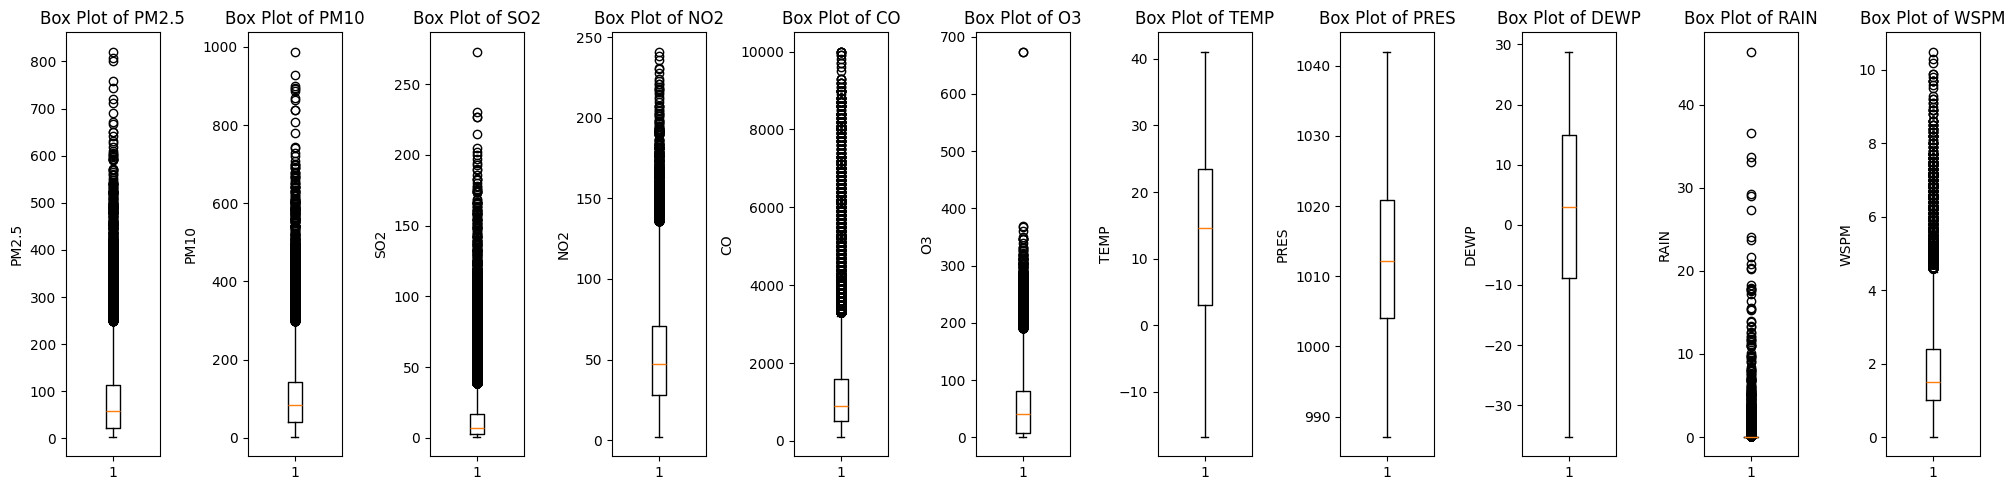

In [450]:
# boxplot kolom numerik tabel tiantan
plot(tiantan, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `wanliu`

In [451]:
wanliu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34682 non-null  float64
 6   PM10     34780 non-null  float64
 7   SO2      34489 non-null  float64
 8   NO2      33994 non-null  float64
 9   CO       33252 non-null  float64
 10  O3       32957 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34941 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [452]:
wanliu.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [453]:
print("Jumlah duplikasi: ", wanliu.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [454]:
wanliu.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34682.000000  34780.000000  34489.000000  33994.000000  33252.000000   
mean      83.374716    110.464618     18.376481     65.258789   1319.353513   
std       81.905568     92.795065     22.609648     37.996088   1268.114331   
min        2.000000      2.000000      0.285600      1.642400    100.000000   
25%       23.000000     40.000000      4.000000     36.000000    500.000000   
50%       59.000000     88.000000     10.000000     60.000000    900.000000   
75%      116.000000    153.000000     23.000000     88.000000   1600.000000   
max      957.000000    951.000000    282.000000    264.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  32957.000000  35044.000000  35044.000000  35044.000000  35044.000000   
mean      48.873614     13.428865   1011.097536      3.266588      0.068263   
std       55.111740     11.346931     10.355247     13.678060      0.896726   
min        0.214200    -15.800000    985.900000    -34.900000      0.000000   
25%        4.000000      3.200000   1002.500000     -8.100000      0.000000   
50%       32.000000     14.300000   1010.800000      4.000000      0.000000   
75%       73.000000     22.900000   1019.400000     15.800000      0.000000   
max      364.000000     40.500000   1040.300000     28.500000     72.500000   

               WSPM  
count  35050.000000  
mean       1.501215  
std        1.104472  
min        0.000000  
25%        0.800000  
50%        1.200000  
75%        2.000000  
max       11.200000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

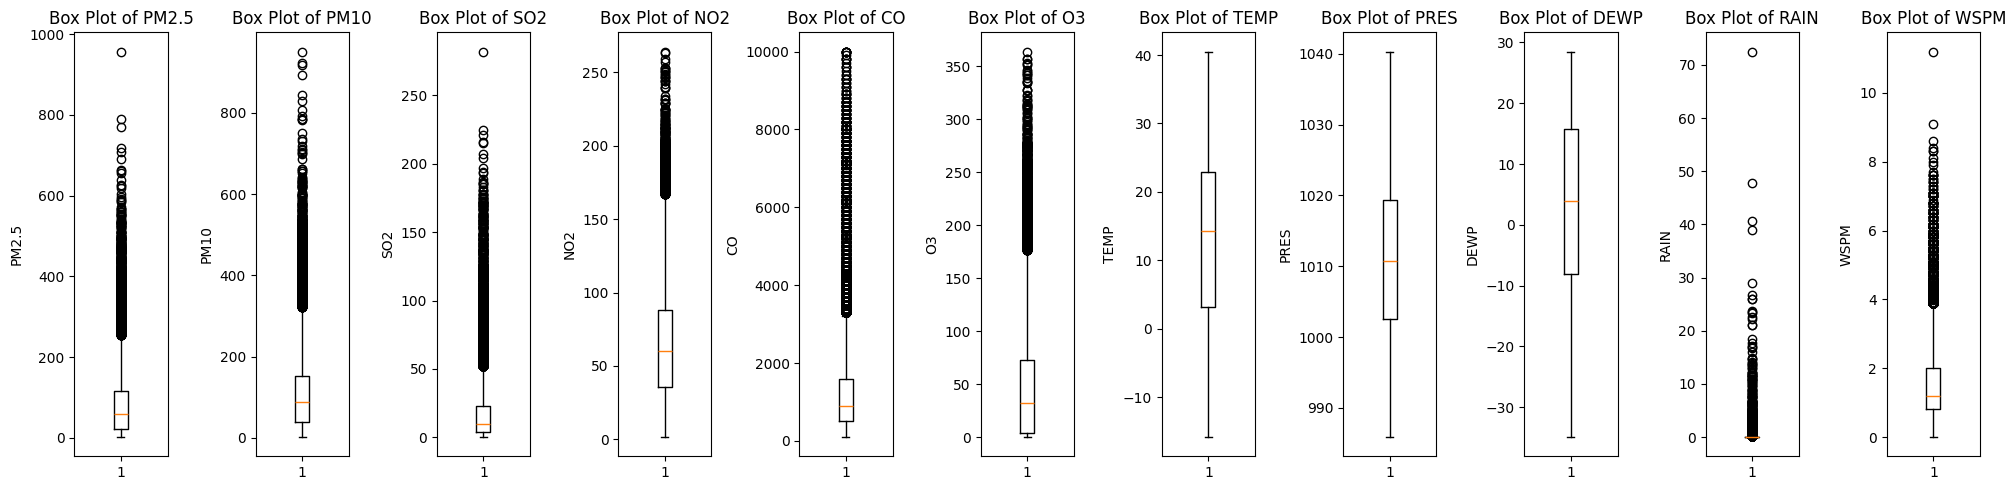

In [455]:
# boxplot kolom numerik tabel wanliu
plot(wanliu, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

#### Menilai tabel `wanshouxigong`

In [456]:
wanshouxigong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


Tipe data tiap kolom sudah sesuai

In [457]:
wanshouxigong.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

Terdapat missing value pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `TEMP`, `PRES`, `DEWP`, `RAIN`, `wd`, dan `WSPM`

In [458]:
print("Jumlah duplikasi: ", wanshouxigong.duplicated().sum())

Jumlah duplikasi:  0


Tidak ada duplikasi data

In [459]:
wanshouxigong.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2          NO2            CO  \
count  34368.000000  34580.000000  34395.000000  34310.00000  33767.000000   
mean      85.024136    112.223459     17.148603     55.52956   1370.395031   
std       85.975981     97.593210     23.940834     35.80805   1223.139114   
min        3.000000      2.000000      0.285600      2.00000    100.000000   
25%       23.000000     39.000000      3.000000     28.00000    600.000000   
50%       60.000000     91.000000      8.000000     49.00000   1000.000000   
75%      116.000000    154.000000     21.000000     77.00000   1700.000000   
max      999.000000    961.000000    411.000000    251.00000   9800.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33986.000000  35045.000000  35045.000000  35045.000000  35045.000000   
mean      56.229904     13.784477   1011.511804      2.707442      0.064320   
std       57.082710     11.385156     10.570928     13.704139      0.796981   
min        0.214200    -16.800000    985.100000    -35.300000      0.000000   
25%        8.000000      3.400000   1002.800000     -8.500000      0.000000   
50%       42.000000     14.800000   1011.000000      3.300000      0.000000   
75%       82.000000     23.500000   1020.000000     15.200000      0.000000   
max      358.000000     40.600000   1042.000000     28.500000     46.400000   

               WSPM  
count  35051.000000  
mean       1.745314  
std        1.206355  
min        0.000000  
25%        0.900000  
50%        1.400000  
75%        2.300000  
max       13.200000

Nilai maksimum pada kolom `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `RAIN`, dan `WSPM` terlalu besar dan jauh dari nilai Q3 + 1.5 × IQR, sehingga nilai ini bisa disebut sebagai outlier.

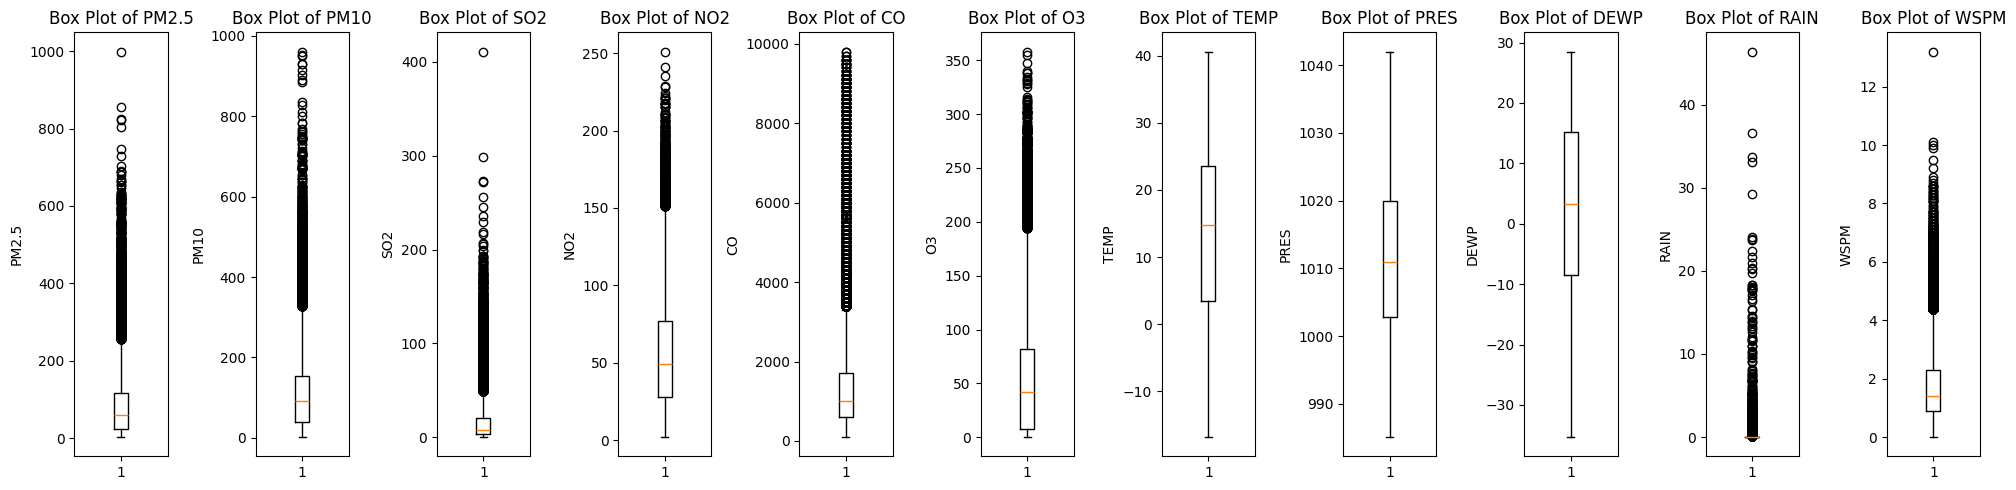

In [460]:
# boxplot kolom numerik tabel wanshouxigong
plot(wanshouxigong, numerical_cols)

Dari boxplot di atas dapat dilihat banyak outlier, ditunjukkan oleh titik-titik di luar garis perpanjangan *whisker*.

**Insight** <br>

Semua tabel memiliki missing value dan outlier, tetapi tipe data sudah sesuai dan tidak ada duplikasi data.

### Cleaning Data

#### Membersihkan tabel `aotizhongxin`

##### Missing values

In [461]:
aotizhongxin.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [462]:
missing_value_cols = [col for col in numerical_cols if aotizhongxin[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [463]:
# Fungsi untuk melakukan imputasi missing value variabel numerik dengan metode interpolasi
def impute_missing_values(df, cols):
    df_cleaned = df.copy()
    
    # Lakukan interpolasi untuk mengisi missing value
    df_cleaned[cols] = df_cleaned[cols].interpolate(method='linear', axis=0)
    
    # Jika masih ada nilai kosong (NaN), isi dengan median kolom
    for col in cols:
        if df_cleaned[col].isnull().sum() > 0:  # Cek apakah ada NaN setelah interpolasi
            median_value = df_cleaned[col].median()  # Hitung median kolom
            df_cleaned[col] = df_cleaned[col].fillna(median_value)  # Isi NaN dengan median
    
    return df_cleaned

In [464]:
# imputasi missing value
aotizhongxin_cleaned = impute_missing_values(aotizhongxin, missing_value_cols)

In [465]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
aotizhongxin_cleaned.wd = aotizhongxin_cleaned.wd.ffill()

In [466]:
aotizhongxin_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [467]:
# Fungsi untuk memeriksa dan mengganti outlier dengan batas atas dan bawah
def replace_outliers_iqr(df, numeric_columns):
    # Menyalin DataFrame untuk menghindari perubahan data asli
    df_cleaned = df.copy()
    
    for col in numeric_columns:
        # Menghitung Q1, Q3, dan IQR untuk kolom tersebut
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Menentukan batas bawah dan batas atas untuk outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Mengganti outliers dengan batas bawah atau batas atas
        df_cleaned[col] = df_cleaned[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    
    return df_cleaned

In [468]:
# Memeriksa dan mengganti outliers 
aotizhongxin_cleaned = replace_outliers_iqr(aotizhongxin_cleaned, numerical_cols)

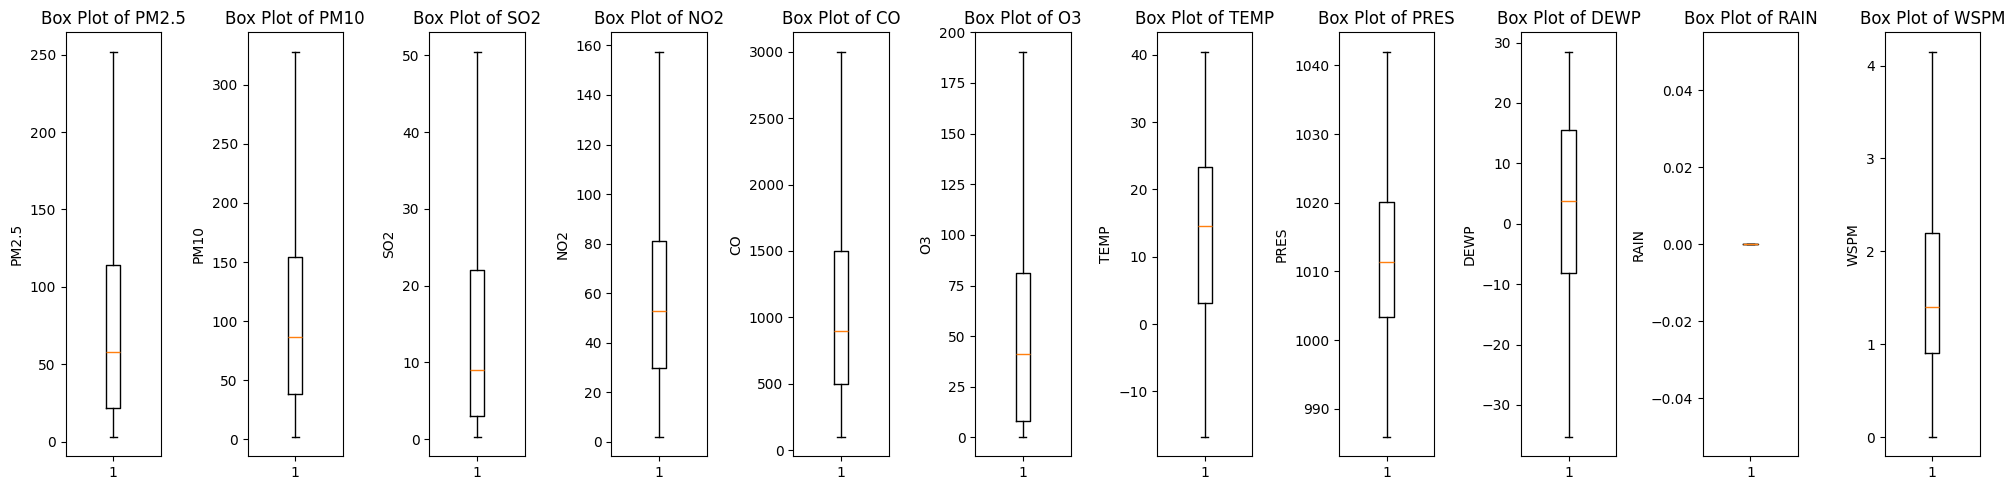

In [469]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(aotizhongxin_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `changping`

##### Missing values

In [470]:
changping.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [471]:
missing_value_cols = [col for col in numerical_cols if changping[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [472]:
# imputasi missing value
changping_cleaned = impute_missing_values(changping, missing_value_cols)

In [473]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
changping_cleaned.wd = changping_cleaned.wd.ffill()

In [474]:
changping_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [475]:
# Memeriksa dan mengganti outliers 
changping_cleaned = replace_outliers_iqr(changping_cleaned, numerical_cols)

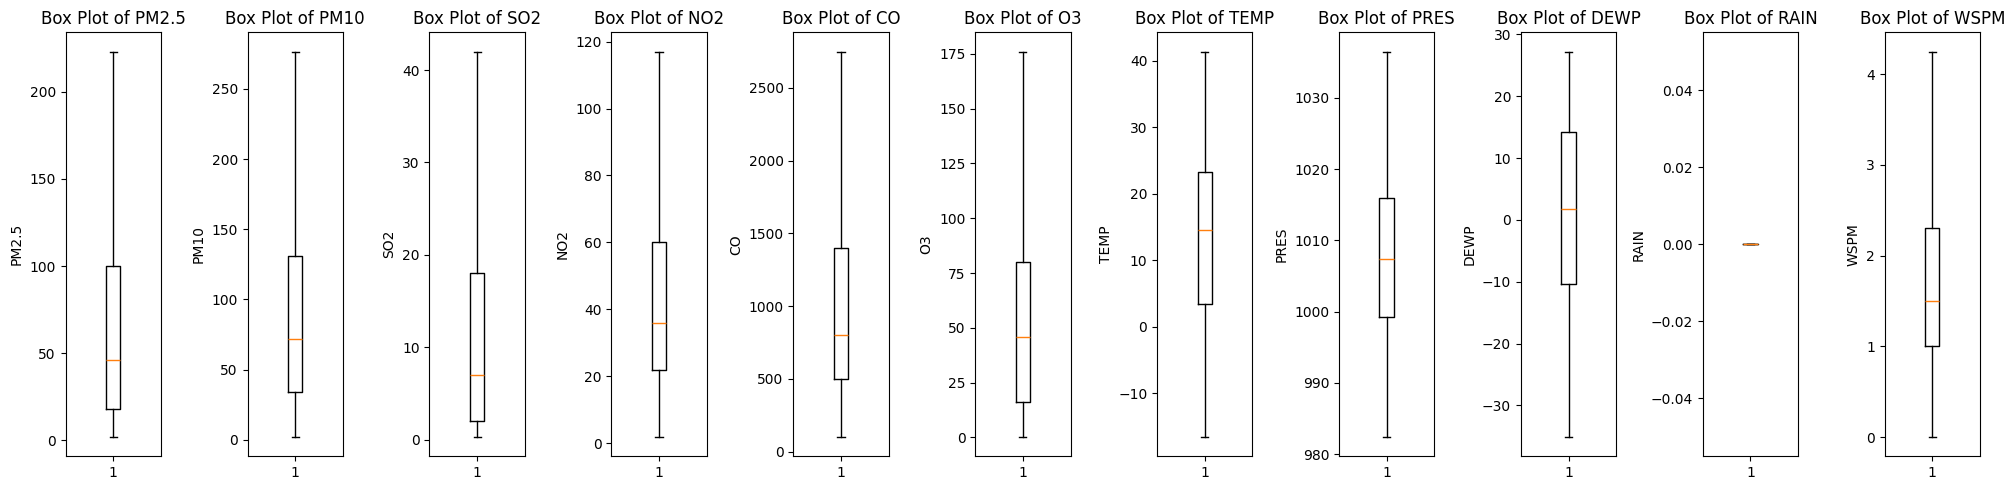

In [476]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(changping_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `dingling`

##### Missing values

In [477]:
dingling.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [478]:
missing_value_cols = [col for col in numerical_cols if dingling[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [479]:
# imputasi missing value
dingling_cleaned = impute_missing_values(dingling, missing_value_cols)

In [480]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
dingling_cleaned.wd = dingling_cleaned.wd.ffill()

In [481]:
dingling_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [482]:
# Memeriksa dan mengganti outliers 
dingling_cleaned = replace_outliers_iqr(dingling_cleaned, numerical_cols)

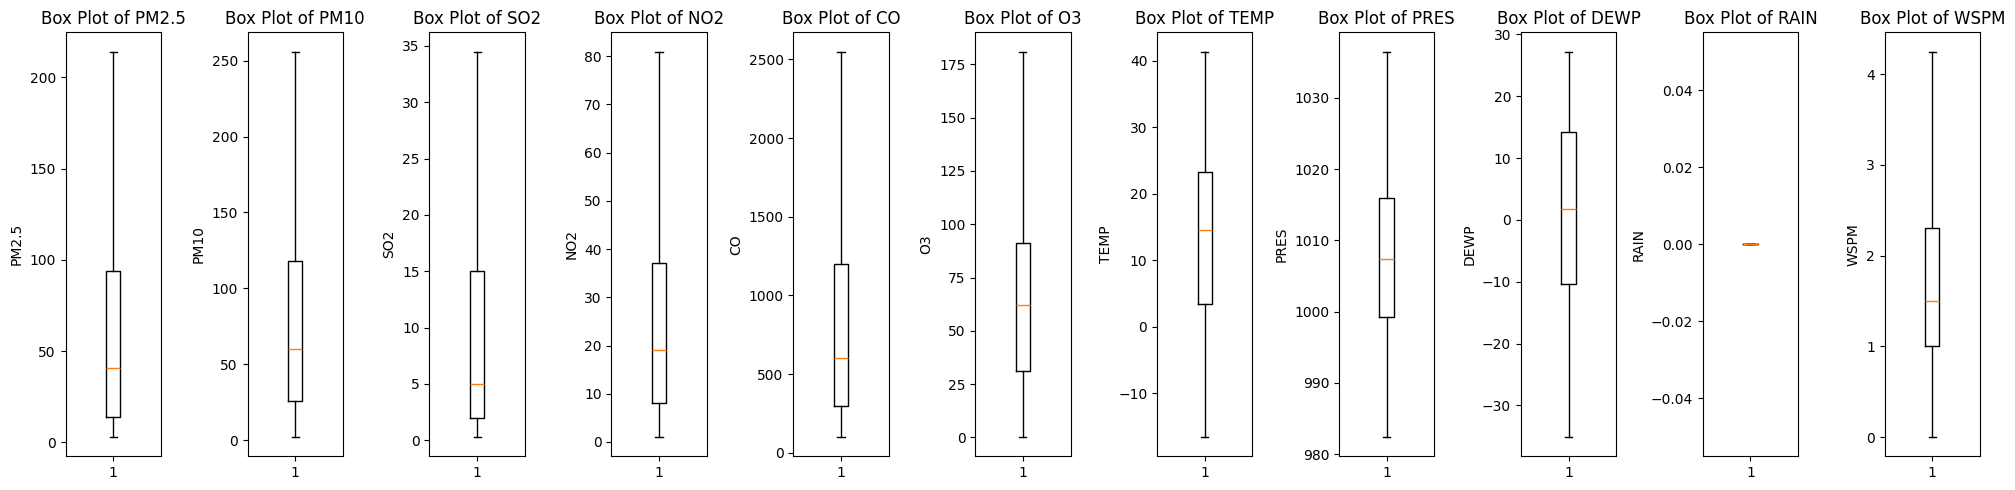

In [483]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(dingling_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `dongsi`

##### Missing values

In [484]:
dongsi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [485]:
missing_value_cols = [col for col in numerical_cols if dongsi[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [486]:
# imputasi missing value
dongsi_cleaned = impute_missing_values(dongsi, missing_value_cols)

In [487]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
dongsi_cleaned.wd = dongsi_cleaned.wd.ffill()

In [488]:
dongsi_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [489]:
# Memeriksa dan mengganti outliers 
dongsi_cleaned = replace_outliers_iqr(dongsi_cleaned, numerical_cols)

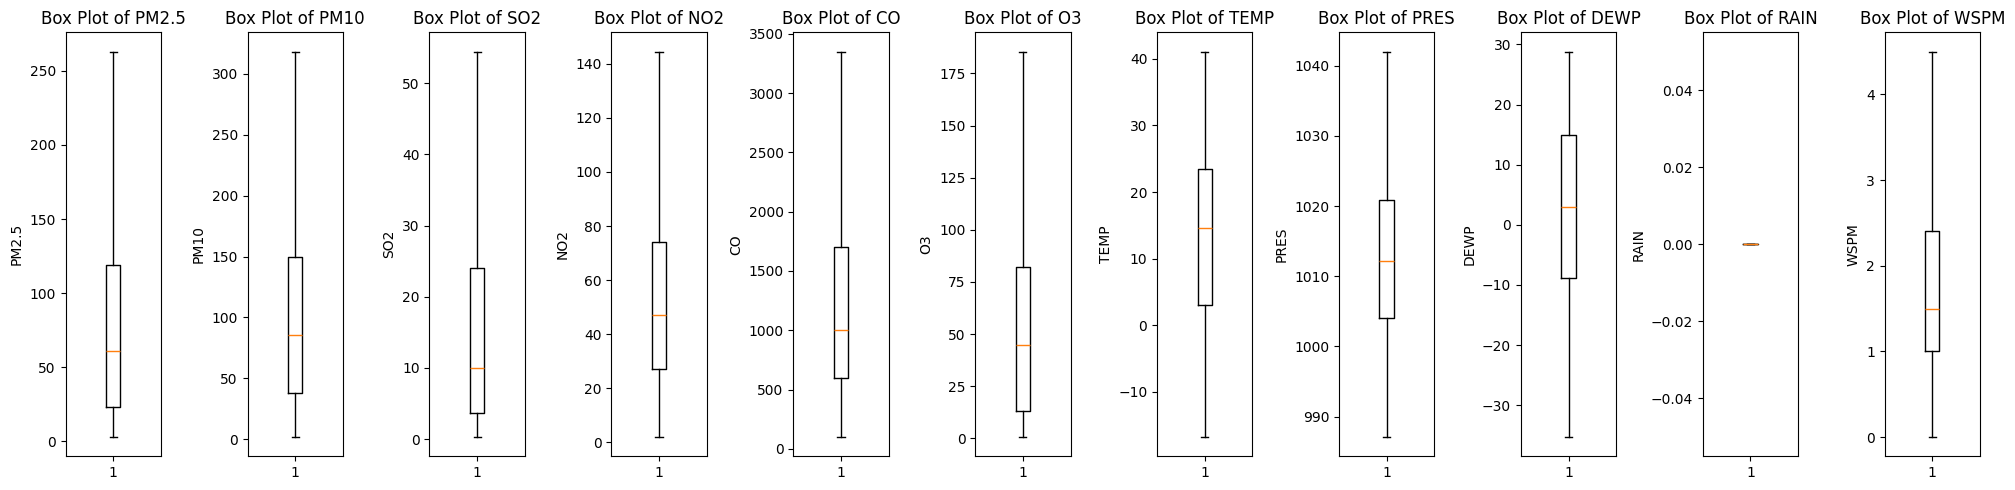

In [490]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(dongsi_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `guanyuan`

##### Missing values

In [491]:
guanyuan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       616
PM10        429
SO2         474
NO2         659
CO         1753
O3         1173
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [492]:
missing_value_cols = [col for col in numerical_cols if guanyuan[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [493]:
# imputasi missing value
guanyuan_cleaned = impute_missing_values(guanyuan, missing_value_cols)

In [494]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
guanyuan_cleaned.wd = guanyuan_cleaned.wd.ffill()

In [495]:
guanyuan_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [496]:
# Memeriksa dan mengganti outliers 
guanyuan_cleaned = replace_outliers_iqr(guanyuan_cleaned, numerical_cols)

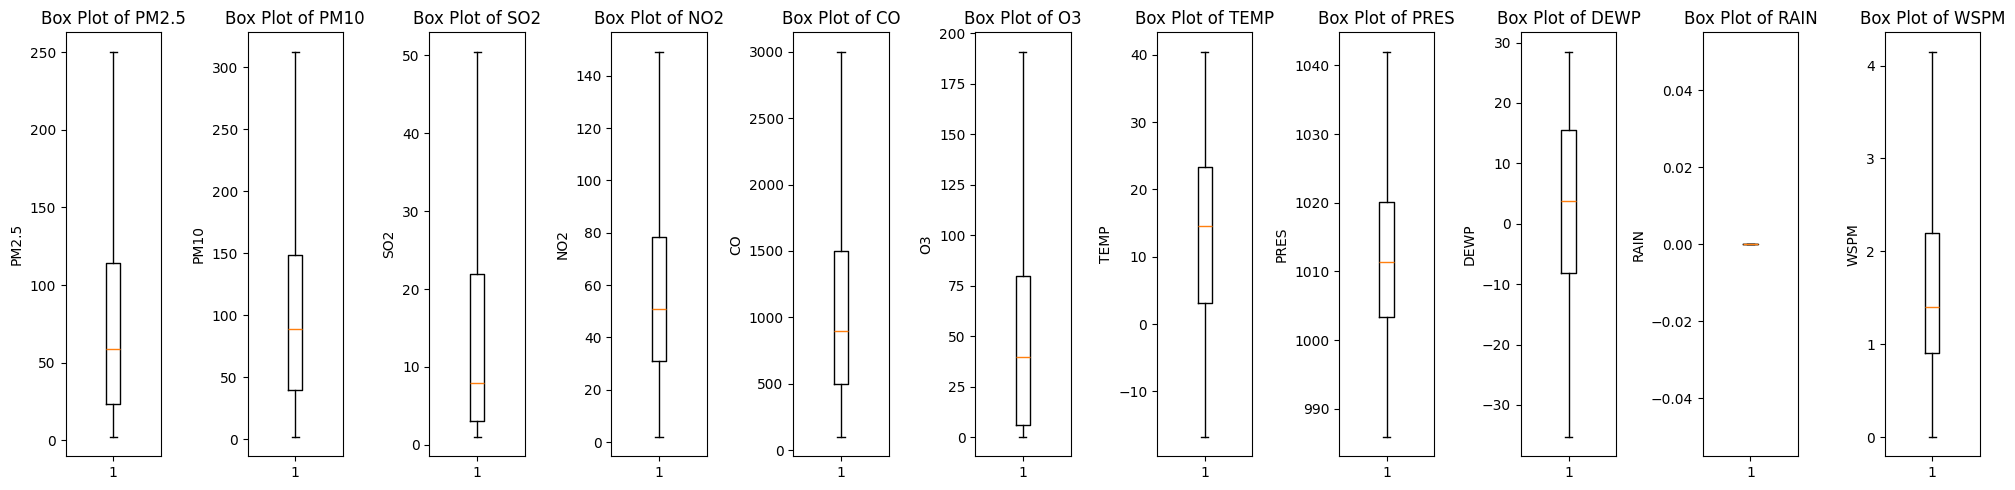

In [497]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(guanyuan_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `gucheng`

##### Missing values

In [498]:
gucheng.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       646
PM10        381
SO2         507
NO2         668
CO         1401
O3          729
TEMP         51
PRES         50
DEWP         51
RAIN         43
wd          159
WSPM         42
station       0
dtype: int64

In [499]:
missing_value_cols = [col for col in numerical_cols if gucheng[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [500]:
# imputasi missing value
gucheng_cleaned = impute_missing_values(gucheng, missing_value_cols)

In [501]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
gucheng_cleaned.wd = gucheng_cleaned.wd.ffill()

In [502]:
gucheng_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [503]:
# Memeriksa dan mengganti outliers 
gucheng_cleaned = replace_outliers_iqr(gucheng_cleaned, numerical_cols)

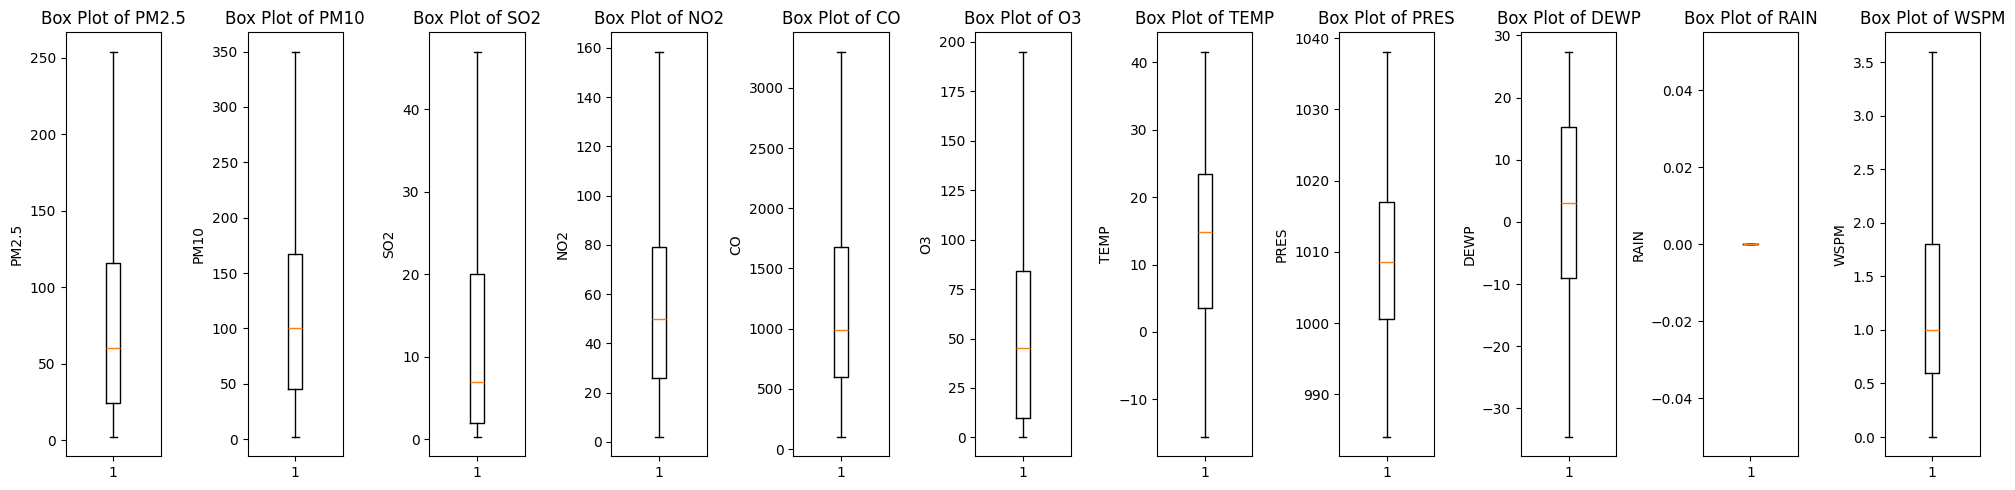

In [504]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(gucheng_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `huairou`

##### Missing values

In [505]:
huairou.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [506]:
missing_value_cols = [col for col in numerical_cols if huairou[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [507]:
# imputasi missing value
huairou_cleaned = impute_missing_values(huairou, missing_value_cols)

In [508]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
huairou_cleaned.wd = huairou_cleaned.wd.ffill()

In [509]:
huairou_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [510]:
# Memeriksa dan mengganti outliers 
huairou_cleaned = replace_outliers_iqr(huairou_cleaned, numerical_cols)

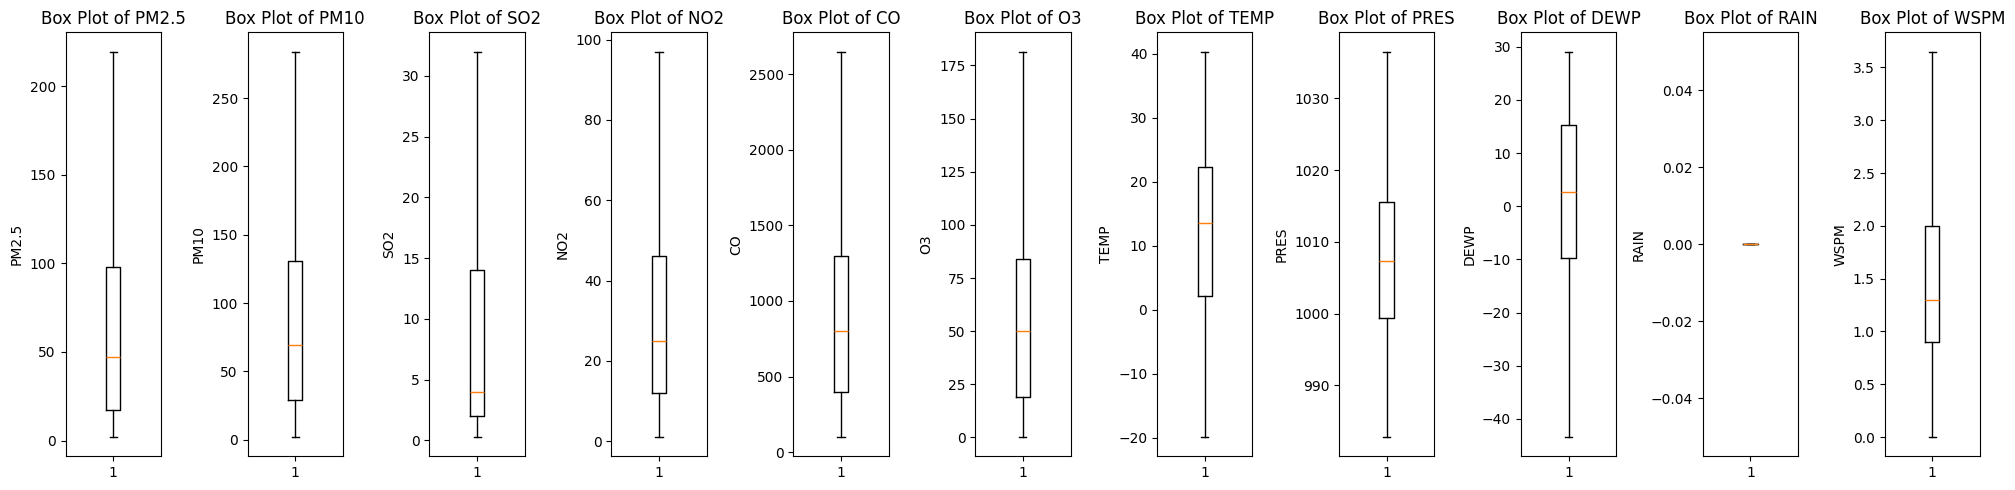

In [511]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(huairou_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `nongzhanguan`

##### Missing values

In [512]:
nongzhanguan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       628
PM10        440
SO2         446
NO2         692
CO         1206
O3          506
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [513]:
missing_value_cols = [col for col in numerical_cols if nongzhanguan[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [514]:
# imputasi missing value
nongzhanguan_cleaned = impute_missing_values(nongzhanguan, missing_value_cols)

In [515]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
nongzhanguan_cleaned.wd = nongzhanguan_cleaned.wd.ffill()

In [516]:
nongzhanguan_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [517]:
# Memeriksa dan mengganti outliers 
nongzhanguan_cleaned = replace_outliers_iqr(nongzhanguan_cleaned, numerical_cols)

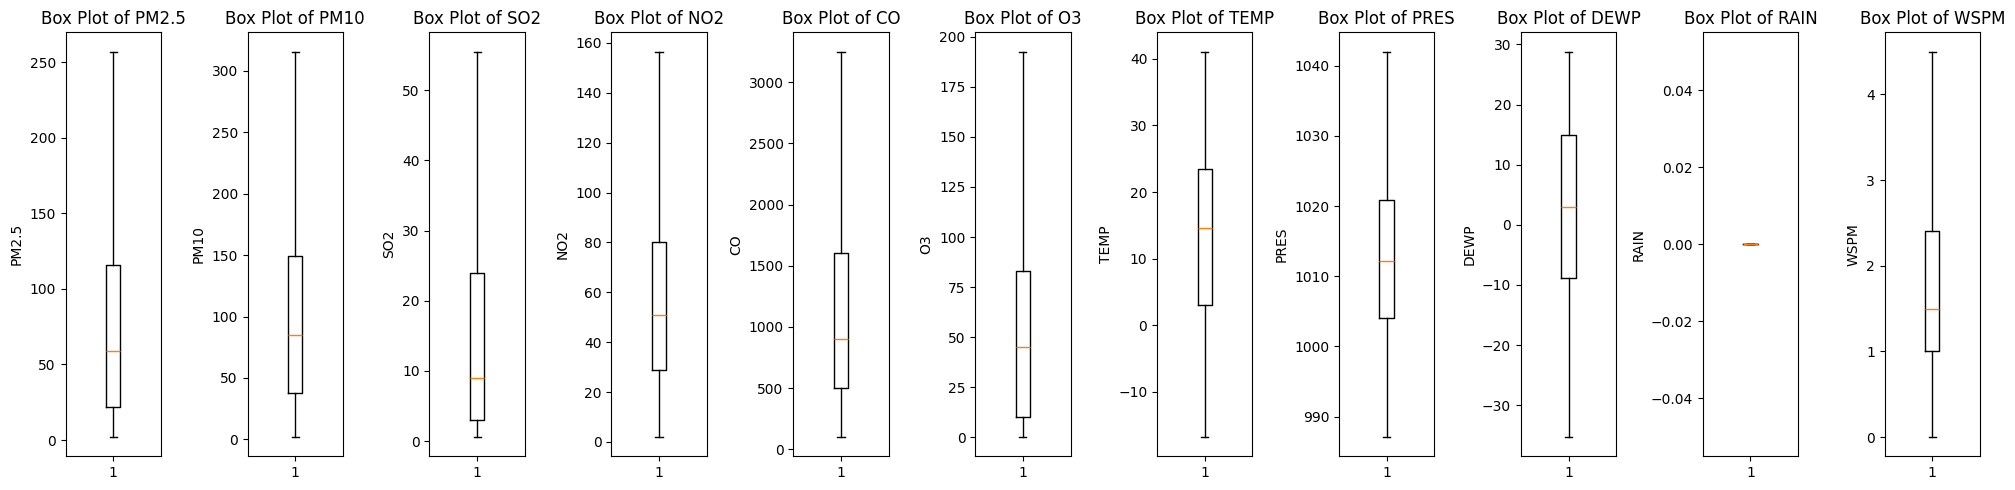

In [518]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(nongzhanguan_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `shunyi`

##### Missing values

In [519]:
shunyi.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

In [520]:
missing_value_cols = [col for col in numerical_cols if shunyi[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [521]:
# imputasi missing value
shunyi_cleaned = impute_missing_values(shunyi, missing_value_cols)

In [522]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
shunyi_cleaned.wd = shunyi_cleaned.wd.ffill()

In [523]:
shunyi_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [524]:
# Memeriksa dan mengganti outliers 
shunyi_cleaned = replace_outliers_iqr(shunyi_cleaned, numerical_cols)

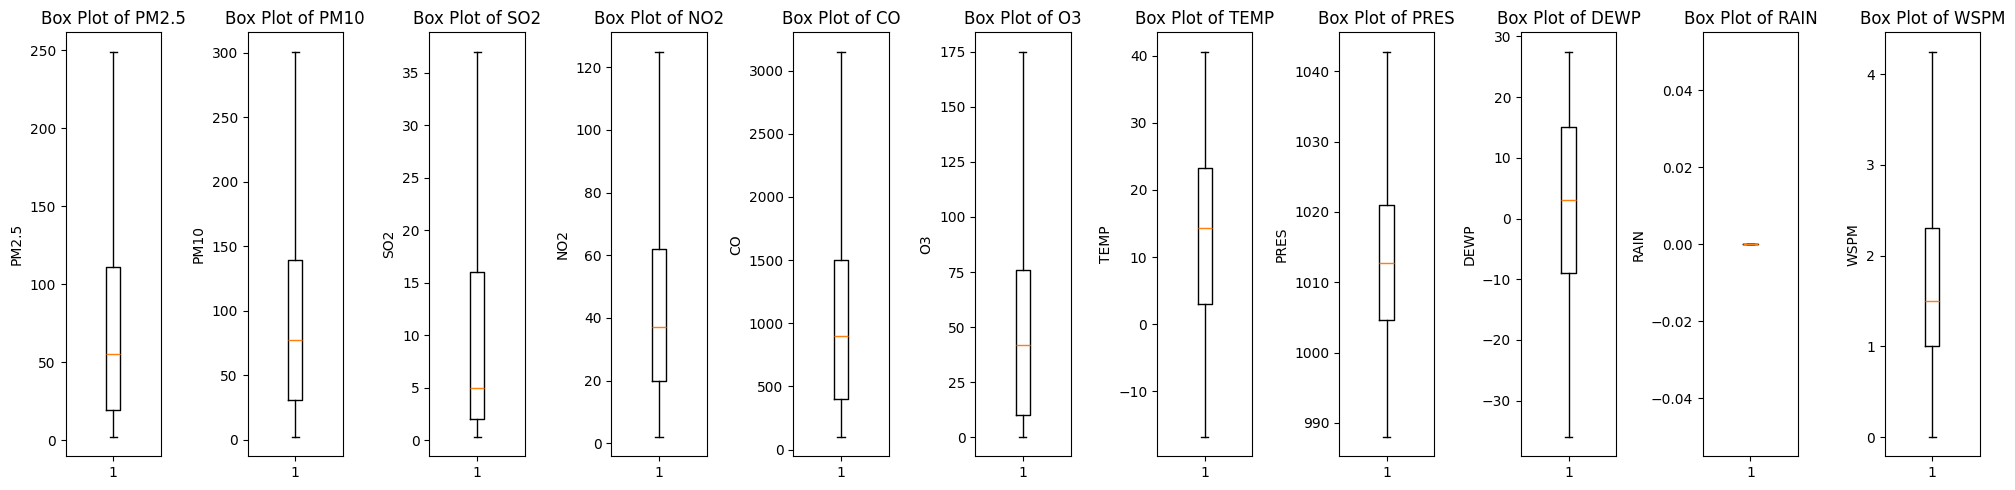

In [525]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(shunyi_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `tiantan`

##### Missing values

In [526]:
tiantan.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       677
PM10        597
SO2        1118
NO2         744
CO         1126
O3          843
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [527]:
missing_value_cols = [col for col in numerical_cols if tiantan[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [528]:
# imputasi missing value
tiantan_cleaned = impute_missing_values(tiantan, missing_value_cols)

In [529]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
tiantan_cleaned.wd = tiantan_cleaned.wd.ffill()

In [530]:
tiantan_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [531]:
# Memeriksa dan mengganti outliers 
tiantan_cleaned = replace_outliers_iqr(tiantan_cleaned, numerical_cols)

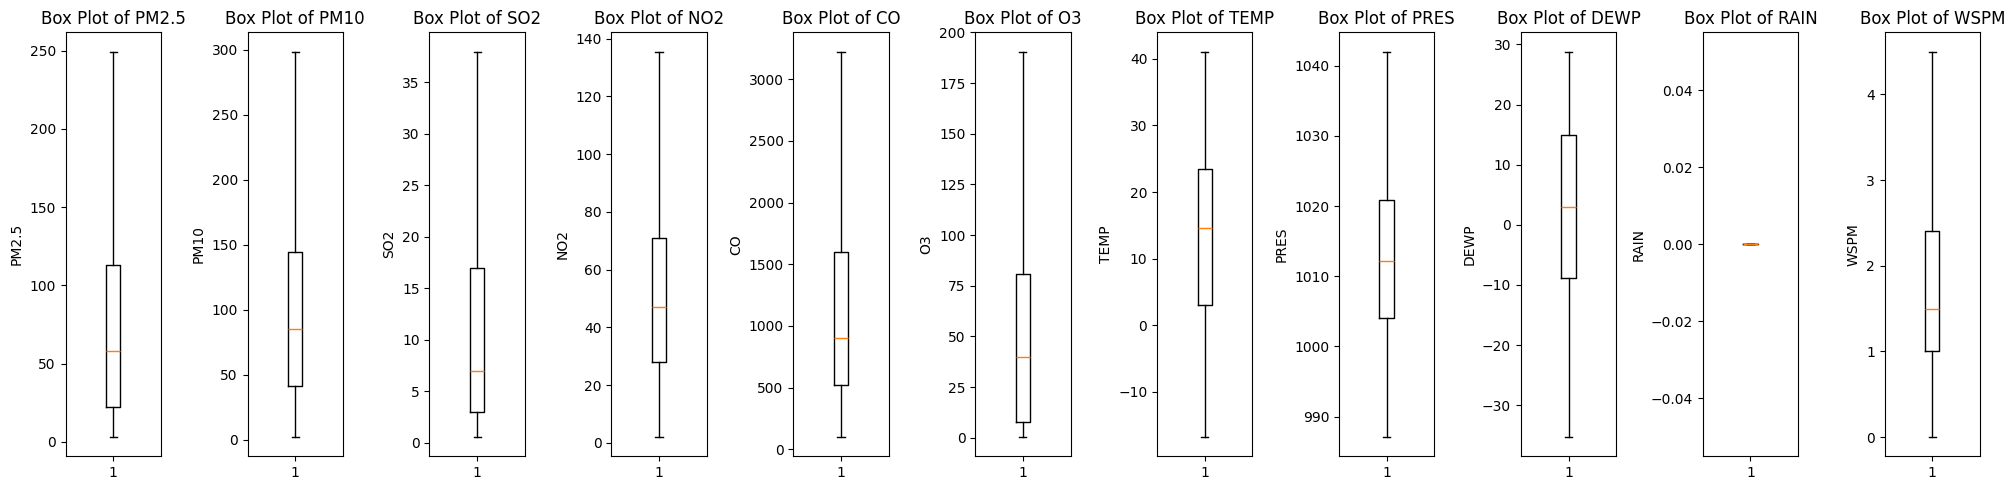

In [532]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(tiantan_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `wanliu`

##### Missing values

In [533]:
wanliu.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       382
PM10        284
SO2         575
NO2        1070
CO         1812
O3         2107
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd          123
WSPM         14
station       0
dtype: int64

In [534]:
missing_value_cols = [col for col in numerical_cols if wanliu[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [535]:
# imputasi missing value
wanliu_cleaned = impute_missing_values(wanliu, missing_value_cols)

In [536]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
wanliu_cleaned.wd = wanliu_cleaned.wd.ffill()

In [537]:
wanliu_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [538]:
# Memeriksa dan mengganti outliers 
wanliu_cleaned = replace_outliers_iqr(wanliu_cleaned, numerical_cols)

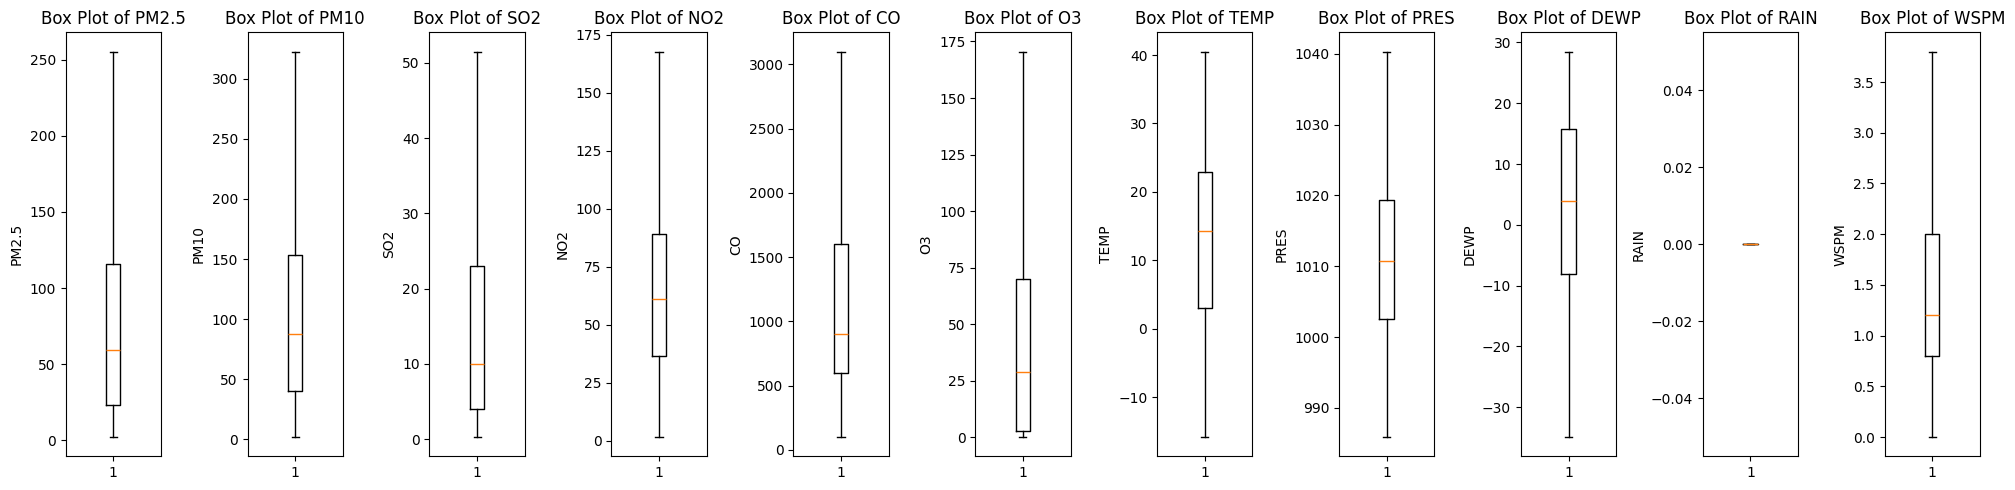

In [539]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(wanliu_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

#### Membersihkan tabel `wanshouxigong`

##### Missing values

In [540]:
wanshouxigong.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       696
PM10        484
SO2         669
NO2         754
CO         1297
O3         1078
TEMP         19
PRES         19
DEWP         19
RAIN         19
wd           79
WSPM         13
station       0
dtype: int64

In [541]:
missing_value_cols = [col for col in numerical_cols if wanshouxigong[col].isnull().sum() > 0]

print(missing_value_cols)

['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']


In [542]:
# imputasi missing value
wanshouxigong_cleaned = impute_missing_values(wanshouxigong, missing_value_cols)

In [543]:
# mengisi missing value pada kolom 'wd' dengan nilai sebelumnya
wanshouxigong_cleaned.wd = wanshouxigong_cleaned.wd.ffill()

In [544]:
wanshouxigong_cleaned.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

Setelah diperiksa kembali, sudah tidak ada missing value lagi

##### Outliers

In [545]:
# Memeriksa dan mengganti outliers 
wanshouxigong_cleaned = replace_outliers_iqr(wanshouxigong_cleaned, numerical_cols)

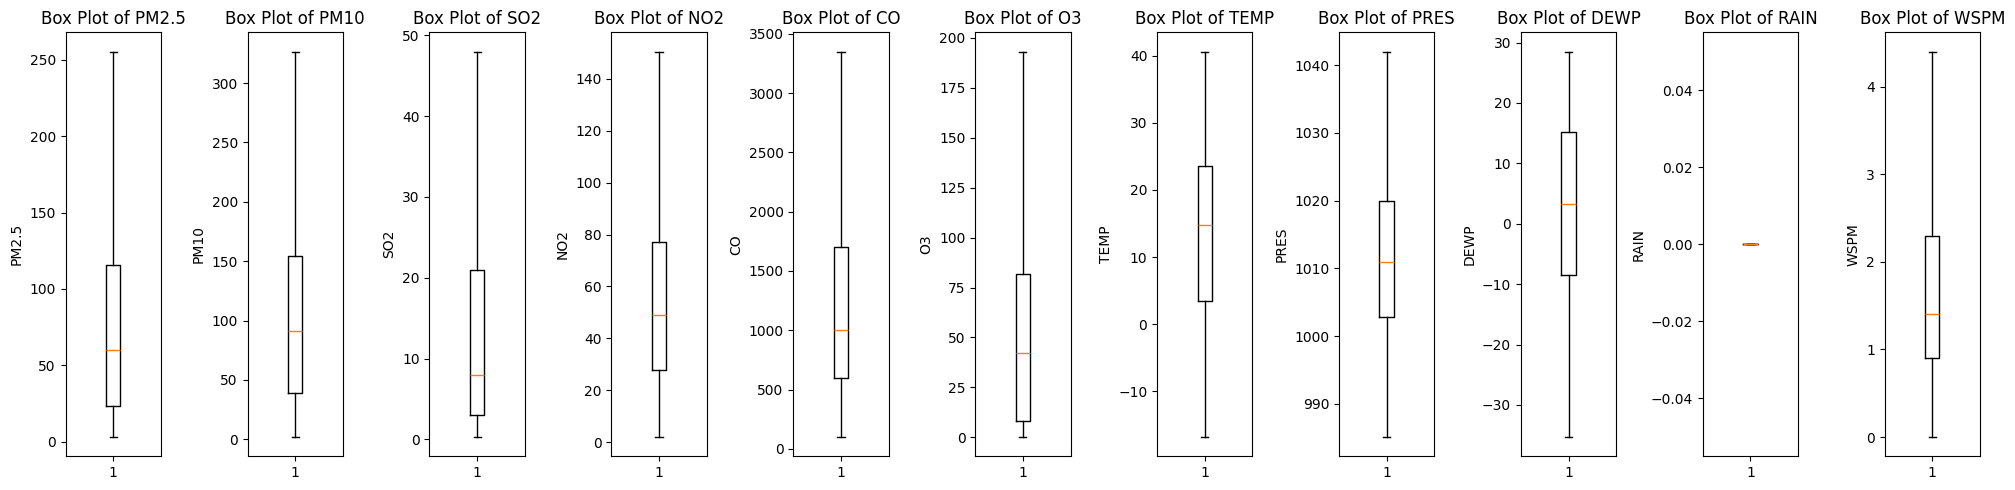

In [546]:
# boxplot kolom numerik tabel yang sudah dibersihkan
plot(wanshouxigong_cleaned, numerical_cols)

Sekarang sudah tidak ada outlier lagi

**Insight** <br>
Pada setiap tabel, dilakukan:
- Pengisian missing value kolom numerik menggunakan metode interpolasi. Apabila metode tersebut masih menghasilkan nilai kosong, maka akan diisi dengan median kolom
- Pengisian missing value kolom kategorik dengan metode ffil() atau forward fill, yaitu diisikan dengan nilai sebelumnya
- Penggantian outlier dilakukan dengan menggunakan nilai batas atas (Q3 + 1.5 × IQR) atau batas bawah (Q1 - 1.5 × IQR).

equation{\times}

## Exploratory Data Analysis (EDA)

Referensi materi AQI (*Air Quality Index*):
- https://www.pranaair.com/blog/what-is-air-quality-index-aqi-and-its-calculation/ (formula AQI)
- https://kunakair.com/air-quality-index/ (pemilihan rentang konsentrasi polutan dan level AQI)



In [547]:
# Fungsi untuk menghitung sub-AQI berdasarkan konsentrasi polutan
def calculate_sub_aqi(concentration, polutan):
    # Tentukan rentang batas konsentrasi dan AQI untuk setiap polutan
    if polutan == "PM2.5":
        ranges = [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), 
                  (150.5, 250.4, 201, 300), (250.5, 500.4, 301, 500)]
    elif polutan == "PM10":
        ranges = [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200),
                  (355, 424, 201, 300), (425, 604, 301, 500)]
    elif polutan == "SO2":
        ranges = [(0, 93.13, 0, 50), (93.14, 199.56, 51, 100), (199.57, 494.92, 101, 150), (494.93, 808.91, 151, 200),
                  (808.92, 1607.18, 201, 300), (1607.19, 2671.54, 301, 500)]
    elif polutan == "NO2":
        ranges = [(0, 99.6, 0, 50), (99.7, 188, 51, 100), (188.1, 676.8, 101, 150), (676.9, 1220.1, 151, 200),
                  (1220.2, 2348.1, 201, 300), (2348.2, 3852.1, 301, 500)]
    elif polutan == "CO":
        ranges = [(0, 5038, 0, 50), (5039, 10763, 51, 100), (10764, 14198, 101, 150), (14199, 17633, 151, 200),
                  (17634, 34808, 201, 300), (34809, 57708, 301, 500)]
    elif polutan == "O3":
        ranges = [(0, 108, 0, 50), (109, 140, 51, 100), (140, 210, 101, 150), (211, 400, 151, 200),
                  (401, 808, 201, 300), (809, 1208, 301, 500)]
    
    # Tentukan sub-AQI berdasarkan rentang konsentrasi
    for lower, upper, I_low, I_high in ranges:
        if lower <= concentration <= upper:
            sub_aqi = ((I_high - I_low) / (upper - lower)) * (concentration - lower) + I_low
            return sub_aqi

# Fungsi untuk menghitung AQI berdasarkan polutan
def calculate_aqi(df):
    df_copy = df.copy()
    for index, row in df.iterrows():
        sub_aqi_values = []
        # Untuk setiap polutan, hitung sub-AQI dan simpan nilai tertinggi
        for polutan in ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]:
            concentration = row[polutan]
            if pd.notnull(concentration):
                sub_aqi = calculate_sub_aqi(concentration, polutan)
                if sub_aqi is not None:
                    sub_aqi_values.append(sub_aqi)
        
        # Menyimpan AQI tertinggi di antara polutan
        if sub_aqi_values:
            max_aqi = max(sub_aqi_values)
            df_copy.at[index, 'AQI'] = max_aqi
    return df_copy

In [548]:
# Fungsi untuk menentukan kategori level berdasarkan AQI
def categorize_aqi_level(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Moderate"
    elif aqi <= 150:
        return "Unhealthy for Sensitive Groups"
    elif aqi <= 200:
        return "Unhealthy"
    elif aqi <= 300:
        return "Very Unhealthy"
    else:
        return "Hazardous"

### Explore tabel `aotizhongxin`

In [549]:
# menghitung AQI
aotizhongxin_aqi = calculate_aqi(aotizhongxin_cleaned)
aotizhongxin_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station        AQI  
0  1023.0 -18.8   0.0  NNW  4.15  Aotizhongxin  35.648148  
1  1023.2 -18.2   0.0    N  4.15  Aotizhongxin  35.648148  
2  1023.5 -18.2   0.0  NNW  4.15  Aotizhongxin  33.796296  
3  1024.5 -19.4   0.0   NW  3.10  Aotizhongxin  33.333333  
4  1025.2 -19.5   0.0    N  2.00  Aotizhongxin  33.333333

In [550]:
# pivot tabel data harian
daily_aotizhongxin = aotizhongxin_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [551]:
# pivot tabel data bulanan
monthly_aotizhongxin = aotizhongxin_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [552]:
# pivot tabel data tahunan
annual_aotizhongxin = aotizhongxin_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [553]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_aotizhongxin['AQI_level'] = daily_aotizhongxin['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_aotizhongxin['date'] = pd.to_datetime(daily_aotizhongxin[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_aotizhongxin = daily_aotizhongxin.drop(columns=['year', 'month', 'day'])

daily_aotizhongxin.head(5)

AQI      TEMP       PM2.5        PM10        SO2         NO2  \
0   37.029961  1.391667    7.125000   10.750000  11.708333   22.583333   
1   83.870998  0.616667   30.750000   42.083333  32.666667   66.666667   
2  150.745036  5.566667   76.916667  120.541667  39.250000   81.000000   
3   73.879737  9.962500   22.708333   44.583333  22.833333   46.187500   
4  209.031645  6.291667  148.875000  183.791667  50.500000  122.083333   

            CO         O3       station       AQI_level       date  
0   429.166667  63.875000  Aotizhongxin            Good 2013-03-01  
1   824.916667  29.750000  Aotizhongxin        Moderate 2013-03-02  
2  1620.625000  19.125000  Aotizhongxin       Unhealthy 2013-03-03  
3   606.250000  53.750000  Aotizhongxin        Moderate 2013-03-04  
4  2287.125000  68.458333  Aotizhongxin  Very Unhealthy 2013-03-05

In [554]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_aotizhongxin['AQI_level'] = monthly_aotizhongxin['AQI'].apply(categorize_aqi_level)
monthly_aotizhongxin.head(5)

year  month         AQI       station                       AQI_level
0  2013      3  164.722352  Aotizhongxin                       Unhealthy
1  2013      4  125.674948  Aotizhongxin  Unhealthy for Sensitive Groups
2  2013      5  155.209953  Aotizhongxin                       Unhealthy
3  2013      6  170.537156  Aotizhongxin                       Unhealthy
4  2013      7  138.643577  Aotizhongxin  Unhealthy for Sensitive Groups

In [555]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_aotizhongxin['AQI_level'] = annual_aotizhongxin['AQI'].apply(categorize_aqi_level)
annual_aotizhongxin.head(5)

year         AQI       station                       AQI_level
0  2013  143.868731  Aotizhongxin  Unhealthy for Sensitive Groups
1  2014  149.196260  Aotizhongxin  Unhealthy for Sensitive Groups
2  2015  139.585285  Aotizhongxin  Unhealthy for Sensitive Groups
3  2016  132.989890  Aotizhongxin  Unhealthy for Sensitive Groups
4  2017  137.531611  Aotizhongxin  Unhealthy for Sensitive Groups

### Explore tabel `changping`

In [556]:
# menghitung AQI
changping_aqi = calculate_aqi(changping_cleaned)
changping_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  13.0   7.0  300.0  85.0  -2.3   
1   2  2013      3    1     1    3.0   3.0   6.0   6.0  300.0  85.0  -2.5   
2   3  2013      3    1     2    3.0   3.0  22.0  13.0  400.0  74.0  -3.0   
3   4  2013      3    1     3    3.0   6.0  12.0   8.0  300.0  81.0  -3.6   
4   5  2013      3    1     4    3.0   3.0  14.0   8.0  300.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM    station        AQI  
0  1020.8 -19.7   0.0    E   0.5  Changping  39.351852  
1  1021.3 -19.0   0.0  ENE   0.7  Changping  39.351852  
2  1021.3 -19.9   0.0  ENE   0.2  Changping  34.259259  
3  1021.8 -19.1   0.0  NNE   1.0  Changping  37.500000  
4  1022.3 -19.4   0.0    N   2.1  Changping  37.500000

In [557]:
# pivot tabel data harian
daily_changping = changping_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [558]:
# pivot tabel data bulanan
monthly_changping = changping_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [559]:
# pivot tabel data tahunan
annual_changping = changping_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [560]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_changping['AQI_level'] = daily_changping['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_changping['date'] = pd.to_datetime(daily_changping[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_changping = daily_changping.drop(columns=['year', 'month', 'day'])

daily_changping.head(5)

AQI      TEMP       PM2.5        PM10        SO2        NO2  \
0   38.963033  0.812500    5.083333   18.958333  16.000000  15.333333   
1   95.376103 -0.395833   33.333333   39.833333  37.104167  60.312500   
2  131.523702  5.329167   57.541667   82.666667  30.416667  58.791667   
3   66.764027  9.237500   20.791667   36.166667  21.333333  30.250000   
4  178.184304  6.462500  106.958333  125.166667  38.250000  74.625000   

            CO         O3    station                       AQI_level  \
0   387.500000  77.791667  Changping                            Good   
1   954.166667  29.083333  Changping                        Moderate   
2  1254.000000  31.333333  Changping  Unhealthy for Sensitive Groups   
3   583.333333  66.458333  Changping                        Moderate   
4  1641.333333  88.750000  Changping                       Unhealthy   

        date  
0 2013-03-01  
1 2013-03-02  
2 2013-03-03  
3 2013-03-04  
4 2013-03-05

In [561]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_changping['AQI_level'] = monthly_changping['AQI'].apply(categorize_aqi_level)
monthly_changping.head(5)

year  month         AQI    station                       AQI_level
0  2013      3  151.981598  Changping                       Unhealthy
1  2013      4  120.547785  Changping  Unhealthy for Sensitive Groups
2  2013      5  149.656625  Changping  Unhealthy for Sensitive Groups
3  2013      6  143.020086  Changping  Unhealthy for Sensitive Groups
4  2013      7  125.210619  Changping  Unhealthy for Sensitive Groups

In [562]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_changping['AQI_level'] = annual_changping['AQI'].apply(categorize_aqi_level)
annual_changping.head(5)

year         AQI    station                       AQI_level
0  2013  131.916750  Changping  Unhealthy for Sensitive Groups
1  2014  137.084621  Changping  Unhealthy for Sensitive Groups
2  2015  127.404391  Changping  Unhealthy for Sensitive Groups
3  2016  119.698798  Changping  Unhealthy for Sensitive Groups
4  2017  125.597013  Changping  Unhealthy for Sensitive Groups

### Explore tabel `dingling`

In [563]:
# menghitung AQI
dingling_aqi = calculate_aqi(dingling_cleaned)
dingling_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2        NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  19.000000  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  19.000000  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0   2.000000  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0   2.666667  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0   3.333333  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station        AQI  
0  1020.8 -19.7   0.0    E   0.5  Dingling  37.962963  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  37.037037  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  36.574074  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  36.574074  
4  1022.3 -19.4   0.0    N   2.1  Dingling  37.500000

In [564]:
# pivot tabel data harian
daily_dingling = dingling_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [565]:
# pivot tabel data bulanan
monthly_dingling = dingling_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [566]:
# pivot tabel data tahunan
annual_dingling = dingling_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [567]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_dingling['AQI_level'] = daily_dingling['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_dingling['date'] = pd.to_datetime(daily_dingling[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_dingling = daily_dingling.drop(columns=['year', 'month', 'day'])

daily_dingling.head(5)

AQI      TEMP       PM2.5        PM10        SO2        NO2  \
0   38.672661  0.812500    6.375000    6.270833   3.000000   3.708333   
1   98.791228 -0.395833   34.041667   41.708333  23.708333  56.330850   
2  114.324723  5.329167   43.833333   65.333333  17.020833  41.208333   
3   61.423975  9.237500   17.541667   27.854167   9.166667  13.375000   
4  175.612772  6.462500  105.375000  117.208333  26.729167  54.862582   

            CO         O3   station                       AQI_level       date  
0   204.166667  81.958333  Dingling                            Good 2013-03-01  
1   875.000000  24.708333  Dingling                        Moderate 2013-03-02  
2   818.750000  41.000000  Dingling  Unhealthy for Sensitive Groups 2013-03-03  
3   400.000000  76.916667  Dingling                        Moderate 2013-03-04  
4  1187.375000  86.500000  Dingling                       Unhealthy 2013-03-05

In [568]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_dingling['AQI_level'] = monthly_dingling['AQI'].apply(categorize_aqi_level)
monthly_dingling.head(5)

year  month         AQI   station                       AQI_level
0  2013      3  146.641866  Dingling  Unhealthy for Sensitive Groups
1  2013      4  114.135932  Dingling  Unhealthy for Sensitive Groups
2  2013      5  137.472555  Dingling  Unhealthy for Sensitive Groups
3  2013      6  146.396066  Dingling  Unhealthy for Sensitive Groups
4  2013      7  118.658868  Dingling  Unhealthy for Sensitive Groups

In [569]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_dingling['AQI_level'] = annual_dingling['AQI'].apply(categorize_aqi_level)
annual_dingling.head(5)

year         AQI   station                       AQI_level
0  2013  122.600487  Dingling  Unhealthy for Sensitive Groups
1  2014  128.976964  Dingling  Unhealthy for Sensitive Groups
2  2015  119.652228  Dingling  Unhealthy for Sensitive Groups
3  2016  117.663684  Dingling  Unhealthy for Sensitive Groups
4  2017  117.728934  Dingling  Unhealthy for Sensitive Groups

### Explore tabel `dongsi`

In [570]:
# menghitung AQI
dongsi_aqi = calculate_aqi(dongsi_cleaned)
dongsi_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  4.0  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0  250.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0  21.5  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station        AQI  
0  1024.5 -21.4   0.0  NNW   4.5  Dongsi  41.203704  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  40.740741  
2  1025.3 -24.6   0.0  NNW   4.5  Dongsi  29.166667  
3  1026.2 -25.5   0.0    N   4.5  Dongsi  33.333333  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  38.888889

In [571]:
# pivot tabel data harian
daily_dongsi = dongsi_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [572]:
# pivot tabel data bulanan
monthly_dongsi = dongsi_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [573]:
# pivot tabel data tahunan
annual_dongsi = dongsi_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [574]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_dongsi['AQI_level'] = daily_dongsi['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_dongsi['date'] = pd.to_datetime(daily_dongsi[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_dongsi = daily_dongsi.drop(columns=['year', 'month', 'day'])

daily_dongsi.head(5)

AQI       TEMP       PM2.5        PM10        SO2         NO2  \
0   39.237744   1.325000    6.416667    9.875000   8.291667   28.229167   
1   79.977662   0.491667   30.500000   40.583333  26.553850   58.500000   
2  169.238104   4.987500   98.333333  131.583333  43.977583   93.458333   
3   76.316882  10.562500   24.291667   40.875000  16.511800   47.671642   
4  213.596751   7.212500  154.250000  183.166667  54.430800  119.604167   

            CO         O3 station       AQI_level       date  
0   389.583333  72.750000  Dongsi            Good 2013-03-01  
1   966.583333  37.791667  Dongsi        Moderate 2013-03-02  
2  2132.875000  20.333333  Dongsi       Unhealthy 2013-03-03  
3   833.333333  62.291667  Dongsi        Moderate 2013-03-04  
4  2399.770833  83.041667  Dongsi  Very Unhealthy 2013-03-05

In [575]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_dongsi['AQI_level'] = monthly_dongsi['AQI'].apply(categorize_aqi_level)
monthly_dongsi.head(5)

year  month         AQI station                       AQI_level
0  2013      3  163.683510  Dongsi                       Unhealthy
1  2013      4  130.309250  Dongsi  Unhealthy for Sensitive Groups
2  2013      5  161.154761  Dongsi                       Unhealthy
3  2013      6  172.781420  Dongsi                       Unhealthy
4  2013      7  144.014255  Dongsi  Unhealthy for Sensitive Groups

In [576]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_dongsi['AQI_level'] = annual_dongsi['AQI'].apply(categorize_aqi_level)
annual_dongsi.head(5)

year         AQI station                       AQI_level
0  2013  148.617872  Dongsi  Unhealthy for Sensitive Groups
1  2014  146.455388  Dongsi  Unhealthy for Sensitive Groups
2  2015  143.418907  Dongsi  Unhealthy for Sensitive Groups
3  2016  138.280548  Dongsi  Unhealthy for Sensitive Groups
4  2017  145.258269  Dongsi  Unhealthy for Sensitive Groups

### Explore tabel `guanyuan`

In [577]:
# menghitung AQI
guanyuan_aqi = calculate_aqi(guanyuan_cleaned)
guanyuan_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  14.0  20.0  300.0  69.0  -0.7   
1   2  2013      3    1     1    4.0   4.0  13.0  17.0  300.0  72.0  -1.1   
2   3  2013      3    1     2    3.0   3.0  10.0  19.0  300.0  69.0  -1.1   
3   4  2013      3    1     3    3.0   6.0   7.0  24.0  400.0  62.0  -1.4   
4   5  2013      3    1     4    3.0   6.0   5.0  14.0  400.0  71.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM   station        AQI  
0  1023.0 -18.8   0.0  NNW  4.15  Guanyuan  31.944444  
1  1023.2 -18.2   0.0    N  4.15  Guanyuan  33.333333  
2  1023.5 -18.2   0.0  NNW  4.15  Guanyuan  31.944444  
3  1024.5 -19.4   0.0   NW  3.10  Guanyuan  28.703704  
4  1025.2 -19.5   0.0    N  2.00  Guanyuan  32.870370

In [578]:
# pivot tabel data harian
daily_guanyuan = guanyuan_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [579]:
# pivot tabel data bulanan
monthly_guanyuan = guanyuan_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [580]:
# pivot tabel data tahunan
annual_guanyuan = guanyuan_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [581]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_guanyuan['AQI_level'] = daily_guanyuan['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_guanyuan['date'] = pd.to_datetime(daily_guanyuan[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_guanyuan = daily_guanyuan.drop(columns=['year', 'month', 'day'])

daily_guanyuan.head(5)

AQI      TEMP       PM2.5        PM10        SO2         NO2  \
0   38.725607  1.391667    7.541667   11.666667   8.500000   28.500000   
1   75.492512  0.616667   26.375000   34.875000  27.187500   62.854167   
2  155.587355  5.566667   81.500000  119.083333  39.770833   96.458333   
3   63.911305  9.962500   18.250000   41.958333  19.562500   51.333333   
4  202.856364  6.291667  141.166667  163.708333  50.500000  119.107521   

            CO         O3   station       AQI_level       date  
0   400.000000  63.166667  Guanyuan            Good 2013-03-01  
1   841.583333  35.166667  Guanyuan        Moderate 2013-03-02  
2  1958.125000  16.500000  Guanyuan       Unhealthy 2013-03-03  
3   625.000000  54.500000  Guanyuan        Moderate 2013-03-04  
4  2383.083333  78.791667  Guanyuan  Very Unhealthy 2013-03-05

In [582]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_guanyuan['AQI_level'] = monthly_guanyuan['AQI'].apply(categorize_aqi_level)
monthly_guanyuan.head(5)

year  month         AQI   station                       AQI_level
0  2013      3  159.017323  Guanyuan                       Unhealthy
1  2013      4  123.039409  Guanyuan  Unhealthy for Sensitive Groups
2  2013      5  154.332887  Guanyuan                       Unhealthy
3  2013      6  169.910318  Guanyuan                       Unhealthy
4  2013      7  135.187910  Guanyuan  Unhealthy for Sensitive Groups

In [583]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_guanyuan['AQI_level'] = annual_guanyuan['AQI'].apply(categorize_aqi_level)
annual_guanyuan.head(5)

year         AQI   station                       AQI_level
0  2013  144.137968  Guanyuan  Unhealthy for Sensitive Groups
1  2014  147.997673  Guanyuan  Unhealthy for Sensitive Groups
2  2015  140.060032  Guanyuan  Unhealthy for Sensitive Groups
3  2016  135.660334  Guanyuan  Unhealthy for Sensitive Groups
4  2017  141.656089  Guanyuan  Unhealthy for Sensitive Groups

### Explore tabel `gucheng`

In [584]:
# menghitung AQI
gucheng_aqi = calculate_aqi(gucheng_cleaned)
gucheng_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0  18.0  5.0  50.0  800.0  88.0   0.1   
1   2  2013      3    1     1    6.0  15.0  5.0  50.0  800.0  88.0  -0.3   
2   3  2013      3    1     2    5.0  18.0  5.5  50.0  700.0  52.0  -0.7   
3   4  2013      3    1     3    6.0  20.0  6.0  50.0  650.0  62.5  -1.0   
4   5  2013      3    1     4    5.0  17.0  5.0  50.0  600.0  73.0  -1.3   

     PRES  DEWP  RAIN   wd  WSPM  station        AQI  
0  1021.1 -18.6   0.0   NW   3.6  Gucheng  40.740741  
1  1021.5 -19.0   0.0   NW   3.6  Gucheng  40.740741  
2  1021.5 -19.8   0.0  WNW   3.6  Gucheng  25.100402  
3  1022.7 -21.2   0.0    W   2.8  Gucheng  28.935185  
4  1023.0 -21.4   0.0  WNW   3.6  Gucheng  33.796296

In [585]:
# pivot tabel data harian
daily_gucheng = gucheng_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [586]:
# pivot tabel data bulanan
monthly_gucheng = gucheng_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [587]:
# pivot tabel data tahunan
annual_gucheng = gucheng_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [588]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_gucheng['AQI_level'] = daily_gucheng['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_gucheng['date'] = pd.to_datetime(daily_gucheng[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_gucheng = daily_gucheng.drop(columns=['year', 'month', 'day'])

daily_gucheng.head(5)

AQI      TEMP       PM2.5        PM10        SO2        NO2  \
0   43.316864  1.691667    8.625000   16.875000   7.312500  44.041667   
1   93.704044  0.820833   36.916667   51.375000  32.791667  36.458333   
2  155.102218  6.562500   80.333333  120.041667  37.625000  60.104167   
3   78.548142  9.795833   26.500000   51.291667  17.541667  21.208333   
4  199.941358  6.750000  136.708333  172.541667  47.000000  89.239583   

            CO         O3  station  AQI_level       date  
0   860.416667  76.520833  Gucheng       Good 2013-03-01  
1  1479.041667  39.583333  Gucheng   Moderate 2013-03-02  
2  2287.605072  33.708333  Gucheng  Unhealthy 2013-03-03  
3  1170.666667  67.250000  Gucheng   Moderate 2013-03-04  
4  1318.588768  84.375000  Gucheng  Unhealthy 2013-03-05

In [589]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_gucheng['AQI_level'] = monthly_gucheng['AQI'].apply(categorize_aqi_level)
monthly_gucheng.head(5)

year  month         AQI  station                       AQI_level
0  2013      3  165.097738  Gucheng                       Unhealthy
1  2013      4  128.440694  Gucheng  Unhealthy for Sensitive Groups
2  2013      5  153.976028  Gucheng                       Unhealthy
3  2013      6  168.145251  Gucheng                       Unhealthy
4  2013      7  128.184648  Gucheng  Unhealthy for Sensitive Groups

In [590]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_gucheng['AQI_level'] = annual_gucheng['AQI'].apply(categorize_aqi_level)
annual_gucheng.head(5)

year         AQI  station                       AQI_level
0  2013  143.858099  Gucheng  Unhealthy for Sensitive Groups
1  2014  150.924522  Gucheng                       Unhealthy
2  2015  141.885306  Gucheng  Unhealthy for Sensitive Groups
3  2016  136.944166  Gucheng  Unhealthy for Sensitive Groups
4  2017  141.529407  Gucheng  Unhealthy for Sensitive Groups

### Explore tabel `huairou`

In [591]:
# menghitung AQI
huairou_aqi = calculate_aqi(huairou_cleaned)
huairou_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    7.0   7.0  3.0  2.0  100.0  91.0  -2.3   
1   2  2013      3    1     1    4.0   4.0  3.0  2.0  100.0  92.0  -2.7   
2   3  2013      3    1     2    4.0   4.0  3.0  2.0  100.0  91.0  -3.2   
3   4  2013      3    1     3    3.0   3.0  3.0  2.0  200.0  88.5  -3.3   
4   5  2013      3    1     4    3.0   3.0  7.0  2.5  300.0  86.0  -4.1   

     PRES  DEWP  RAIN   wd  WSPM  station        AQI  
0  1020.3 -20.7   0.0  WNW   3.1  Huairou  42.129630  
1  1020.8 -20.5   0.0  NNW   1.5  Huairou  42.592593  
2  1020.6 -21.4   0.0   NW   1.8  Huairou  42.129630  
3  1021.3 -23.7   0.0  NNW   2.4  Huairou  40.972222  
4  1022.1 -22.7   0.0  NNW   2.2  Huairou  39.814815

In [592]:
# pivot tabel data harian
daily_huairou = huairou_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [593]:
# pivot tabel data bulanan
monthly_huairou = huairou_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [594]:
# pivot tabel data tahunan
annual_huairou = huairou_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [595]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_huairou['AQI_level'] = daily_huairou['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_huairou['date'] = pd.to_datetime(daily_huairou[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_huairou = daily_huairou.drop(columns=['year', 'month', 'day'])

daily_huairou.head(5)

AQI      TEMP      PM2.5        PM10        SO2        NO2  \
0   44.398855  0.016667   7.541667   12.375000  13.791667  10.687500   
1   88.385968 -0.991667  32.708333   41.375000  29.333333  49.603487   
2  130.913579  3.912500  57.625000   80.750000  21.625000  47.625000   
3   67.264140  7.108333  20.097826   45.875000  22.791667  35.125000   
4  104.828048  5.683333  39.735507  121.333333  25.645833  62.375000   

            CO         O3  station                       AQI_level       date  
0   333.333333  78.645833  Huairou                            Good 2013-03-01  
1   749.958333  35.005017  Huairou                        Moderate 2013-03-02  
2   945.833333  27.833333  Huairou  Unhealthy for Sensitive Groups 2013-03-03  
3   497.916667  55.916667  Huairou                        Moderate 2013-03-04  
4  1316.541667  87.958333  Huairou  Unhealthy for Sensitive Groups 2013-03-05

In [596]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_huairou['AQI_level'] = monthly_huairou['AQI'].apply(categorize_aqi_level)
monthly_huairou.head(5)

year  month         AQI  station                       AQI_level
0  2013      3  147.638637  Huairou  Unhealthy for Sensitive Groups
1  2013      4  119.643599  Huairou  Unhealthy for Sensitive Groups
2  2013      5  148.650237  Huairou  Unhealthy for Sensitive Groups
3  2013      6  135.664315  Huairou  Unhealthy for Sensitive Groups
4  2013      7  125.876837  Huairou  Unhealthy for Sensitive Groups

In [597]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_huairou['AQI_level'] = annual_huairou['AQI'].apply(categorize_aqi_level)
annual_huairou.head(5)

year         AQI  station                       AQI_level
0  2013  128.837587  Huairou  Unhealthy for Sensitive Groups
1  2014  135.375428  Huairou  Unhealthy for Sensitive Groups
2  2015  126.688374  Huairou  Unhealthy for Sensitive Groups
3  2016  117.636115  Huairou  Unhealthy for Sensitive Groups
4  2017  121.178022  Huairou  Unhealthy for Sensitive Groups

### Explore tabel `nongzhanguan`

In [598]:
# menghitung AQI
nongzhanguan_aqi = calculate_aqi(nongzhanguan_cleaned)
nongzhanguan_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    5.0  14.0  4.0  12.0  200.0  85.0  -0.5   
1   2  2013      3    1     1    8.0  12.0  6.0  14.0  200.0  84.0  -0.7   
2   3  2013      3    1     2    3.0   6.0  5.0  14.0  200.0  83.0  -1.2   
3   4  2013      3    1     3    5.0   5.0  5.0  14.0  200.0  84.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  6.0  21.0  200.0  77.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM       station        AQI  
0  1024.5 -21.4   0.0  NNW   4.5  Nongzhanguan  39.351852  
1  1025.1 -22.1   0.0   NW   3.9  Nongzhanguan  38.888889  
2  1025.3 -24.6   0.0  NNW   4.5  Nongzhanguan  38.425926  
3  1026.2 -25.5   0.0    N   4.5  Nongzhanguan  38.888889  
4  1027.1 -24.5   0.0  NNW   3.2  Nongzhanguan  35.648148

In [599]:
# pivot tabel data harian
daily_nongzhanguan = nongzhanguan_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [600]:
# pivot tabel data bulanan
monthly_nongzhanguan = nongzhanguan_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [601]:
# pivot tabel data tahunan
annual_nongzhanguan = nongzhanguan_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [602]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_nongzhanguan['AQI_level'] = daily_nongzhanguan['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_nongzhanguan['date'] = pd.to_datetime(daily_nongzhanguan[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_nongzhanguan = daily_nongzhanguan.drop(columns=['year', 'month', 'day'])

daily_nongzhanguan.head(5)

AQI       TEMP       PM2.5        PM10        SO2         NO2  \
0   38.953432   1.325000    6.458333   10.833333   9.250000   27.708333   
1   80.013526   0.491667   28.750000   37.708333  30.791667   63.541667   
2  172.131921   4.987500  104.750000  135.500000  46.833333  105.666667   
3   71.273290  10.562500   22.875000   35.083333  14.666667   49.541667   
4  199.892599   7.212500  131.833333  173.083333  55.437500  125.958333   

            CO         O3       station  AQI_level       date  
0   341.666667  72.083333  Nongzhanguan       Good 2013-03-01  
1   962.416667  40.166667  Nongzhanguan   Moderate 2013-03-02  
2  2299.750000  18.583333  Nongzhanguan  Unhealthy 2013-03-03  
3   674.958333  62.458333  Nongzhanguan   Moderate 2013-03-04  
4  2456.166667  77.583333  Nongzhanguan  Unhealthy 2013-03-05

In [603]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_nongzhanguan['AQI_level'] = monthly_nongzhanguan['AQI'].apply(categorize_aqi_level)
monthly_nongzhanguan.head(5)

year  month         AQI       station                       AQI_level
0  2013      3  162.001375  Nongzhanguan                       Unhealthy
1  2013      4  121.875999  Nongzhanguan  Unhealthy for Sensitive Groups
2  2013      5  147.843680  Nongzhanguan  Unhealthy for Sensitive Groups
3  2013      6  171.360807  Nongzhanguan                       Unhealthy
4  2013      7  145.287148  Nongzhanguan  Unhealthy for Sensitive Groups

In [604]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_nongzhanguan['AQI_level'] = annual_nongzhanguan['AQI'].apply(categorize_aqi_level)
annual_nongzhanguan.head(5)

year         AQI       station                       AQI_level
0  2013  145.636115  Nongzhanguan  Unhealthy for Sensitive Groups
1  2014  150.132418  Nongzhanguan                       Unhealthy
2  2015  141.416589  Nongzhanguan  Unhealthy for Sensitive Groups
3  2016  134.401123  Nongzhanguan  Unhealthy for Sensitive Groups
4  2017  141.698935  Nongzhanguan  Unhealthy for Sensitive Groups

### Explore tabel `shunyi`

In [605]:
# menghitung AQI
shunyi_aqi = calculate_aqi(shunyi_cleaned)
shunyi_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    3.0   6.0  3.0  8.0  300.0  44.0  -0.9   
1   2  2013      3    1     1   12.0  12.0  3.0  7.0  300.0  47.0  -1.1   
2   3  2013      3    1     2   14.0  14.0  3.0  7.0  200.0  22.0  -1.7   
3   4  2013      3    1     3   12.0  12.0  3.0  5.0  200.0  16.5  -2.1   
4   5  2013      3    1     4   12.0  12.0  3.0  6.0  200.0  11.0  -2.4   

     PRES  DEWP  RAIN  wd  WSPM station        AQI  
0  1025.8 -20.5   0.0  NW  4.25  Shunyi  20.370370  
1  1026.1 -21.3   0.0  NW  4.25  Shunyi  50.000000  
2  1026.2 -23.0   0.0  NW  4.25  Shunyi  54.995708  
3  1027.3 -23.3   0.0  NW  4.25  Shunyi  50.000000  
4  1027.7 -22.9   0.0  NW  4.25  Shunyi  50.000000

In [606]:
# pivot tabel data harian
daily_shunyi = shunyi_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [607]:
# pivot tabel data bulanan
monthly_shunyi = shunyi_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [608]:
# pivot tabel data tahunan
annual_shunyi = shunyi_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [609]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_shunyi['AQI_level'] = daily_shunyi['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_shunyi['date'] = pd.to_datetime(daily_shunyi[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_shunyi = daily_shunyi.drop(columns=['year', 'month', 'day'])

daily_shunyi.head(5)

AQI      TEMP       PM2.5        PM10        SO2        NO2  \
0   39.068040  0.541667    8.083333    9.333333   3.000000  12.708333   
1   83.032758  0.083333   32.625000   36.916667  17.791667  47.583333   
2  150.987728  5.029167   76.500000   95.208333  24.458333  65.291667   
3   66.842564  8.937500   19.833333   32.000000  13.083333  43.291667   
4  183.220760  6.450000  114.958333  145.833333  29.729167  83.145833   

            CO         O3 station  AQI_level       date  
0   345.833333  60.562500  Shunyi       Good 2013-03-01  
1   920.833333  40.416667  Shunyi   Moderate 2013-03-02  
2  1735.333333  24.541667  Shunyi  Unhealthy 2013-03-03  
3   791.583333  55.125000  Shunyi   Moderate 2013-03-04  
4  1783.125000  74.541667  Shunyi  Unhealthy 2013-03-05

In [610]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_shunyi['AQI_level'] = monthly_shunyi['AQI'].apply(categorize_aqi_level)
monthly_shunyi.head(5)

year  month         AQI station                       AQI_level
0  2013      3  157.834719  Shunyi                       Unhealthy
1  2013      4  120.060900  Shunyi  Unhealthy for Sensitive Groups
2  2013      5  150.972339  Shunyi                       Unhealthy
3  2013      6  168.691526  Shunyi                       Unhealthy
4  2013      7  126.006298  Shunyi  Unhealthy for Sensitive Groups

In [611]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_shunyi['AQI_level'] = annual_shunyi['AQI'].apply(categorize_aqi_level)
annual_shunyi.head(5)

year         AQI station                       AQI_level
0  2013  135.664942  Shunyi  Unhealthy for Sensitive Groups
1  2014  143.896753  Shunyi  Unhealthy for Sensitive Groups
2  2015  136.718578  Shunyi  Unhealthy for Sensitive Groups
3  2016  129.168073  Shunyi  Unhealthy for Sensitive Groups
4  2017  136.391792  Shunyi  Unhealthy for Sensitive Groups

### Explore tabel `tiantan`

In [612]:
# menghitung AQI
tiantan_aqi = calculate_aqi(tiantan_cleaned)
tiantan_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    6.0   6.0  4.0   8.0  300.0  81.0  -0.5   
1   2  2013      3    1     1    6.0  29.0  5.0   9.0  300.0  80.0  -0.7   
2   3  2013      3    1     2    6.0   6.0  4.0  12.0  300.0  75.0  -1.2   
3   4  2013      3    1     3    6.0   6.0  4.0  12.0  300.0  74.0  -1.4   
4   5  2013      3    1     4    5.0   5.0  7.0  15.0  400.0  70.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM  station        AQI  
0  1024.5 -21.4   0.0  NNW   4.5  Tiantan  37.500000  
1  1025.1 -22.1   0.0   NW   3.9  Tiantan  37.037037  
2  1025.3 -24.6   0.0  NNW   4.5  Tiantan  34.722222  
3  1026.2 -25.5   0.0    N   4.5  Tiantan  34.259259  
4  1027.1 -24.5   0.0  NNW   3.2  Tiantan  32.407407

In [613]:
# pivot tabel data harian
daily_tiantan = tiantan_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [614]:
# pivot tabel data bulanan
monthly_tiantan = tiantan_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [615]:
# pivot tabel data tahunan
annual_tiantan = tiantan_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [616]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_tiantan['AQI_level'] = daily_tiantan['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_tiantan['date'] = pd.to_datetime(daily_tiantan[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_tiantan = daily_tiantan.drop(columns=['year', 'month', 'day'])

daily_tiantan.head(5)

AQI       TEMP       PM2.5        PM10        SO2        NO2  \
0   39.879113   1.325000    8.625000   14.458333   8.875000  21.583333   
1   85.970408   0.491667   31.708333   37.041667  23.791667  49.458333   
2  172.965666   4.987500   98.041667  121.333333  35.416667  82.958333   
3   72.066991  10.562500   22.333333   37.583333  16.583333  42.041667   
4  201.502631   7.212500  141.666667  156.375000  37.083333  98.000000   

            CO         O3  station       AQI_level       date  
0   450.000000  68.083333  Tiantan            Good 2013-03-01  
1   914.583333  34.041667  Tiantan        Moderate 2013-03-02  
2  2028.958333  16.916667  Tiantan       Unhealthy 2013-03-03  
3   855.075521  53.125000  Tiantan        Moderate 2013-03-04  
4  2393.317708  94.000000  Tiantan  Very Unhealthy 2013-03-05

In [617]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_tiantan['AQI_level'] = monthly_tiantan['AQI'].apply(categorize_aqi_level)
monthly_tiantan.head(5)

year  month         AQI  station                       AQI_level
0  2013      3  160.944018  Tiantan                       Unhealthy
1  2013      4  127.120490  Tiantan  Unhealthy for Sensitive Groups
2  2013      5  153.289411  Tiantan                       Unhealthy
3  2013      6  172.675634  Tiantan                       Unhealthy
4  2013      7  140.279174  Tiantan  Unhealthy for Sensitive Groups

In [618]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_tiantan['AQI_level'] = annual_tiantan['AQI'].apply(categorize_aqi_level)
annual_tiantan.head(5)

year         AQI  station                       AQI_level
0  2013  145.327914  Tiantan  Unhealthy for Sensitive Groups
1  2014  147.115937  Tiantan  Unhealthy for Sensitive Groups
2  2015  139.733752  Tiantan  Unhealthy for Sensitive Groups
3  2016  133.493295  Tiantan  Unhealthy for Sensitive Groups
4  2017  140.528267  Tiantan  Unhealthy for Sensitive Groups

### Explore tabel `wanliu`

In [619]:
# menghitung AQI
wanliu_aqi = calculate_aqi(wanliu_cleaned)
wanliu_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  7.0  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0  350.0  54.5  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0  15.5  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station        AQI  
0  1023.0 -18.8   0.0  NNW   3.8  Wanliu  33.333333  
1  1023.2 -18.2   0.0    N   3.8  Wanliu  37.500000  
2  1023.5 -18.2   0.0  NNW   3.8  Wanliu  25.462963  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  45.833333  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  25.000000

In [620]:
# pivot tabel data harian
daily_wanliu = wanliu_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [621]:
# pivot tabel data bulanan
monthly_wanliu = wanliu_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [622]:
# pivot tabel data tahunan
annual_wanliu = wanliu_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [623]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_wanliu['AQI_level'] = daily_wanliu['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_wanliu['date'] = pd.to_datetime(daily_wanliu[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_wanliu = daily_wanliu.drop(columns=['year', 'month', 'day'])

daily_wanliu.head(5)

AQI      TEMP       PM2.5        PM10        SO2         NO2  \
0   36.510521  1.391667    8.000000   14.291667  11.458333   31.729167   
1   80.691858  0.616667   29.083333   41.625000  32.416667   73.708333   
2  153.316023  5.566667   80.125000  130.750000  40.437500   86.958333   
3   71.489137  9.962500   22.875000   52.375000  26.645833   66.833333   
4  195.505448  6.291667  132.916667  195.875000  51.270833  118.580188   

            CO         O3 station  AQI_level       date  
0   393.750000  46.687500  Wanliu       Good 2013-03-01  
1   908.333333  17.666667  Wanliu   Moderate 2013-03-02  
2  1983.000000  12.083333  Wanliu  Unhealthy 2013-03-03  
3   829.083333  31.750000  Wanliu   Moderate 2013-03-04  
4  2299.687500  48.541667  Wanliu  Unhealthy 2013-03-05

In [624]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_wanliu['AQI_level'] = monthly_wanliu['AQI'].apply(categorize_aqi_level)
monthly_wanliu.head(5)

year  month         AQI station                       AQI_level
0  2013      3  164.230430  Wanliu                       Unhealthy
1  2013      4  129.958154  Wanliu  Unhealthy for Sensitive Groups
2  2013      5  163.195609  Wanliu                       Unhealthy
3  2013      6  180.747368  Wanliu                       Unhealthy
4  2013      7  146.031339  Wanliu  Unhealthy for Sensitive Groups

In [625]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_wanliu['AQI_level'] = annual_wanliu['AQI'].apply(categorize_aqi_level)
annual_wanliu.head(5)

year         AQI station                       AQI_level
0  2013  153.308770  Wanliu                       Unhealthy
1  2014  148.474832  Wanliu  Unhealthy for Sensitive Groups
2  2015  138.535275  Wanliu  Unhealthy for Sensitive Groups
3  2016  130.206418  Wanliu  Unhealthy for Sensitive Groups
4  2017  137.908446  Wanliu  Unhealthy for Sensitive Groups

### Explore tabel `wanshouxigong`

In [626]:
# menghitung AQI
wanshouxigong_aqi = calculate_aqi(wanshouxigong_cleaned)
wanshouxigong_aqi.head(5)

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  6.0  17.0  200.0  62.0   0.3   
1   2  2013      3    1     1   11.0  11.0  7.0  14.0  200.0  66.0  -0.1   
2   3  2013      3    1     2    8.0   8.0  5.0  16.0  200.0  59.0  -0.6   
3   4  2013      3    1     3    8.0   8.0  3.0  16.0  250.0  47.5  -0.7   
4   5  2013      3    1     4    8.0   8.0  3.0  12.0  300.0  36.0  -0.9   

     PRES  DEWP  RAIN   wd  WSPM        station        AQI  
0  1021.9 -19.0   0.0  WNW   2.0  Wanshouxigong  37.500000  
1  1022.4 -19.3   0.0  WNW   4.4  Wanshouxigong  45.833333  
2  1022.6 -19.7   0.0  WNW   4.4  Wanshouxigong  33.333333  
3  1023.5 -20.9   0.0   NW   2.6  Wanshouxigong  33.333333  
4  1024.1 -21.7   0.0  WNW   2.5  Wanshouxigong  33.333333

In [627]:
# pivot tabel data harian
daily_wanshouxigong = wanshouxigong_aqi.groupby(by=['year','month','day']).agg({
    'AQI' : 'mean',
    'TEMP' : 'mean',
    'PM2.5' : 'mean',
    'PM10' : 'mean',
    'SO2' : 'mean',
    'NO2' : 'mean',
    'CO' : 'mean',
    'O3' : 'mean',
    'station' : 'first'
}).reset_index()

In [628]:
# pivot tabel data bulanan
monthly_wanshouxigong = wanshouxigong_aqi.groupby(by=['year','month']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [629]:
# pivot tabel data tahunan
annual_wanshouxigong = wanshouxigong_aqi.groupby(by=['year']).agg({
    'AQI' : 'mean',
    'station' : 'first'
}).reset_index()

In [630]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
daily_wanshouxigong['AQI_level'] = daily_wanshouxigong['AQI'].apply(categorize_aqi_level)

# membuat kolom baru 'date' menggunakan data kolom 'year', 'month', dan 'day'
daily_wanshouxigong['date'] = pd.to_datetime(daily_wanshouxigong[['year', 'month', 'day']])

# menghapus kolom 'year', 'month', dan 'day'
daily_wanshouxigong = daily_wanshouxigong.drop(columns=['year', 'month', 'day'])

daily_wanshouxigong.head(5)

AQI      TEMP       PM2.5        PM10        SO2         NO2  \
0   38.032050  2.062500    8.041667   10.750000   7.333333   18.000000   
1   78.300389  0.679167   30.916667   40.958333  26.666667   50.333333   
2  169.663580  5.262500   96.000000  130.458333  42.875000   88.416667   
3   70.135103  9.437500   23.125000   38.666667  18.750000   43.666667   
4  207.084855  7.245833  148.666667  171.666667  44.166667  100.416667   

            CO         O3        station       AQI_level       date  
0   322.916667  56.812500  Wanshouxigong            Good 2013-03-01  
1   879.166667  27.833333  Wanshouxigong        Moderate 2013-03-02  
2  2004.000000  11.500000  Wanshouxigong       Unhealthy 2013-03-03  
3   754.041667  42.458333  Wanshouxigong        Moderate 2013-03-04  
4  2245.604167  81.791667  Wanshouxigong  Very Unhealthy 2013-03-05

In [631]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
monthly_wanshouxigong['AQI_level'] = monthly_wanshouxigong['AQI'].apply(categorize_aqi_level)
monthly_wanshouxigong.head(5)

year  month         AQI        station                       AQI_level
0  2013      3  162.298648  Wanshouxigong                       Unhealthy
1  2013      4  142.105846  Wanshouxigong  Unhealthy for Sensitive Groups
2  2013      5  152.172434  Wanshouxigong                       Unhealthy
3  2013      6  168.344641  Wanshouxigong                       Unhealthy
4  2013      7  139.961940  Wanshouxigong  Unhealthy for Sensitive Groups

In [632]:
# membuat kolom baru 'AQI_level' berdasarkan kolom 'AQI'
annual_wanshouxigong['AQI_level'] = annual_wanshouxigong['AQI'].apply(categorize_aqi_level)
annual_wanshouxigong.head(5)

year         AQI        station                       AQI_level
0  2013  146.059436  Wanshouxigong  Unhealthy for Sensitive Groups
1  2014  149.454784  Wanshouxigong  Unhealthy for Sensitive Groups
2  2015  140.971266  Wanshouxigong  Unhealthy for Sensitive Groups
3  2016  136.756443  Wanshouxigong  Unhealthy for Sensitive Groups
4  2017  145.011195  Wanshouxigong  Unhealthy for Sensitive Groups

### Gabungkan tabel daily setiap station

In [633]:
# gabung tabel daily tiap station
daily_df = pd.concat([daily_aotizhongxin, daily_changping, daily_dingling, daily_dongsi, 
                      daily_guanyuan, daily_gucheng, daily_huairou, daily_nongzhanguan, 
                      daily_shunyi, daily_tiantan, daily_wanliu, daily_wanshouxigong])

daily_df = daily_df.sort_values(by=['date', 'station']).reset_index(drop=True)
daily_df.head(12)

AQI      TEMP     PM2.5       PM10        SO2        NO2  \
0   37.029961  1.391667  7.125000  10.750000  11.708333  22.583333   
1   38.963033  0.812500  5.083333  18.958333  16.000000  15.333333   
2   38.672661  0.812500  6.375000   6.270833   3.000000   3.708333   
3   39.237744  1.325000  6.416667   9.875000   8.291667  28.229167   
4   38.725607  1.391667  7.541667  11.666667   8.500000  28.500000   
5   43.316864  1.691667  8.625000  16.875000   7.312500  44.041667   
6   44.398855  0.016667  7.541667  12.375000  13.791667  10.687500   
7   38.953432  1.325000  6.458333  10.833333   9.250000  27.708333   
8   39.068040  0.541667  8.083333   9.333333   3.000000  12.708333   
9   39.879113  1.325000  8.625000  14.458333   8.875000  21.583333   
10  36.510521  1.391667  8.000000  14.291667  11.458333  31.729167   
11  38.032050  2.062500  8.041667  10.750000   7.333333  18.000000   

            CO         O3        station AQI_level       date  
0   429.166667  63.875000   Aotizhongxin      Good 2013-03-01  
1   387.500000  77.791667      Changping      Good 2013-03-01  
2   204.166667  81.958333       Dingling      Good 2013-03-01  
3   389.583333  72.750000         Dongsi      Good 2013-03-01  
4   400.000000  63.166667       Guanyuan      Good 2013-03-01  
5   860.416667  76.520833        Gucheng      Good 2013-03-01  
6   333.333333  78.645833        Huairou      Good 2013-03-01  
7   341.666667  72.083333   Nongzhanguan      Good 2013-03-01  
8   345.833333  60.562500         Shunyi      Good 2013-03-01  
9   450.000000  68.083333        Tiantan      Good 2013-03-01  
10  393.750000  46.687500         Wanliu      Good 2013-03-01  
11  322.916667  56.812500  Wanshouxigong      Good 2013-03-01

### Gabungkan tabel monthly setiap station

In [634]:
# gabung tabel monthly tiap station
monthly_df = pd.concat([monthly_aotizhongxin, monthly_changping, monthly_dingling, monthly_dongsi, 
                        monthly_guanyuan, monthly_gucheng, monthly_huairou, monthly_nongzhanguan, 
                        monthly_shunyi, monthly_tiantan, monthly_wanliu, monthly_wanshouxigong])

monthly_df = monthly_df.sort_values(by=['year', 'month', 'station']).reset_index(drop=True)
monthly_df.head(12)

year  month         AQI        station                       AQI_level
0   2013      3  164.722352   Aotizhongxin                       Unhealthy
1   2013      3  151.981598      Changping                       Unhealthy
2   2013      3  146.641866       Dingling  Unhealthy for Sensitive Groups
3   2013      3  163.683510         Dongsi                       Unhealthy
4   2013      3  159.017323       Guanyuan                       Unhealthy
5   2013      3  165.097738        Gucheng                       Unhealthy
6   2013      3  147.638637        Huairou  Unhealthy for Sensitive Groups
7   2013      3  162.001375   Nongzhanguan                       Unhealthy
8   2013      3  157.834719         Shunyi                       Unhealthy
9   2013      3  160.944018        Tiantan                       Unhealthy
10  2013      3  164.230430         Wanliu                       Unhealthy
11  2013      3  162.298648  Wanshouxigong                       Unhealthy

### Gabungkan tabel annual setiap station

In [635]:
# gabung tabel annual tiap station
annual_df = pd.concat([annual_aotizhongxin, annual_changping, annual_dingling, annual_dongsi, 
                       annual_guanyuan, annual_gucheng, annual_huairou, annual_nongzhanguan, 
                       annual_shunyi, annual_tiantan, annual_wanliu, annual_wanshouxigong])

annual_df = annual_df.sort_values(by=['year', 'station']).reset_index(drop=True)
annual_df.head(12)

year         AQI        station                       AQI_level
0   2013  143.868731   Aotizhongxin  Unhealthy for Sensitive Groups
1   2013  131.916750      Changping  Unhealthy for Sensitive Groups
2   2013  122.600487       Dingling  Unhealthy for Sensitive Groups
3   2013  148.617872         Dongsi  Unhealthy for Sensitive Groups
4   2013  144.137968       Guanyuan  Unhealthy for Sensitive Groups
5   2013  143.858099        Gucheng  Unhealthy for Sensitive Groups
6   2013  128.837587        Huairou  Unhealthy for Sensitive Groups
7   2013  145.636115   Nongzhanguan  Unhealthy for Sensitive Groups
8   2013  135.664942         Shunyi  Unhealthy for Sensitive Groups
9   2013  145.327914        Tiantan  Unhealthy for Sensitive Groups
10  2013  153.308770         Wanliu                       Unhealthy
11  2013  146.059436  Wanshouxigong  Unhealthy for Sensitive Groups

**Insight** <br>

Setelah dilakukan EDA, didapatkan empat tabel baru yaitu: 
1. daily_df : gabungan tabel pivot harian tiap station yang sudah dihitung AQI dan ditentukan kategorinya. terdiri dari kolom `AQI`, `TEMP`, `PM2.5`, `PM10`, `SO2`, `NO2`, `CO`, `O3`, `station`, `AQI_level`, dan `date`
2. monthly_df : gabungan tabel pivot bulan tiap station yang sudah dihitung AQI dan ditentukan kategorinya. terdiri dari kolom `year`, `month`,`AQI`, `station`, dan `AQI_level`
3. annual_df : gabungan tabel pivot tahunan tiap station yang sudah dihitung AQI dan ditentukan kategorinya. terdiri dari kolom `year`,`AQI`, `station`, dan `AQI_level`

Ketiga tabel akan digunakan untuk menjawab pertanyaan-pertanyaan bisnis yang sudah diajukan. Selain itu, tabel 1 akan digunakan untuk membuat *dashboard*.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah polutan yang ada di udara saling memengaruhi satu sama lain?

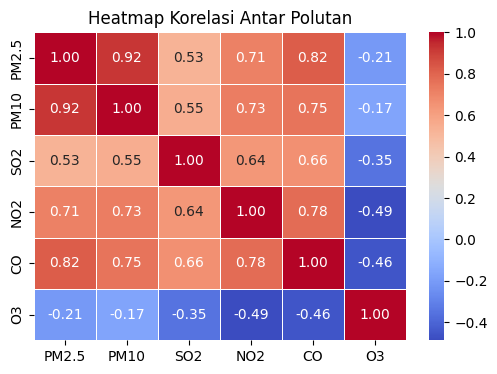

In [636]:
# korelasi antar polutan
pollutants_cols = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
pollutants_corr = daily_df[pollutants_cols].corr()

# heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pollutants_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi Antar Polutan')
plt.show()

**Insight** <br>
Berdasarkan heatmap korelasi antar polutan di atas, kita dapat melihat bahwa terdapat korelasi yang signifikan antara beberapa polutan. Berikut ini adalah hasil analisis korelasi: <br>
1. PM2.5 dan PM10 <br>
Memiliki korelasi yang sangat tinggi (0.92), menunjukkan bahwa kedua polutan ini cenderung muncul bersama-sama. Ini masuk akal karena keduanya adalah partikel halus/kecil di udara.

2. PM2.5 dan CO <br>
Juga memiliki korelasi yang tinggi (0.82), menunjukkan bahwa peningkatan PM2.5 seringkali disertai dengan peningkatan CO.

3. PM10 dan CO <br>
Memiliki korelasi yang cukup tinggi (0.75), menunjukkan hubungan yang serupa dengan PM2.5 dan CO.

4. NO2 dengan PM2.5, PM10, dan CO <br>
Memiliki korelasi yang cukup tinggi (0.71, 0.73, dan 0.78), menunjukkan bahwa NO2 juga cenderung muncul bersama dengan polutan-polutan tersebut.

5. SO2 <br>
Memiliki korelasi yang lebih rendah dengan polutan lain, tetapi masih signifikan (0.53 dengan PM2.5, 0.55 dengan PM10, dan 0.66 dengan CO).

6. O3 <br>
Memiliki korelasi negatif dengan polutan lain, menunjukkan bahwa ketika polutan ini meningkat, polutan lain cenderung menurun.

Oleh karena itu, dapat disimpulkan bahwa **polutan yang ada di udara saling memengaruhi satu sama lain**. Beberapa polutan cenderung muncul bersama-sama, menunjukkan bahwa sumber polusi atau kondisi atmosfer yang sama mungkin memengaruhi konsentrasi mereka. Korelasi yang tinggi antara PM2.5, PM10, dan CO menunjukkan bahwa mereka mungkin berasal dari sumber yang sama, seperti kendaraan, pembakaran bahan bakar, atau kegiatan industri. Korelasi negatif dengan O3 menunjukkan bahwa ada faktor lain yang mungkin memengaruhi konsentrasi polutan ini secara berlawanan.


### Pertanyaan 2: Bagaimana pola atau tren kualitas udara di masing-masing station bergerak dari waktu ke waktu?

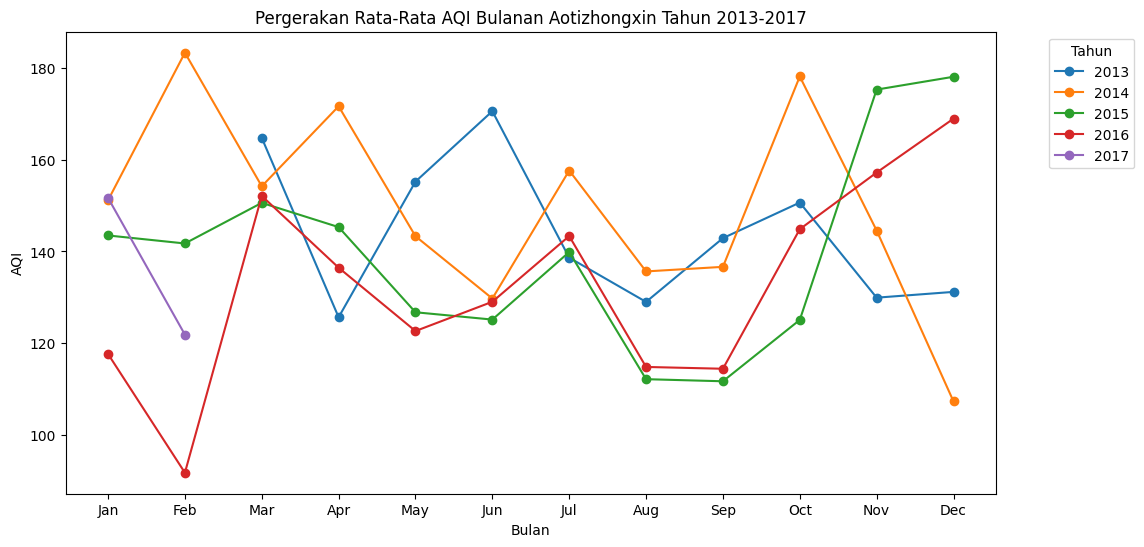

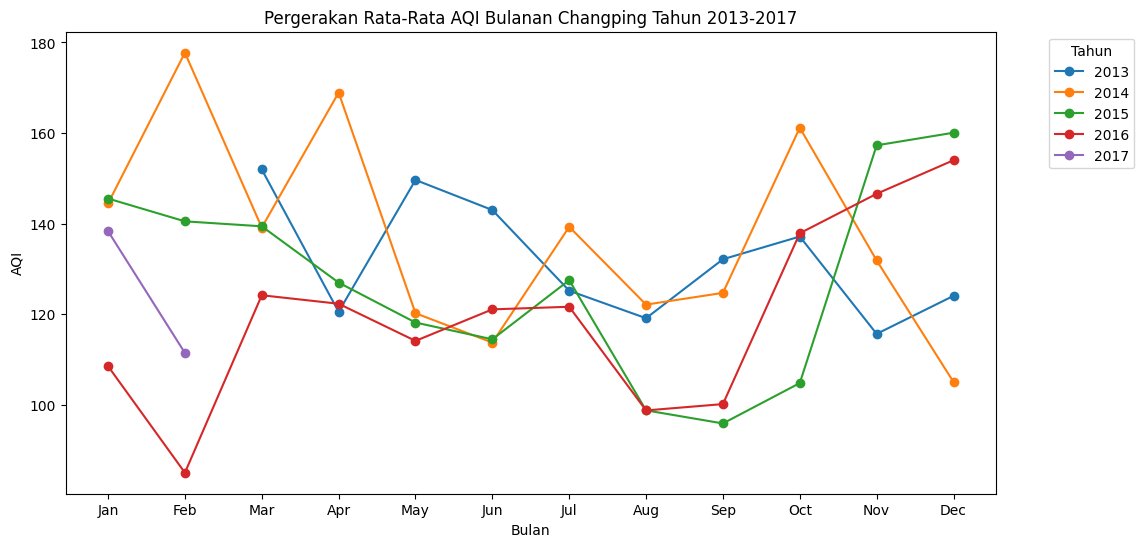

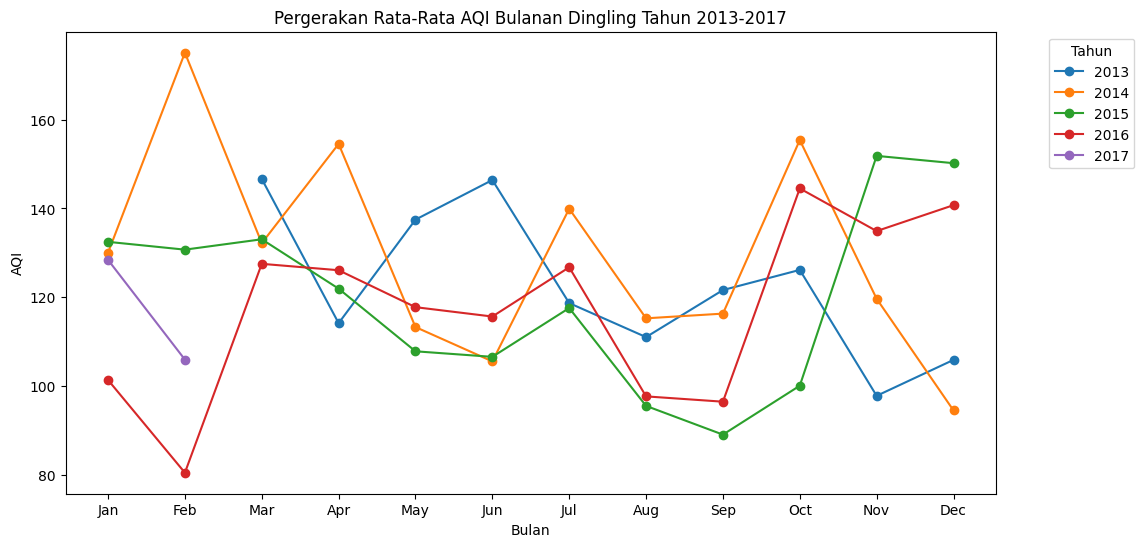

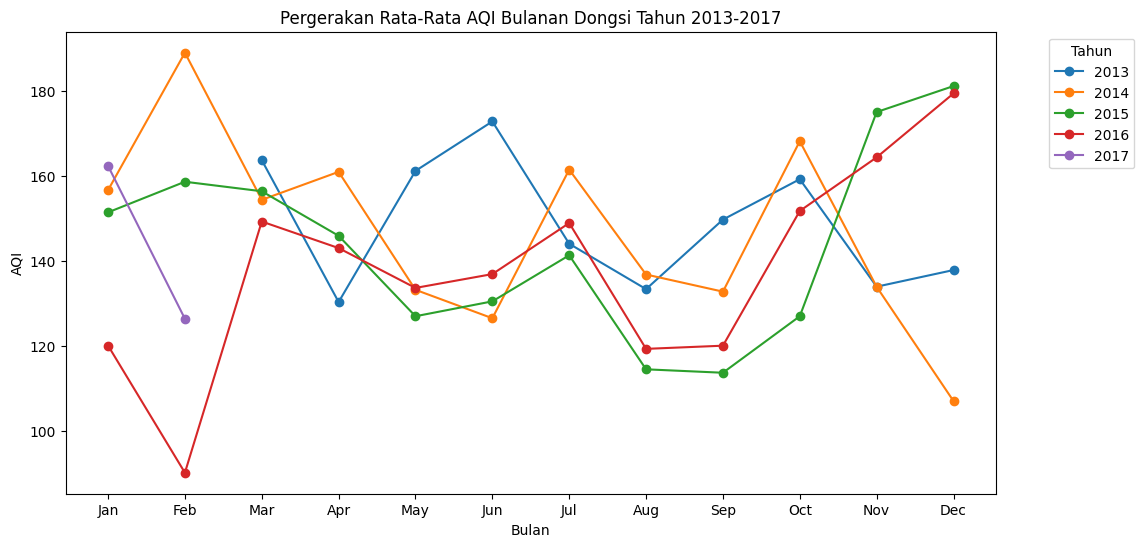

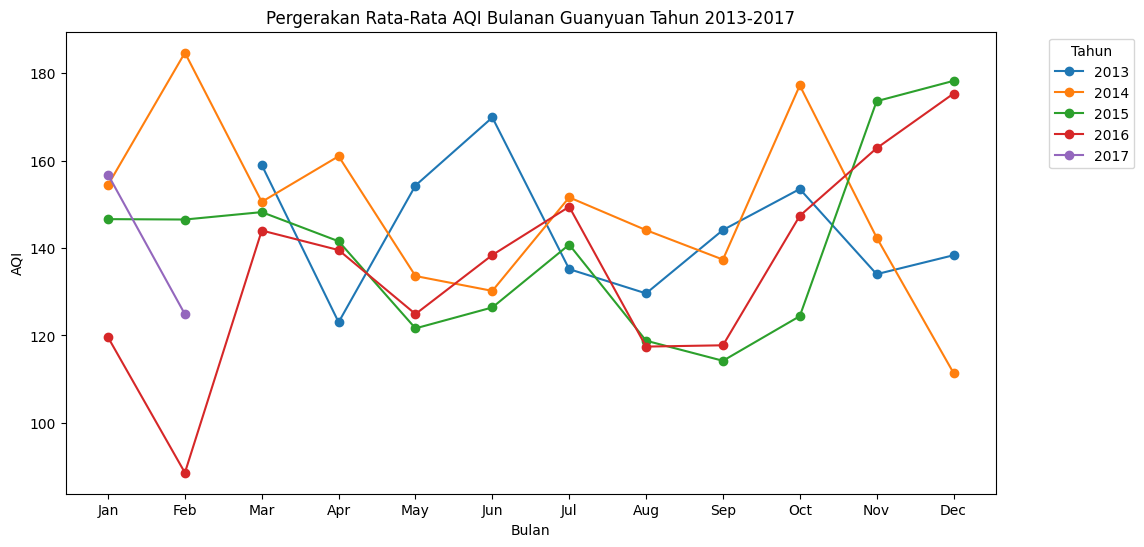

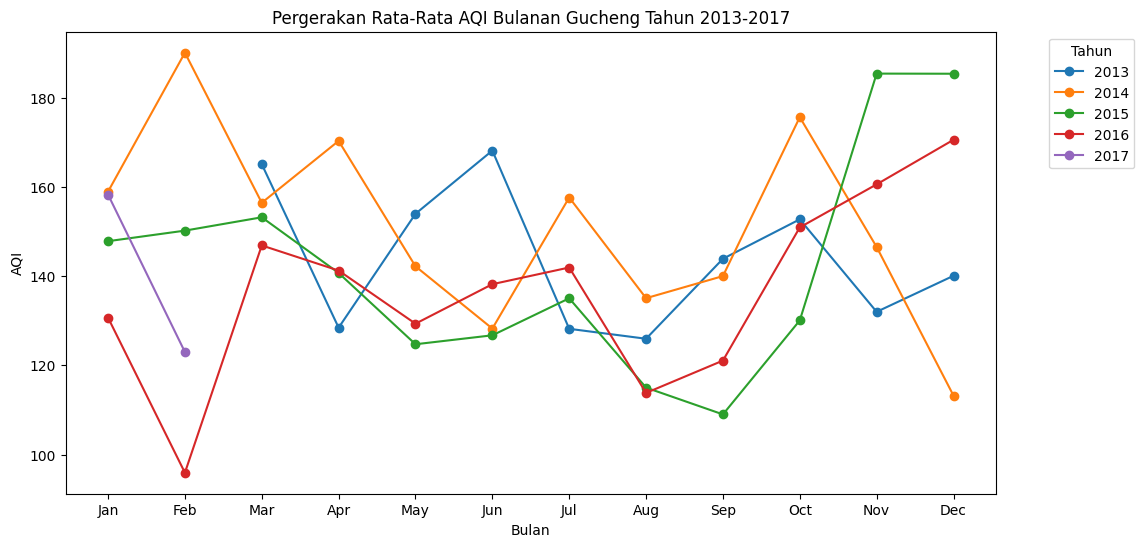

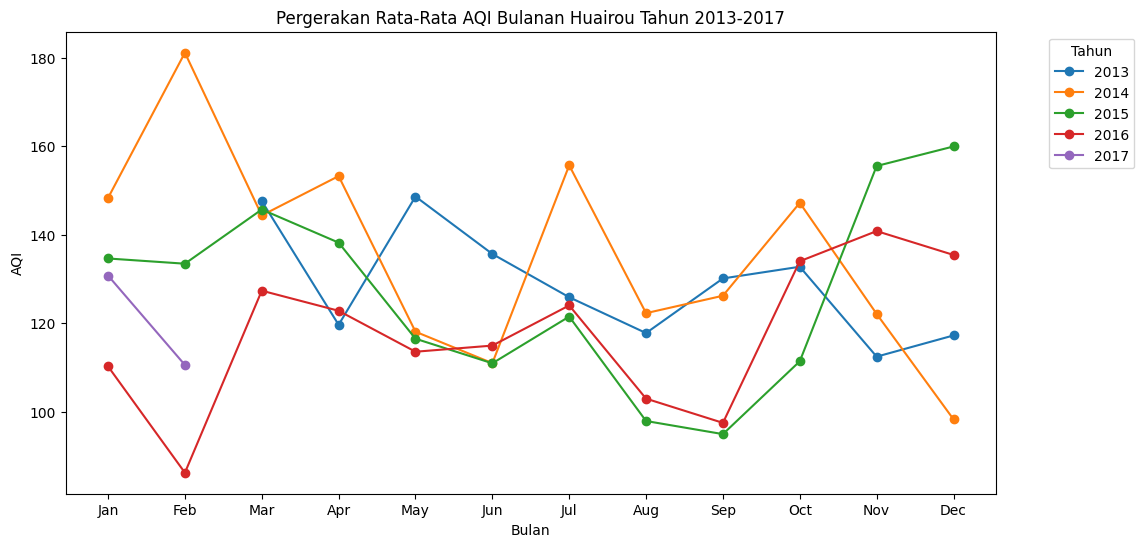

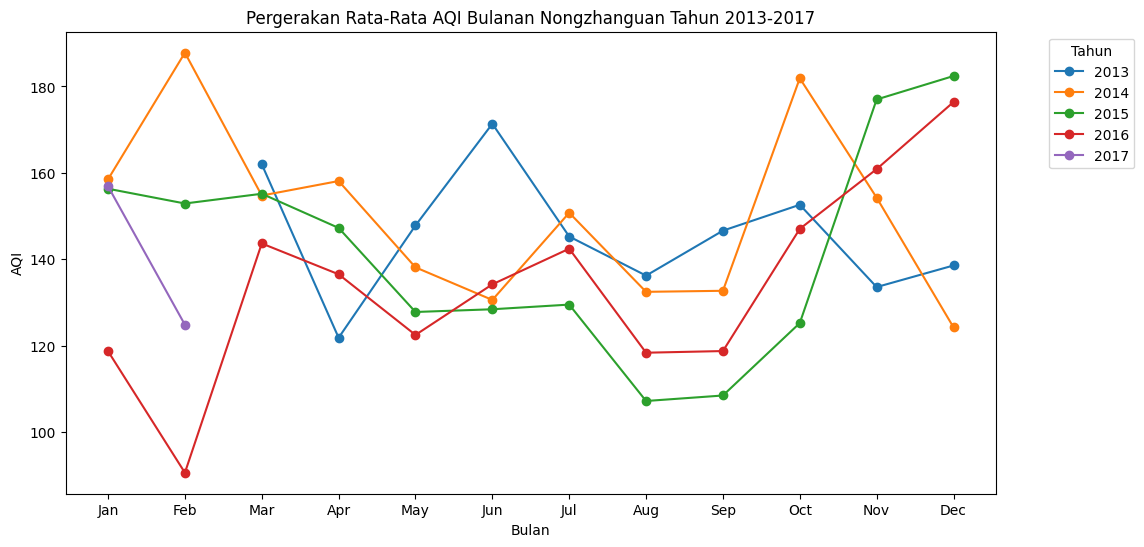

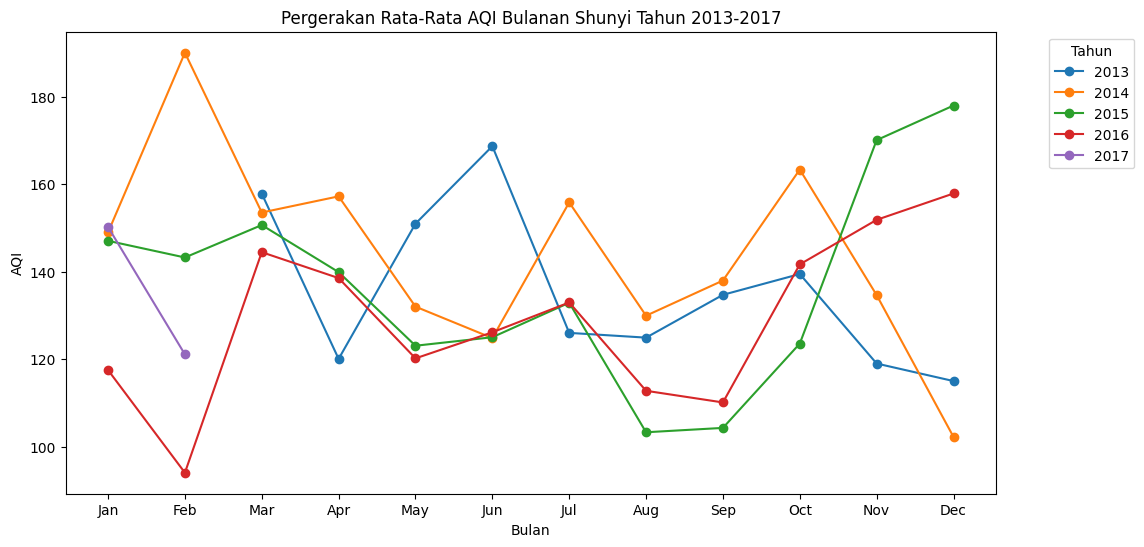

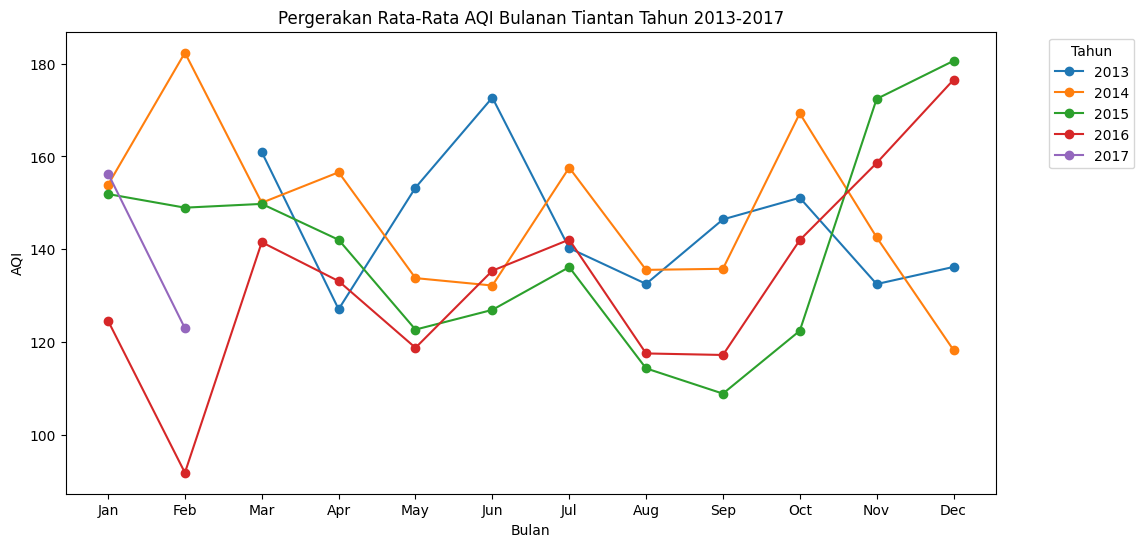

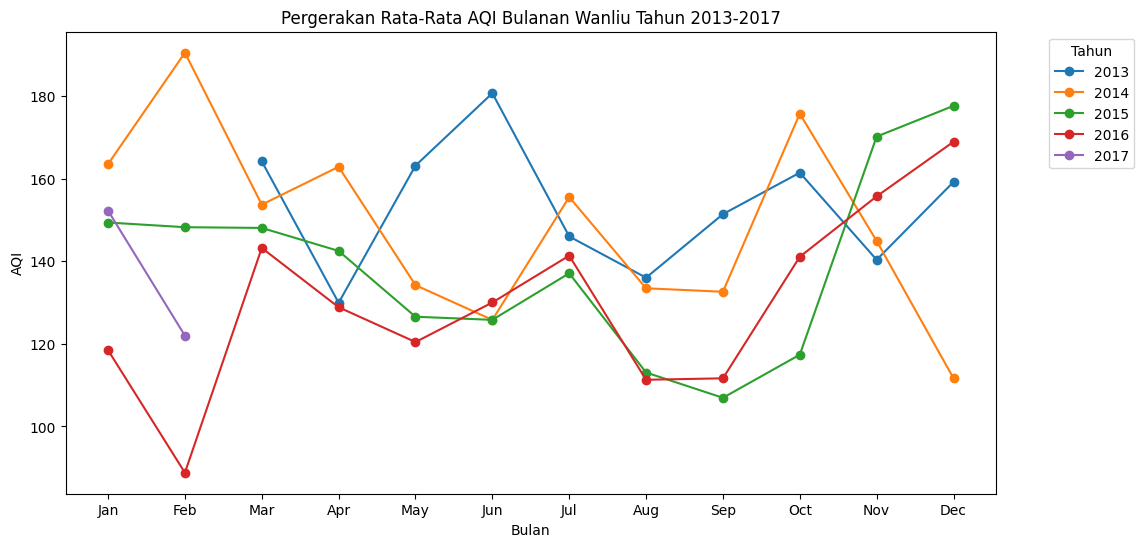

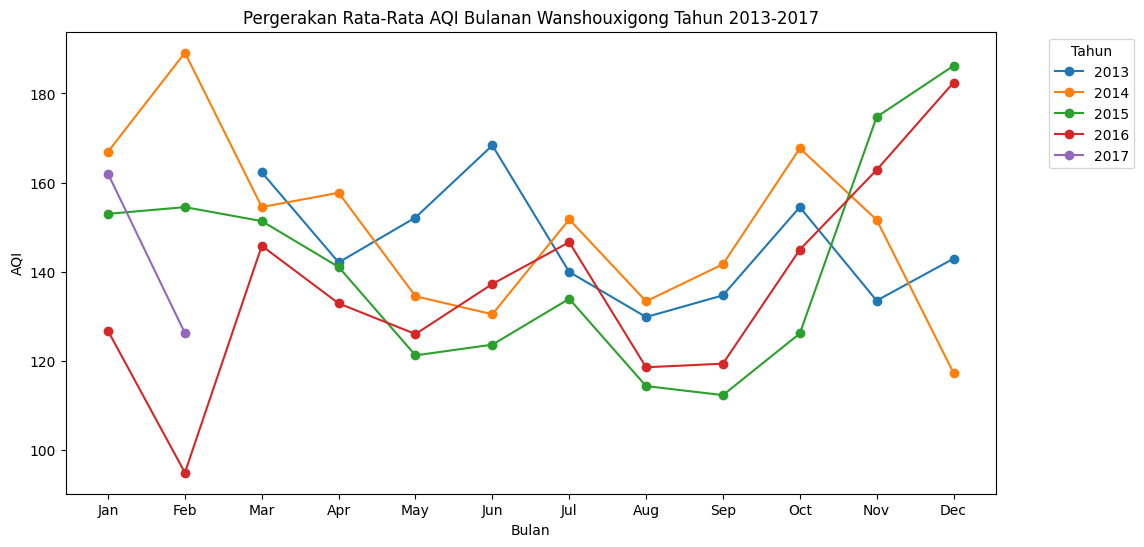

In [637]:
# Fungsi untuk membuat seasonplot
def seasonplot(data, station_name):
    # Filter data untuk station tertentu
    station_data = data[data['station'] == station_name]
    
    # Buat pivot table untuk memudahkan plotting
    pivot_data = station_data.pivot(index='year', columns='month', values='AQI')
    
    # Plotting
    plt.figure(figsize=(12, 6))
    for year in pivot_data.index:
        plt.plot(pivot_data.columns, pivot_data.loc[year], label=year, marker='o')
    
    plt.title(f'Pergerakan Rata-Rata AQI Bulanan {station_name} Tahun 2013-2017')
    plt.xlabel('Bulan')
    plt.ylabel('AQI')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.legend(title='Tahun', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Contoh penggunaan fungsi untuk setiap station
stations = monthly_df['station'].unique()
for station in stations:
    seasonplot(monthly_df, station)

**Insight** <br>

Dari line plot di atas, diperoleh insight mengenai pola atau tren dari kualitas udara di masing-masing *station*, yaitu sebagai berikut:
1. Aotizhongxin <br>
Pola kualitas udara di station ini **cenderung berfluktuasi**, dengan AQI tertinggi pada bulan Februari di tahun 2014, dan AQI lebih rendah pada bulan Juli. Secara keseluruhan, pergerakan AQI bervariasi antar tahun, menunjukkan adanya beberapa periode pencemaran udara yang lebih tinggi dan beberapa periode dengan kualitas udara yang lebih baik.

2. Changping <br>
Di station ini, tahun 2017 menunjukkan AQI tertinggi, terutama di bulan Oktober, dengan tren peningkatan kualitas udara dari 2013 hingga 2017. Februari dan Oktober tahun 2014 dan 2017 menunjukkan nilai AQI yang tinggi, yang menandakan kualitas udara buruk pada periode tersebut.

3. Dingling <br>
*Station* Dingling menunjukkan adanya pergerakan yang cukup signifikan pada tahun 2017, dengan nilai AQI tertinggi pada bulan Februari. Tren ini menandakan pergerakan kualitas udara yang buruk pada awal tahun dan cenderung lebih rendah pada bulan-bulan lainnya.

4. Dongsi <br>
Pola kualitas udara pada *station* ini menunjukkan tren yang agak bervariasi, dengan AQI tertinggi pada Februari 2017. Beberapa periode, seperti April dan Juli, menunjukkan kualitas udara yang lebih buruk. Selain itu, terdapat fluktuasi yang cukup besar antar tahun.

5. Guanyuan <br>
Guanyuan menunjukkan tren peningkatan AQI pada tahun 2017. Periode dengan AQI tertinggi adalah Maret 2017, dan cenderung menurun di bulan-bulan berikutnya, menunjukkan adanya pencemaran udara yang lebih parah di awal tahun 2017.


6. Gucheng <br>
*Station* Gucheng menunjukkan pola pergerakan yang mirip dengan *station* lainnya, dengan fluktuasi antara tahun. Maret dan Agustus 2016 memiliki AQI tertinggi. Namun, tidak ada tren yang konsisten, meskipun beberapa tahun memiliki kualitas udara yang lebih buruk di bulan-bulan tertentu.

7. Huairou <br>
Huairou memiliki kualitas udara yang cukup buruk sepanjang 2017, dengan bulan Maret yang menunjukkan puncaknya. Pola AQI lainnya juga menunjukkan fluktuasi antara tahun, namun tren AQI yang lebih tinggi menunjukkan kualitas udara yang kurang baik pada tahun tersebut.

8. Nongzhanguan <br>
Di Nongzhanguan, ada fluktuasi yang jelas dalam kualitas udara, dengan bulan April 2017 dan Oktober 2014 sebagai periode puncak AQI. Seperti station lainnya, AQI menurun pada bulan-bulan tertentu, menunjukkan pola pencemaran yang tidak konsisten.
 
9. Shunyi <br>
Shunyi menunjukkan tren peningkatan kualitas udara dari 2013 ke 2017, dengan AQI tertinggi pada Juli 2017 dan menurun di bulan-bulan lainnya. Pola ini menunjukkan adanya tren penurunan kualitas udara pada bulan-bulan tertentu, terutama di tahun-tahun terakhir.

10. Tiantan <br>
Pola kualitas udara di station Tiantan menunjukkan fluktuasi yang cukup signifikan dari tahun ke tahun. Meskipun terdapat fluktuasi pada bulan-bulan tertentu, tren utama menunjukkan bahwa station Tiantan memiliki kualitas udara yang bervariasi, dengan puncaknya terjadi pada tahun 2017 dan penurunan di beberapa bulan lainnya.

11. Wanliu <br>
Wanliu memiliki fluktuasi yang signifikan pada 2016 dan 2017, dengan AQI tertinggi pada Januari 2017. Ini menunjukkan bahwa kualitas udara di station ini bervariasi antara tahun, dengan beberapa bulan yang menunjukkan peningkatan kualitas udara yang cukup buruk.

11. Wanshouxigong <br>
Wanshouxigong memiliki pola yang sangat mirip dengan Wanliu, dengan fluktuasi tinggi pada 2017 dan 2014, terutama pada bulan-bulan Februari dan Oktober. Ada kecenderungan tren buruk yang sama seperti di station Wanliu, dengan kualitas udara yang lebih baik pada beberapa bulan lainnya.

Secara keseluruhan, AQI di setiap *station* menunjukkan fluktuasi yang signifikan dari tahun ke tahun. Beberapa *station* menunjukkan kualitas udara yang lebih buruk pada awal tahun (seperti Februari dan Maret), sedangkan yang lain menunjukkan periode pencemaran yang lebih tinggi pada bulan-bulan lainnya. Tren ini bisa dipengaruhi oleh berbagai faktor seperti cuaca, aktivitas industri, atau perayaan tertentu yang mempengaruhi pencemaran udara.

### Pertanyaan 3: Pada bulan apa kualitas udara menjadi lebih buruk daripada bulan-bulan lainnya di setiap *station*? 

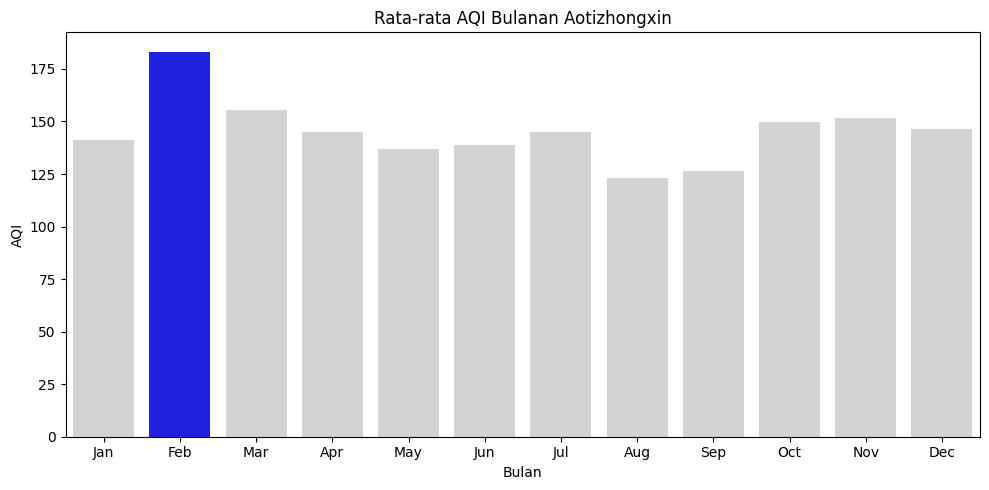

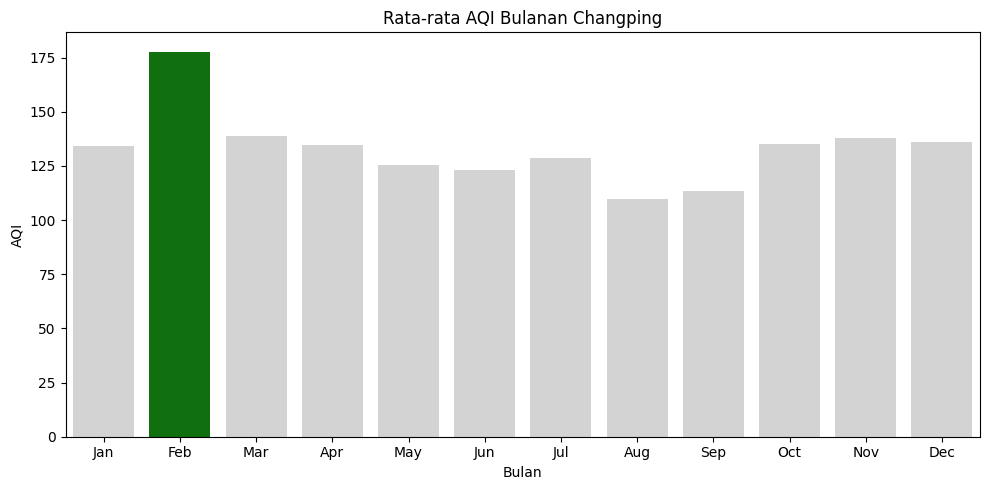

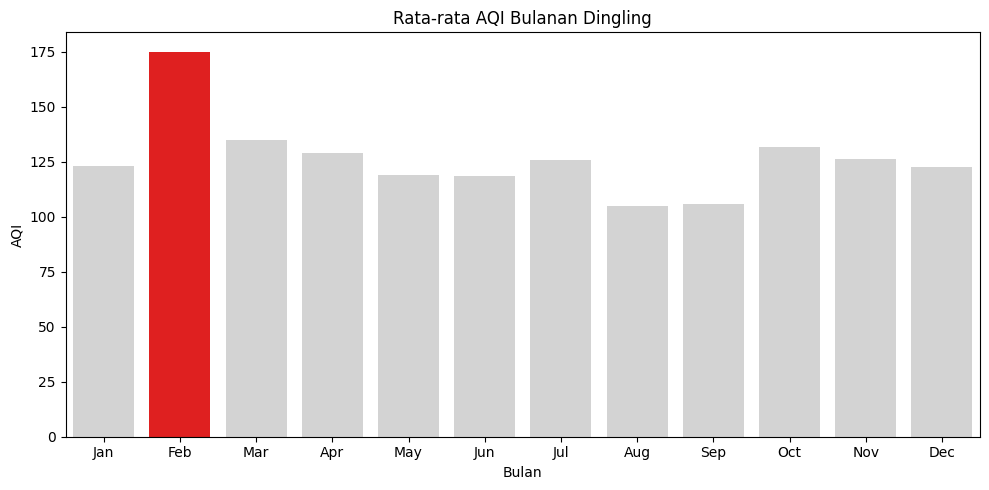

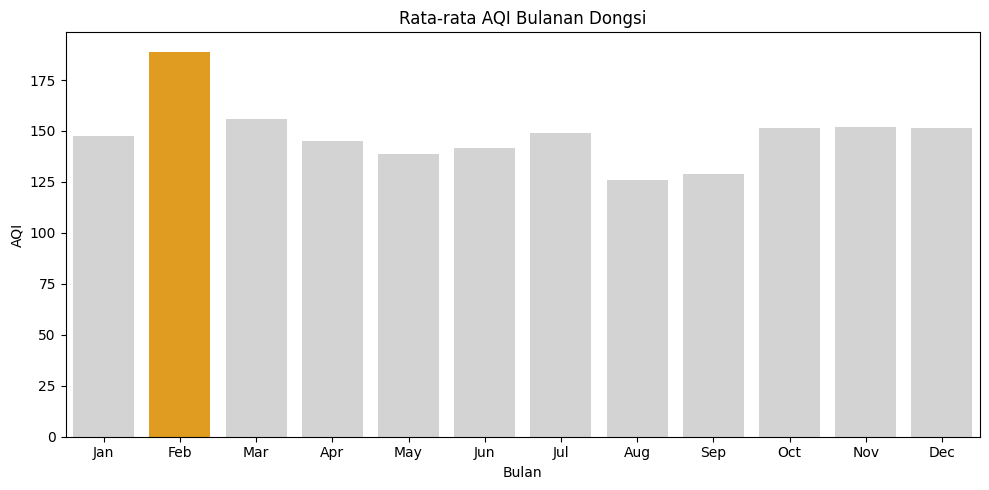

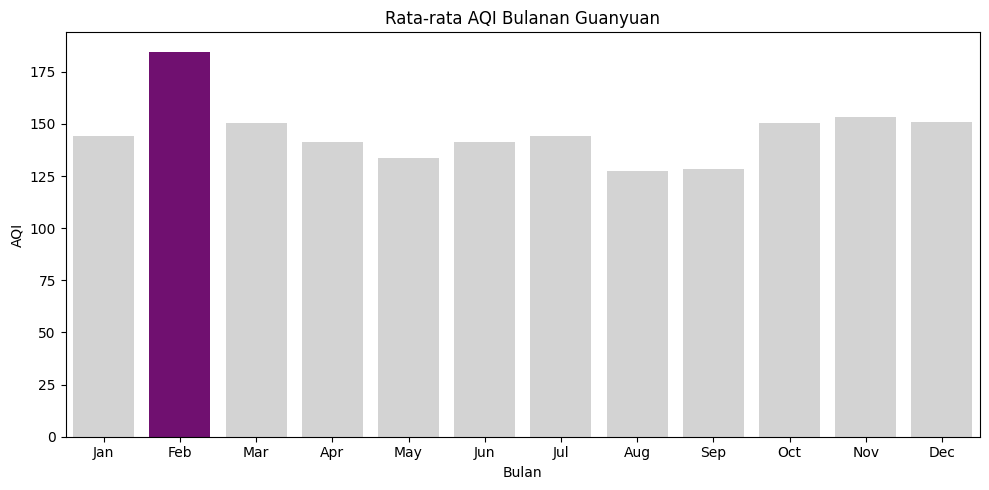

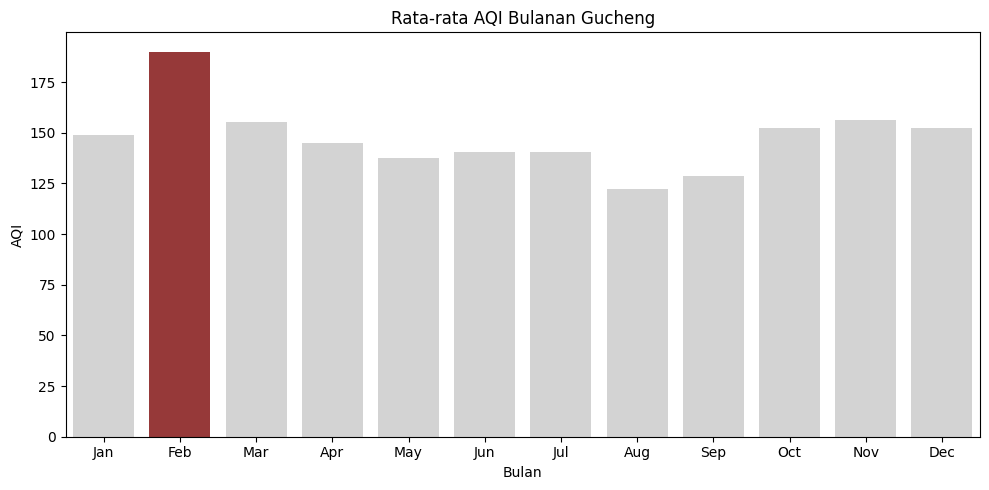

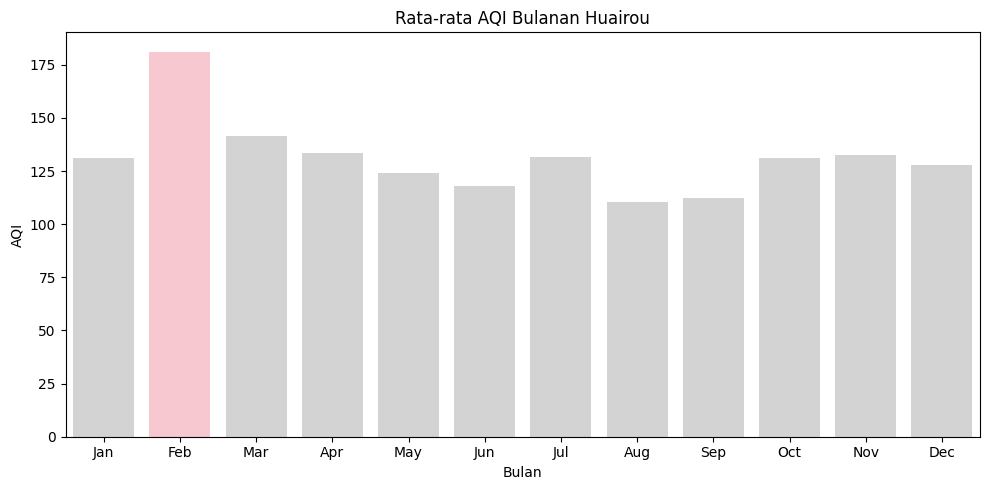

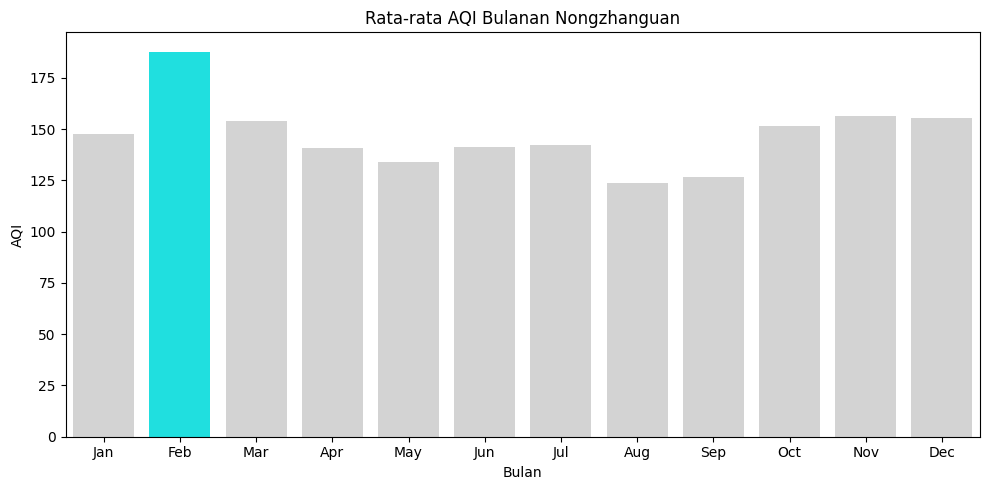

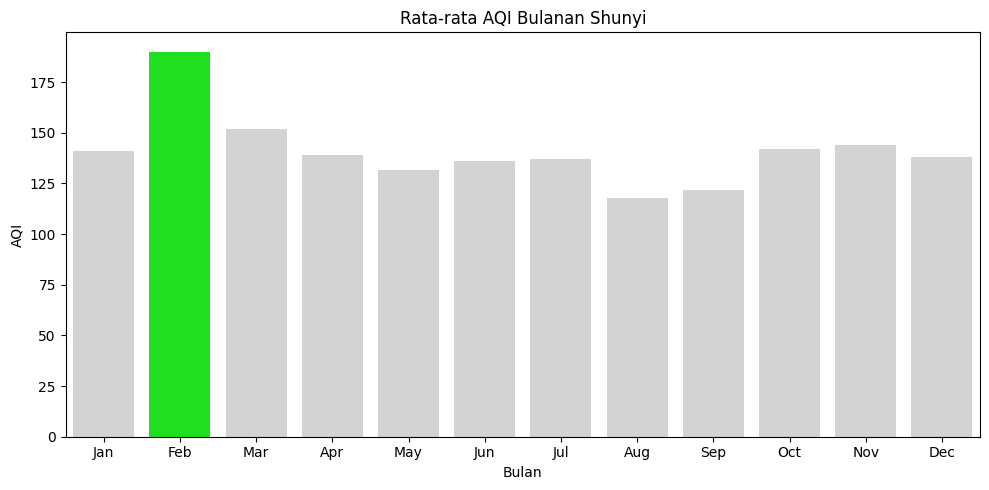

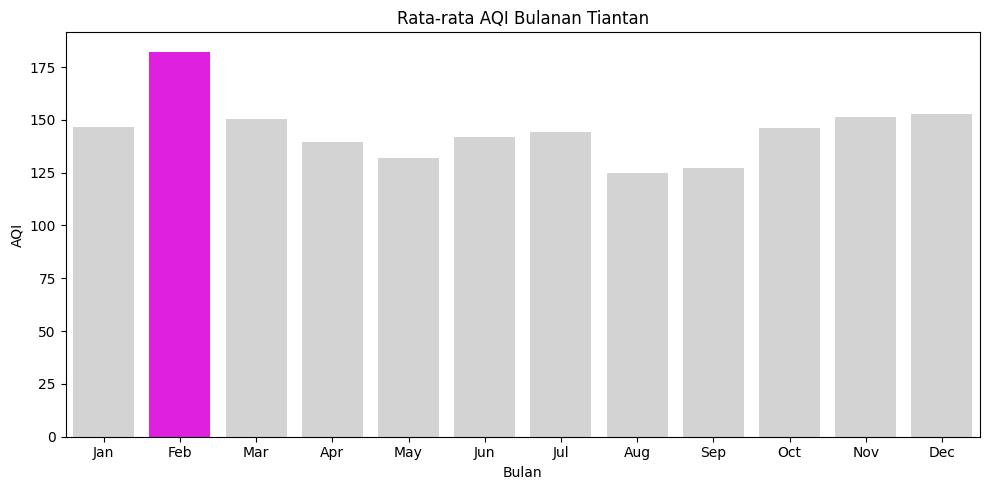

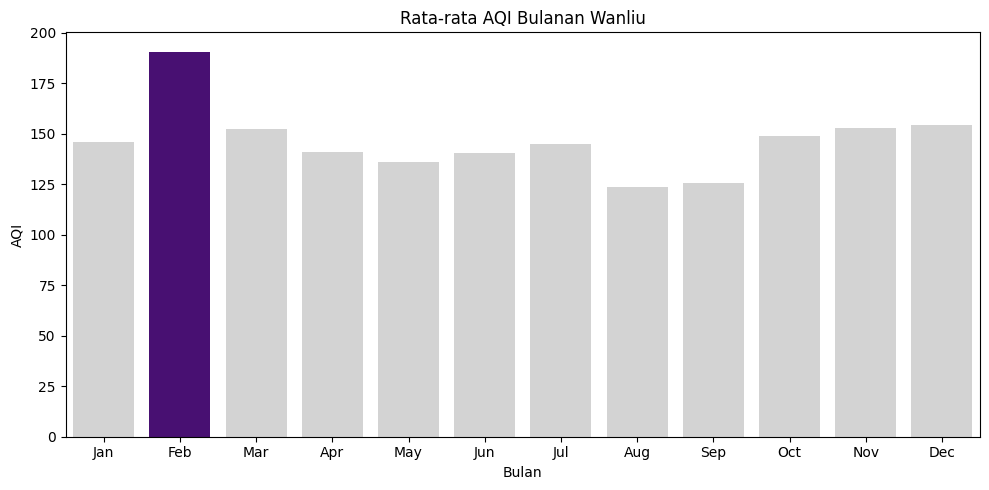

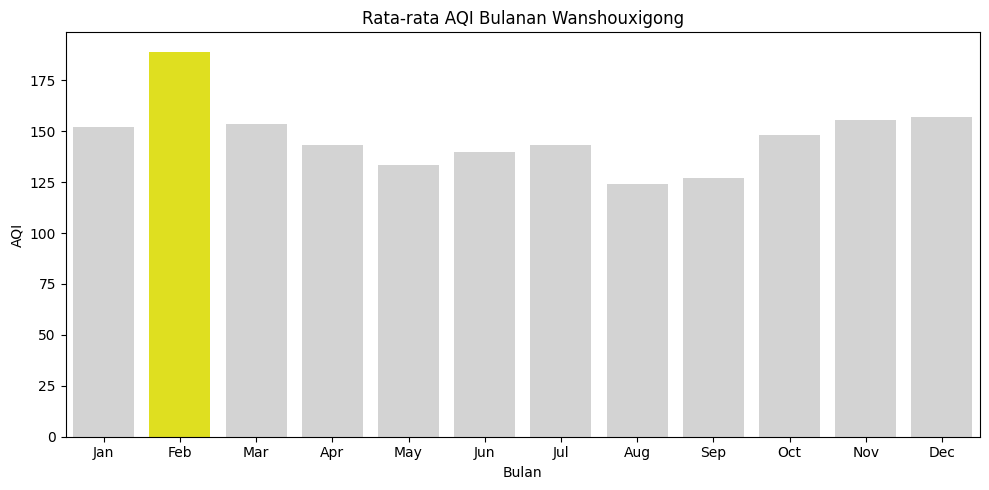

In [638]:
# Fungsi untuk membuat bar plot rata-rata AQI bulanan tiap station 
def monthly_aqi_plot(df, x, y, station_name, highlight_color):
    plt.figure(figsize=(10, 5))
    
    # Temukan bulan dengan AQI maksimum
    max_aqi_month = df[df[y] == df[y].max()]

    # Plot bar biasa dengan warna abu-abu 
    sns.barplot(data=df, x=x, y=y, color='lightgray', errorbar=None)
    
    # Plot bar yang memiliki AQI maksimum dengan warna mencolok
    sns.barplot(data=max_aqi_month, x=x, y=y, color=highlight_color, errorbar=None)

    plt.title(f"Rata-rata AQI Bulanan {station_name}")
    plt.xlabel('Bulan')
    plt.ylabel('AQI')

    # Menyesuaikan label sumbu x menjadi nama bulan
    plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

    plt.tight_layout()
    plt.show()

# Menentukan warna berbeda untuk setiap station
highlight_colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 
                    'pink', 'cyan', 'lime', 'magenta', 'indigo', 'yellow']

for station, color in zip(monthly_df['station'].unique(), highlight_colors):
    station_data = monthly_df[monthly_df['station'] == station]
    monthly_aqi_plot(station_data, 'month', 'AQI', station, color)

**Insight** <br>

Berdasarkan grafik batang di atas, pada bulan **Februari** semua *station* menunjukkan kualitas udara yang buruk, ditunjukkan dengan AQI yang tinggi.

### Pertanyaan 4: Bagaimana persebaran rata-rata kualitas udara di berbagai station selama masa pengamatan? (Analisis geospasial sebagai analisis lanjutan)

Data latitude dan longitude tiap *station* didapatkan melalui situs https://www.findlatitudeandlongitude.com/ dengan memasukkan nama lokasi **"*station_name* + china"**

In [639]:
# Data lokasi station dengan koordinat latitude dan longitude
station_coords = {
    'Aotizhongxin': [34.374734, 109.016205],
    'Changping': [40.219646, 116.225091],
    'Dingling': [40.148371, 117.695525],
    'Dongsi': [39.929247, 116.417731],
    'Guanyuan': [29.558719, 112.00761],
    'Gucheng': [37.349035, 115.964682],
    'Huairou': [40.315481, 116.626028],
    'Nongzhanguan': [39.944006, 116.467997],
    'Shunyi': [40.14875, 116.653875],
    'Tiantan': [39.887858, 116.392896],
    'Wanliu': [34.81287, 113.989313],
    'Wanshouxigong': [34.81287, 113.989313]
}

# Menghitung rata-rata AQI per station
station_aqi = daily_df.groupby('station')['AQI'].mean().reset_index()

# Fungsi untuk menentukan warna berdasarkan AQI level
def get_aqi_color(aqi):
    if aqi <= 50:
        return 'green'  # Good
    elif aqi <= 100:
        return 'yellow'  # Moderate
    elif aqi <= 150:
        return 'orange'  # Unhealthy for Sensitive Groups
    elif aqi <= 200:
        return 'red'  # Unhealthy
    elif aqi <= 300:
        return 'purple'  # Very Unhealthy
    else:
        return 'darkred'  # Hazardous

# Membuat peta dasar menggunakan Folium
m = folium.Map(location=[30, 100], zoom_start=4)

# Menambahkan marker untuk setiap station dengan warna berdasarkan AQI level
for index, row in station_aqi.iterrows():
    station_name = row['station']
    aqi = row['AQI']
    lat, lon = station_coords[station_name]

    # Menentukan warna marker berdasarkan level AQI
    color = get_aqi_color(aqi)

    # Menambahkan marker ke peta
    folium.CircleMarker(
        location=[lat, lon],
        radius=20,
        popup=f"{station_name}<br>AQI: {aqi:.2f}",
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6
    ).add_to(m)

# Menampilkan peta 
display(m)

**Insight** <br>

Berdasarkan peta persebaran rata-rata kualitas udara di atas, didapatkan informasi bahwa seluruh *station* memiliki kualitas udara yang sama, yaitu berada dalam kategori "Unhealthy for Sensitive Groups" berdasarkan warna marker yang berwarna orange. Hal ini  menunjukkan adanya kondisi polusi udara yang cukup merata di wilayah tersebut sehingga mempengaruhi kualitas udara di berbagai *station* selama masa pengamatan.

### Pertanyaan 5: Station mana yang menunjukkan rata-rata kualitas udara terbaik dan terburuk pada setiap tahunnya?

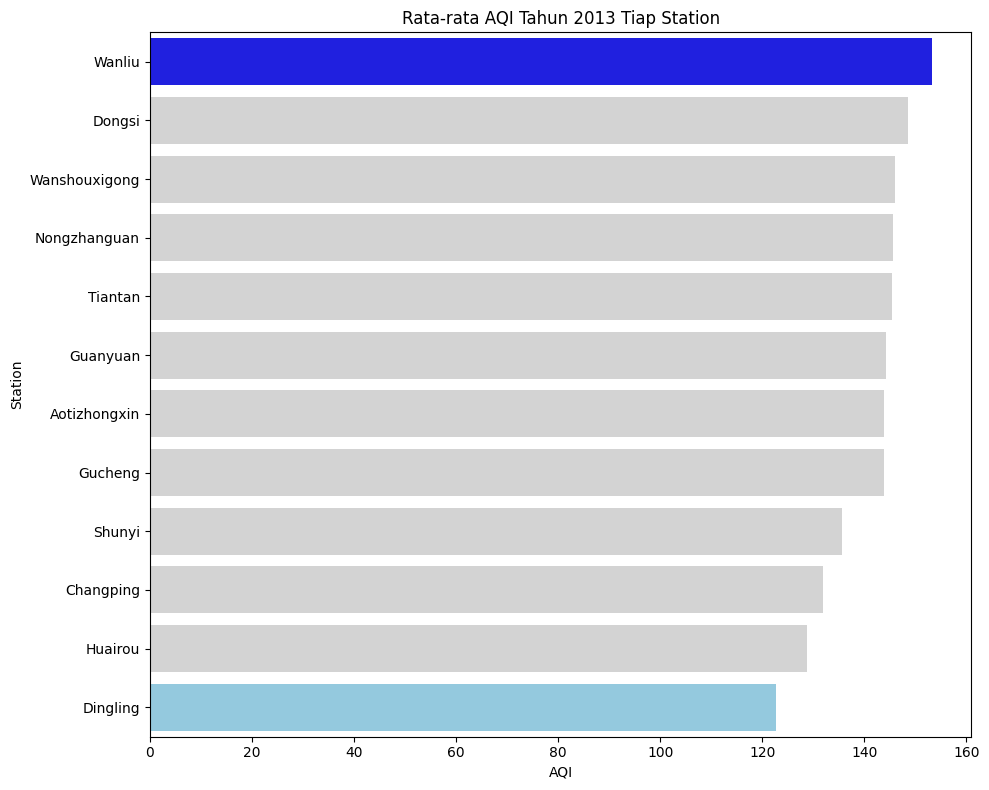

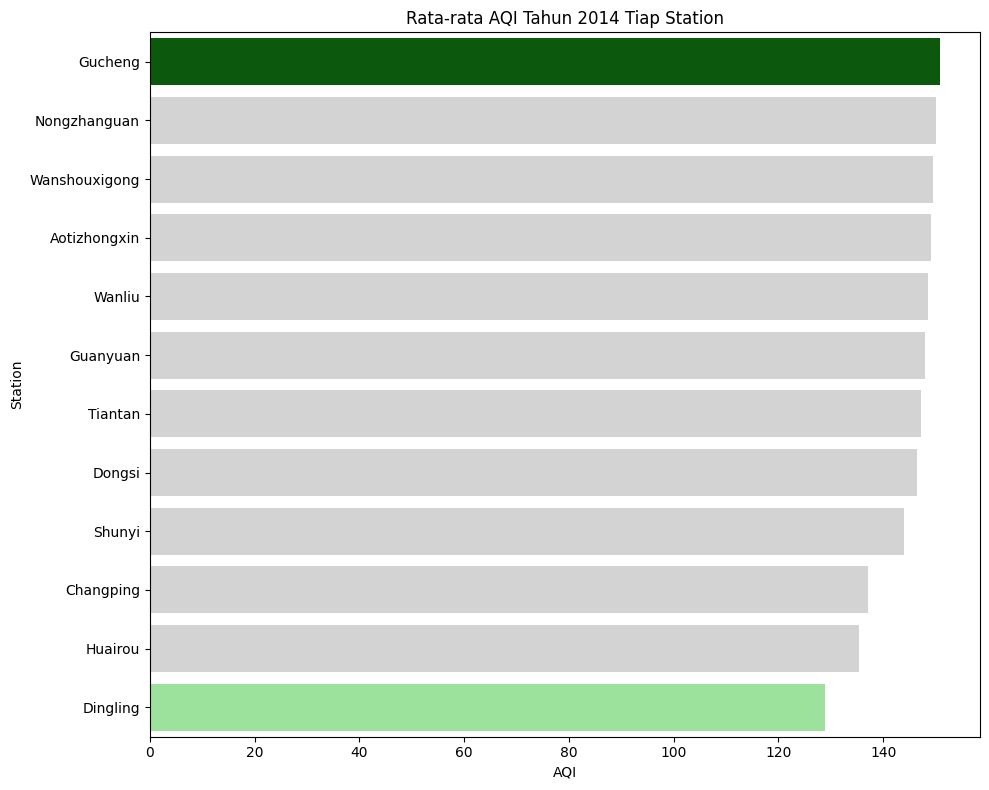

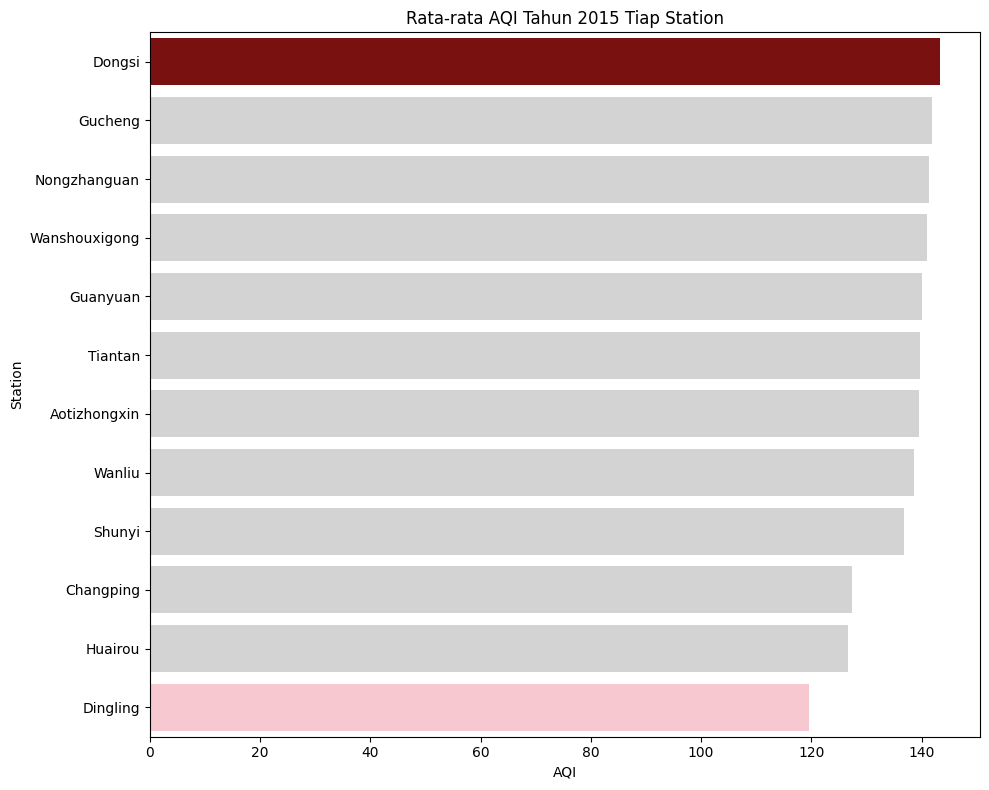

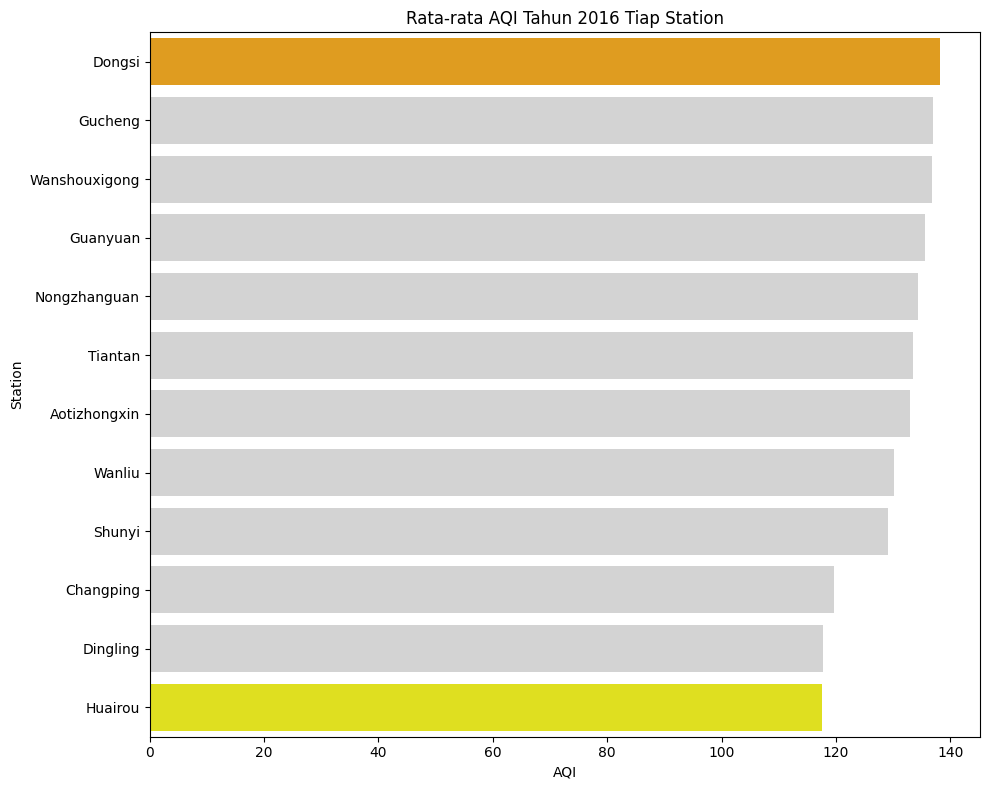

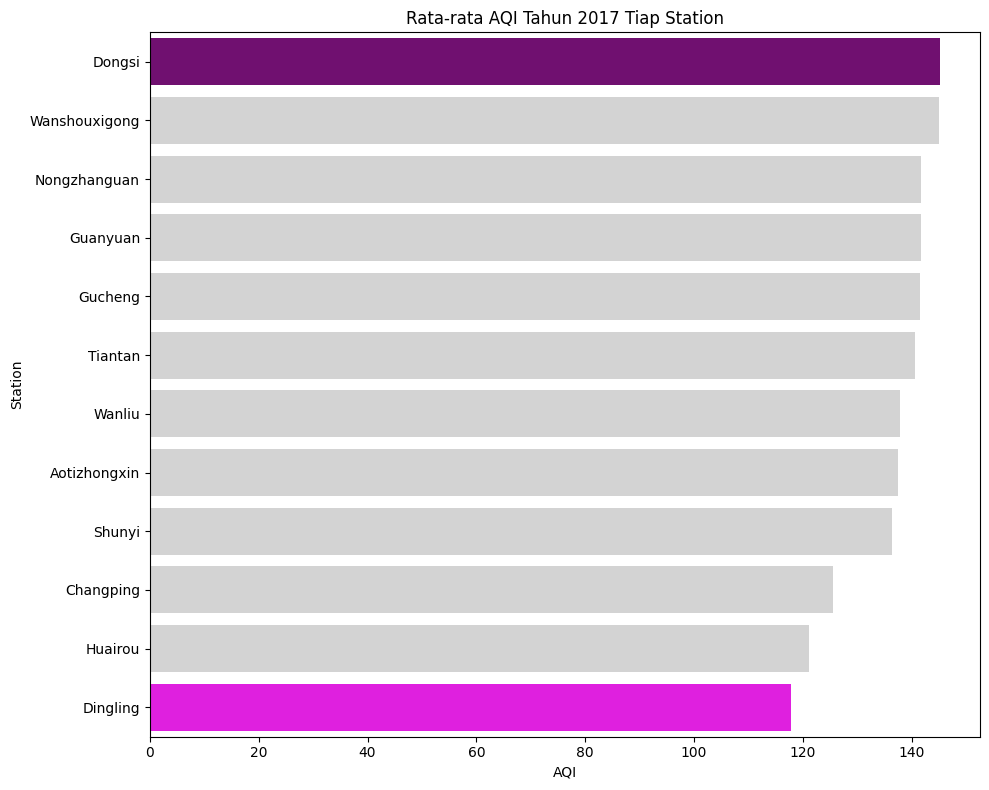

In [640]:
# Fungsi untuk membuat bar plot rata-rata AQI tahunan tiap station per tahun (horizontal dan terurut)
def annual_aqi_plot_horizontal_sorted(df, x, y, year, highlight_color_max, highlight_colors_min):
    plt.figure(figsize=(10, 8))  # Sesuaikan ukuran plot untuk horizontal
    
    # Urutkan data berdasarkan AQI dari terbesar ke terkecil
    df_sorted = df.sort_values(by=y, ascending=False)
    
    # Temukan station dengan AQI maksimum dan minimum
    max_aqi_station = df_sorted[df_sorted[y] == df_sorted[y].max()]
    min_aqi_station = df_sorted[df_sorted[y] == df_sorted[y].min()]

    # Plot bar biasa dengan warna abu-abu
    sns.barplot(data=df_sorted, x=y, y=x, color='lightgray', errorbar=None, orient='h')

    # Plot bar yang memiliki AQI maksimum dengan warna mencolok tua
    sns.barplot(data=max_aqi_station, x=y, y=x, color=highlight_color_max, errorbar=None, orient='h')
    
    # Plot bar yang memiliki AQI minimum dengan warna mencolok muda
    sns.barplot(data=min_aqi_station, x=y, y=x, color=highlight_colors_min, errorbar=None, orient='h')

    plt.title(f"Rata-rata AQI Tahun {year} Tiap Station")
    plt.xlabel('AQI')
    plt.ylabel('Station')

    plt.tight_layout()
    plt.show()

# Warna bar maksimum
highlight_colors_max = ['blue', 'darkgreen', 'darkred', 'orange', 'purple']

# Warna bar minimum
highlight_colors_min = ['skyblue', 'lightgreen', 'pink', 'yellow', 'magenta']

# Loop untuk setiap tahun dan buat plot horizontal yang terurut
for year, color_max, color_min in zip(annual_df['year'].unique(), highlight_colors_max, highlight_colors_min):
    year_data = annual_df[annual_df['year'] == year]
    annual_aqi_plot_horizontal_sorted(year_data, 'station', 'AQI', year, color_max, color_min)

**Insight** <br>

Berdasarkan grafik di atas, berikut adalah station yang menunjukkan rata-rata kualitas udara terbaik (AQI terendah) dan terburuk (AQI tertinggi) pada setiap tahunnya.

1. Tahun 2013
    - Terbaik: Dingling 
    - Terburuk: Wanliu 

2. Tahun 2014
    - Terbaik: Dingling
    - Terburuk: Gucheng

3. Tahun 2015
    - Terbaik: Dingling
    - Terburuk: Dongsi

4. Tahun 2016
    - Terbaik: Huairou
    - Terburuk: Dongsi

5. Tahun 2017:
    - Terbaik: Dingling 
    - Terburuk: Dongsi

Secara keseluruhan, Dingling cenderung menunjukkan kualitas udara terbaik, sementara Dongsi menunjukkan kualitas udara yang lebih buruk.

## Conclusion

- Pertanyaan 1 <br>
Berdasarkan hasil analisis korelasi antar polutan, dapat disimpulkan bahwa polutan di udara saling memengaruhi satu sama lain. Sebagian besar polutan, seperti PM2.5, PM10, dan CO, menunjukkan korelasi yang tinggi, menunjukkan bahwa mereka cenderung muncul bersama-sama. Hal ini mengindikasikan bahwa sumber polusi atau kondisi atmosfer yang sama mungkin memengaruhi konsentrasi polutan-polutan ini. Sebaliknya, O3 menunjukkan korelasi negatif dengan polutan lainnya, mengindikasikan bahwa peningkatan O3 dapat berbanding terbalik dengan konsentrasi polutan lainnya.

- Pertanyaan 2 <br>
Pola kualitas udara di setiap *station* menunjukkan fluktuasi yang signifikan dari tahun ke tahun, dengan beberapa *station* menunjukkan periode dengan kualitas udara buruk di bulan-bulan tertentu. Misalnya, *station* seperti Aotizhongxin menunjukkan fluktuasi dengan AQI tertinggi di bulan Februari 2014, sedangkan Dongsi dan Huairou menunjukkan pola buruk pada tahun 2017. Secara umum, kualitas udara yang buruk terjadi pada bulan-bulan tertentu, terutama pada awal tahun (Februari, Maret) dan beberapa bulan lainnya, yang bisa dipengaruhi oleh faktor-faktor seperti cuaca, kegiatan industri, atau perayaan tertentu.

- Pertanyaan 3 <br>
Berdasarkan analisis grafis, bulan Februari merupakan bulan dengan kualitas udara yang paling buruk di semua *station*. Hal ini terlihat dari puncak AQI tertinggi di bulan Februari di setiap *station*, yang menandakan bahwa pencemaran udara cenderung lebih parah pada periode tersebut di seluruh *station* yang diamati.

- Pertanyaan 4 <br>
Berdasarkan analisis geospasial, seluruh *station* menunjukkan kualitas udara yang serupa, dengan kategori "Unhealthy for Sensitive Groups", ditunjukkan dengan warna orange pada marker peta. Hal ini menunjukkan kondisi polusi udara yang cukup merata di wilayah tersebut, yang mempengaruhi kualitas udara di banyak station selama masa pengamatan. Dengan kata lain, tingkat pencemaran udara di lokasi-lokasi tersebut relatif seragam.

- Pertanyaan 5 <br>
Dari hasil analisis rata-rata AQI tahunan, dapat disimpulkan bahwa Dingling cenderung menunjukkan kualitas udara terbaik (dengan AQI terendah), sedangkan Dongsi cenderung menunjukkan kualitas udara yang terburuk (dengan AQI tertinggi).

In [641]:
# menyimpan data untuk dashboard
daily_df.to_csv("daily_data.csv", index=False)